>[1. Problem Definition](#scrollTo=j22qAbvtrUlJ)

>[2. Data Collection](#scrollTo=hlgW3ILJsOrf)

>>[2.1 Data Loading and Initial Inspection:](#scrollTo=j0rwauvMvsr_)

>[3. Data Cleaning](#scrollTo=qG7eEp0UtVCt)

>>[3.1 Drop Useless Variables:](#scrollTo=dwP0c0uMx4JV)

>>[3.2 Handling Missing Values:](#scrollTo=hRhII00MadOt)

>>[3.3 Imputing Missing Values:](#scrollTo=cRyiwAqqxKEn)

>>[3.4 Imputing incorrect categorical entries:](#scrollTo=kPgaBCf9bY4F)

>>[3.5 Identifying the outliers:](#scrollTo=FdukkmBq7HT0)

>>[3.6 Caping High-Performance Outliers:](#scrollTo=mNxqNvo3D4Q1)

>[4. Analyzing Data](#scrollTo=ISXbxRmu4LDa)

>>[4.1 Role Based Feature Engineering:](#scrollTo=KPiSNFY_j2lr)

>>[4.2 Descriptive Statistics by Role:](#scrollTo=RXSO9qpXHlZe)

>>[4.3 Descriptive & Inferential Statistics:](#scrollTo=IJe4hsXmtJxC)

>>>[4.3.1 Univariate Categorical Data:](#scrollTo=RAU-slgwtfxf)

>>>[4.3.2 Univariate Numerical Data:](#scrollTo=sNLeFIkLt6CQ)

>>>[4.3.3 Bivariate Data:](#scrollTo=fjlbhE2Gt3m-)

>>[4.4 Data Preparation for Modeling:](#scrollTo=edk7MwdAt-eu)

>[5. Machine Learning](#scrollTo=QijQuBZQ8Qi3)

>>[5.1 Unsupervised Learning:](#scrollTo=b3Q10Uoq8Us2)

>>>[5.1.1 Principal Component Analysis:](#scrollTo=SwYSafg58b29)

>>>[5.2 Unsupervised Learning:](#scrollTo=IlrTYMrB-OC5)

>>>[5.2.1. KMeans Cluster Analysis:](#scrollTo=0RwSfNdyc7Qc)

>>[5.2. Supervised Learning:](#scrollTo=9U0PdjMbE54k)

>>>[5.2.1. Linear outcome:](#scrollTo=6iyFlaY8y2Vv)

>>>[5.2.2. Categorical outcome:](#scrollTo=Vxf1O6I9y5NQ)

>>[5.3 Feature Imputation Importance:](#scrollTo=B7YC2H9qO5io)



# **1. Problem Definition**

Emlyon Business School is dedicated to bringing together the most talented players to build a strong and dynamic soccer club. To ensure fairness and optimal performance, the task involves determining not only which players should be selected but also assigning them to appropriate roles based on their skills and capabilities.

# **2. Data Collection**

We decided to train our model using Kaggle's extensive FIFA dataset of football players.

## **2.1 Data Loading and Initial Inspection:**


**Download Dataset**: Download and verify dataset structure.

In [ ]:
import kagglehub
import os

# Step 1: Download the dataset
path = kagglehub.dataset_download("hugomathien/soccer")

# Step 2: List all files in the downloaded dataset directory
for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))

/root/.cache/kagglehub/datasets/hugomathien/soccer/versions/10/database.sqlite


**Load and Display Data**: Connect to the SQLite database, load the Player_Attributes table, and display initial rows and info to understand data structure and types.

In [ ]:
import sqlite3
import pandas as pd

# Specify the path to the SQLite database
sqlite_path = "/root/.cache/kagglehub/datasets/hugomathien/soccer/versions/10/database.sqlite"

# Step 1: Connect to the SQLite database
conn = sqlite3.connect(sqlite_path)

# Step 2: Load the Player_Attributes table into a DataFrame
query = "SELECT * FROM Player_Attributes"
player_attributes_df = pd.read_sql_query(query, conn)

# Step 3: Display the first few rows of the DataFrame
print(player_attributes_df.head())

# Step 4: Close the SQLite connection
conn.close()

   id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00            67.0   
1   2              218353         505942  2015-11-19 00:00:00            67.0   
2   3              218353         505942  2015-09-21 00:00:00            62.0   
3   4              218353         505942  2015-03-20 00:00:00            61.0   
4   5              218353         505942  2007-02-22 00:00:00            61.0   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0       71.0          right              medium              medium      49.0   
1       71.0          right              medium              medium      49.0   
2       66.0          right              medium              medium      49.0   
3       65.0          right              medium              medium      48.0   
4       65.0          right              medium              medium      48.0   

   ...  vision  penalties 

In [ ]:
player_attributes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

The dataset is composed of 3 categorical variables, and 39 numerical ones. it encompasses 183978 observations.

In [ ]:
player_attributes_df.head(3)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0


# **3. Data Cleaning**

## **3.1 Drop Useless Variables:**

In [ ]:
player_attributes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [ ]:
player_attributes_df.drop(columns = ["date", "player_fifa_api_id", "player_api_id", "id"], inplace = True)

## **3.2 Handling Missing Values:**

**Identifying Missing Values**: List and plot missing values across categorical and numerical columns.


In [ ]:
missing_values = player_attributes_df.isna().sum()
missing_values = missing_values[missing_values > 0]
missing_values

,0
overall_rating,836
potential,836
preferred_foot,836
attacking_work_rate,3230
defensive_work_rate,836
crossing,836
finishing,836
heading_accuracy,836
short_passing,836
volleys,2713


Plotting Missing Values

In [ ]:
import matplotlib.pyplot as plt

# We will start by separating the columns containing missing values that are categorical and numerical
# Categorical columns containing missing values
categorical_columns_with_missing_values = missing_values[player_attributes_df[missing_values.index].select_dtypes(include='object').columns]
# Numerical columns containing missing values
numerical_columns_with_missing_values = missing_values[player_attributes_df[missing_values.index].select_dtypes(include='number').columns]

Text(0, 0.5, 'Number of Missing Values')

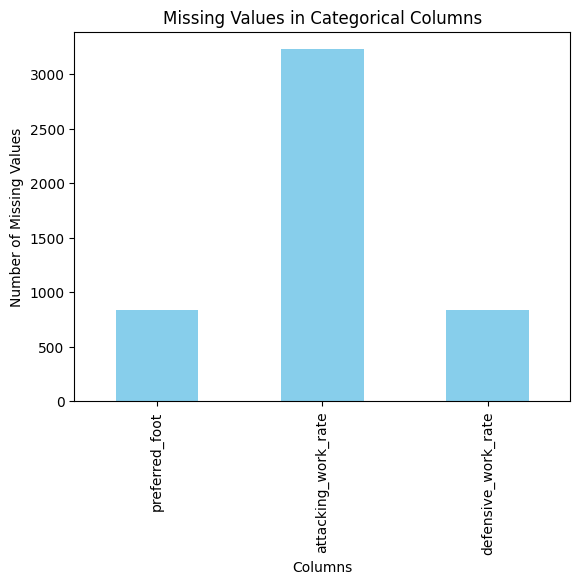

In [ ]:
# Now plotting the missing values to choose implementation method
# Plotting the categorical columns with missing values
categorical_columns_with_missing_values.plot(kind='bar', color='skyblue')
plt.title("Missing Values in Categorical Columns")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")

Text(0, 0.5, 'Number of Missing Values')

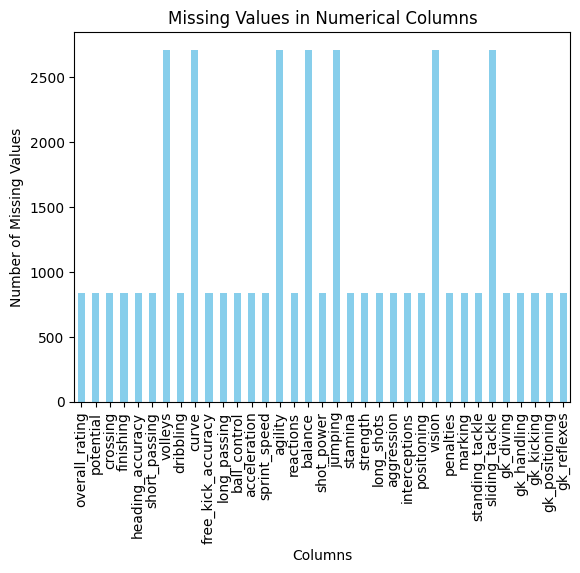

In [ ]:
#Plotting for numerical Columns with missing values
numerical_columns_with_missing_values.plot(kind='bar', color='skyblue')
plt.title("Missing Values in Numerical Columns")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")

Some columns, like volleys, curve, and sliding_tackle, have a higher number of missing values (over 2,000).
This could impact analyses, so filling these values is important to retain data consistency. With a dataset of 183,978 rows, dropping 836 rows would leave you with 183,142 rows—an extremely small reduction of about 0.45%. This minimal reduction in size supports our decision to drop these rows, as it won't significantly impact the dataset's representativeness or the quality of our analysis. We drop 836 missing values and fill the rest of the missing values.

**Dropping Rows with missing values**: Remove rows with 836 missing values.

In [ ]:
# Drop rows with exactly 836 missing values
# Identifying columns with 836 missing values
cols_with_836_missing = missing_values[missing_values == 836].index

In [ ]:
# Droping the rows with missing values in those columns
player_attributes_df = player_attributes_df.dropna(subset=cols_with_836_missing)

In [ ]:
# Reassess missing values in the filtered dataset
remaining_missing_values = player_attributes_df.isna().sum()
# Filter for columns with remaining missing values
remaining_missing_values = remaining_missing_values[remaining_missing_values > 0]

In [ ]:
# Now lets display the remaining missing values
remaining_missing_values

,0
attacking_work_rate,2394
volleys,1877
curve,1877
agility,1877
balance,1877
jumping,1877
vision,1877
sliding_tackle,1877


In [ ]:
# Now we separate the columns containing the remaining missing values that are categorical and numerical
# Categorical columns containing remaining missing values
categorical_columns_with_missing_values = remaining_missing_values[player_attributes_df[remaining_missing_values.index].select_dtypes(include='object').columns]
categorical_columns_with_missing_values

,0
attacking_work_rate,2394


We are left with one column containing missing categorical values (attacking_work_rate). We will impute the mode (the most frequent categorical value) to those missing datas.

In [ ]:
# Impute remaining missing values in the categorical column 'attacking_work_rate' with the mode (most frequent value)
mode_value = player_attributes_df['attacking_work_rate'].mode()[0]  # Get the mode of the column
player_attributes_df.loc[:, 'attacking_work_rate'] = player_attributes_df['attacking_work_rate'].fillna(mode_value)
# Fill missing values with the mode

In [ ]:
remaining_categorical_missing = player_attributes_df['attacking_work_rate'].isna().sum()
remaining_categorical_missing

0

In [ ]:
# Numerical columns containing missing values
numerical_columns_with_missing_values = remaining_missing_values.index.intersection(player_attributes_df.select_dtypes(include='number').columns)

numerical_columns_with_missing_values

Index(['volleys', 'curve', 'agility', 'balance', 'jumping', 'vision',
       'sliding_tackle'],
      dtype='object')

In [ ]:
#Looking closely at the number of missing values for each columns
missing_counts = player_attributes_df[numerical_columns_with_missing_values].isna().sum()
print(missing_counts)

volleys           1877
curve             1877
agility           1877
balance           1877
jumping           1877
vision            1877
sliding_tackle    1877
dtype: int64


**We are left with 7 numerical columns to impute missing values to.**

**First** - We will determine if we need to use Mean or Median: For each numerical column with missing values, we'll decide whether to use the mean or median based on a 10% relative difference threshold we decided to establishe.

**Then** we will impute the missing values: We will apply the appropriate method (mean or median) to fill in the missing values for each numerical column as indicated by the threshold.

This chart shows that some columns, like **volleys** and **sliding_tackle**, have a notable difference between mean and median, indicating skewed data. For these columns, a median imputation is more appropriate to reduce the
impact of outliers.


---


Other columns, such as **agility** and **jumping**, have similar mean and median values, suggesting a balanced distribution. For those columns, a mean imputation would be more appropriate.


---


Using both methods allows us to handle missing data in a way that respects each column’s distribution, ensuring a more accurate data representation.

## **3.3 Imputing Missing Values:**

**Imputing Missing Values** : Imputing categorical values with mode and determine numerical column imputation method (mean or median) based on a 10% relative difference threshold.

**Compare Mean and Median Distributions**: Plot and review distributions of imputed columns to confirm appropriate imputation.

In [ ]:
# Calculating both mean and median for each numerical column with missing values ( in order to compare them later on )
mean_values = player_attributes_df[numerical_columns_with_missing_values].mean()
median_values = player_attributes_df[numerical_columns_with_missing_values].median()

In [ ]:
# Combining means and medians into a DataFrame for plotting
mean_median_df = pd.DataFrame({'Mean': mean_values, 'Median': median_values})

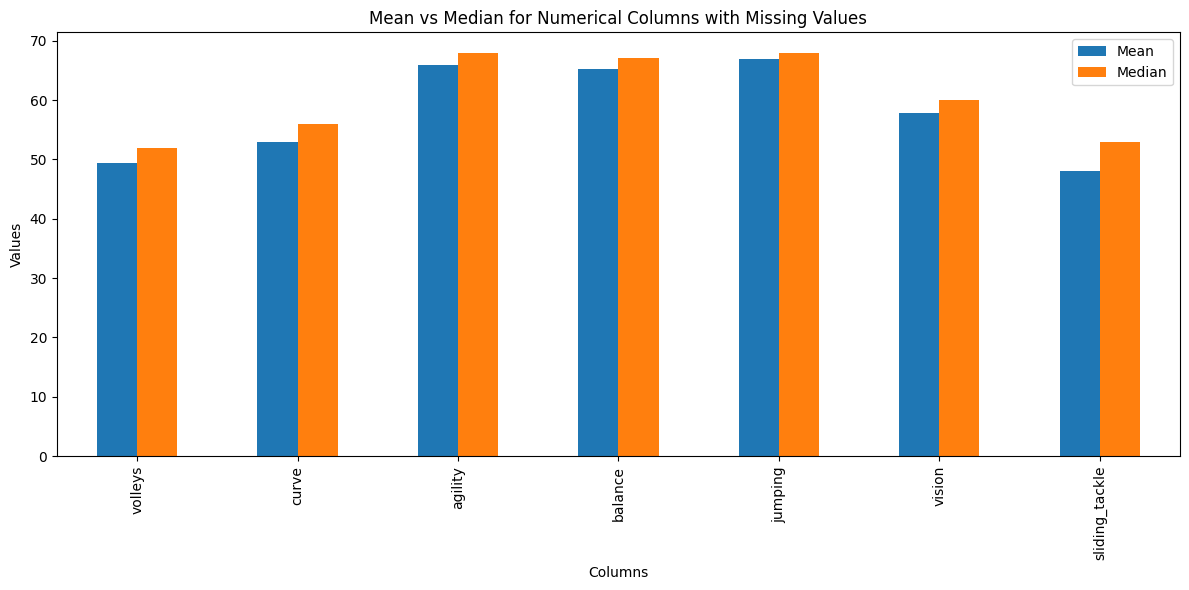

In [ ]:
# Plotting the comparison between mean and median
mean_median_df.plot(kind='bar', figsize=(12, 6))
plt.title("Mean vs Median for Numerical Columns with Missing Values")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.legend(["Mean", "Median"])
plt.tight_layout()
plt.show()

In [ ]:
#Creating a library for the columns to be able to impute mean or median later on
imputation_methods = {}

In [ ]:
# Creating a loop to determine if we use mean or median based on 10% threshold
for column in numerical_columns_with_missing_values:
    mean_val = player_attributes_df[column].mean()
    median_val = player_attributes_df[column].median()

    # Calculating the relative difference
    relative_difference = abs(mean_val - median_val) / mean_val

    # Choosing the imputation method based on threshold
    if relative_difference > 0.10:
        imputation_methods[column] = 'median'
    else:
        imputation_methods[column] = 'mean'

In [ ]:
# Implementing the imputation based on selected methods using .loc
for column, method in imputation_methods.items():
    if method == 'mean':
        # Use mean imputation
        player_attributes_df.loc[:, column] = player_attributes_df[column].fillna(player_attributes_df[column].mean())
    elif method == 'median':
        # Use median imputation
        player_attributes_df.loc[:, column] = player_attributes_df[column].fillna(player_attributes_df[column].median())

## **3.4 Imputing incorrect categorical entries:**

In [ ]:
# Function to impute invalid values with the mode
def impute_with_mode(column):
    valid_values = ['medium', 'low', 'high']
    # Calculate mode for valid values
    mode_value = player_attributes_df[column][player_attributes_df[column].isin(valid_values)].mode()[0]
    # Replace invalid values and NaN with mode
    player_attributes_df[column] = player_attributes_df[column].apply(lambda x: mode_value if x not in valid_values else x)
    player_attributes_df[column].fillna(mode_value, inplace=True)

# Impute both columns
impute_with_mode('attacking_work_rate')
impute_with_mode('defensive_work_rate')

<ipython-input-99-168d1aad14ed>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  player_attributes_df[column].fillna(mode_value, inplace=True)


## **3.5 Identifying the outliers:**

**Outlier Handling**

Identify outliers using z-scores: Use z-scores to detect outliers in numerical columns.

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
# Identifying numerical and categorical columns
numerical_cols = player_attributes_df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = player_attributes_df.select_dtypes(include='object').columns

In [ ]:
# Applying StandardScaler to calculate the z-scores
scaler = StandardScaler()
scaled_data = scaler.fit_transform(player_attributes_df[numerical_cols])

In [ ]:
# Converting the scaled data to a DataFrame for an easier analysis
scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols)

In [ ]:
# Checking the mean and standard deviation
print(scaled_df.mean(axis=0))  # Should be close to 0
print(scaled_df.std(axis=0))   # Should be close to 1

In [ ]:
# Identify outliers using a threshold of absolute z-score > 3
outliers = (np.abs(scaled_df) > 3).sum()

In [ ]:
# Display the number of outliers per column
print(outliers)

overall_rating          751
potential               312
crossing                 10
finishing                 0
heading_accuracy        201
short_passing          1296
volleys                   0
dribbling                47
curve                     0
free_kick_accuracy        0
long_passing            675
ball_control           1321
acceleration           1012
sprint_speed           1395
agility                 542
reactions              1293
balance                 588
shot_power              757
jumping                2538
stamina                1819
strength               1071
long_shots                0
aggression              144
interceptions             0
positioning               0
vision                  830
penalties                80
marking                   0
standing_tackle           0
sliding_tackle            0
gk_diving             10501
gk_handling            9632
gk_kicking              270
gk_positioning         9366
gk_reflexes            9427
dtype: int64


**Plotting the Outliers**

With Boxplot and Histograms

In [ ]:
key_numerical_cols = ['potential', 'crossing', 'heading_accuracy', 'short_passing','long_passing' ,
'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
'strength' , 'aggression', 'vision', 'penalties', 'dribbling', 'ball_control']

<ipython-input-107-3613ec0a13a9>:19: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


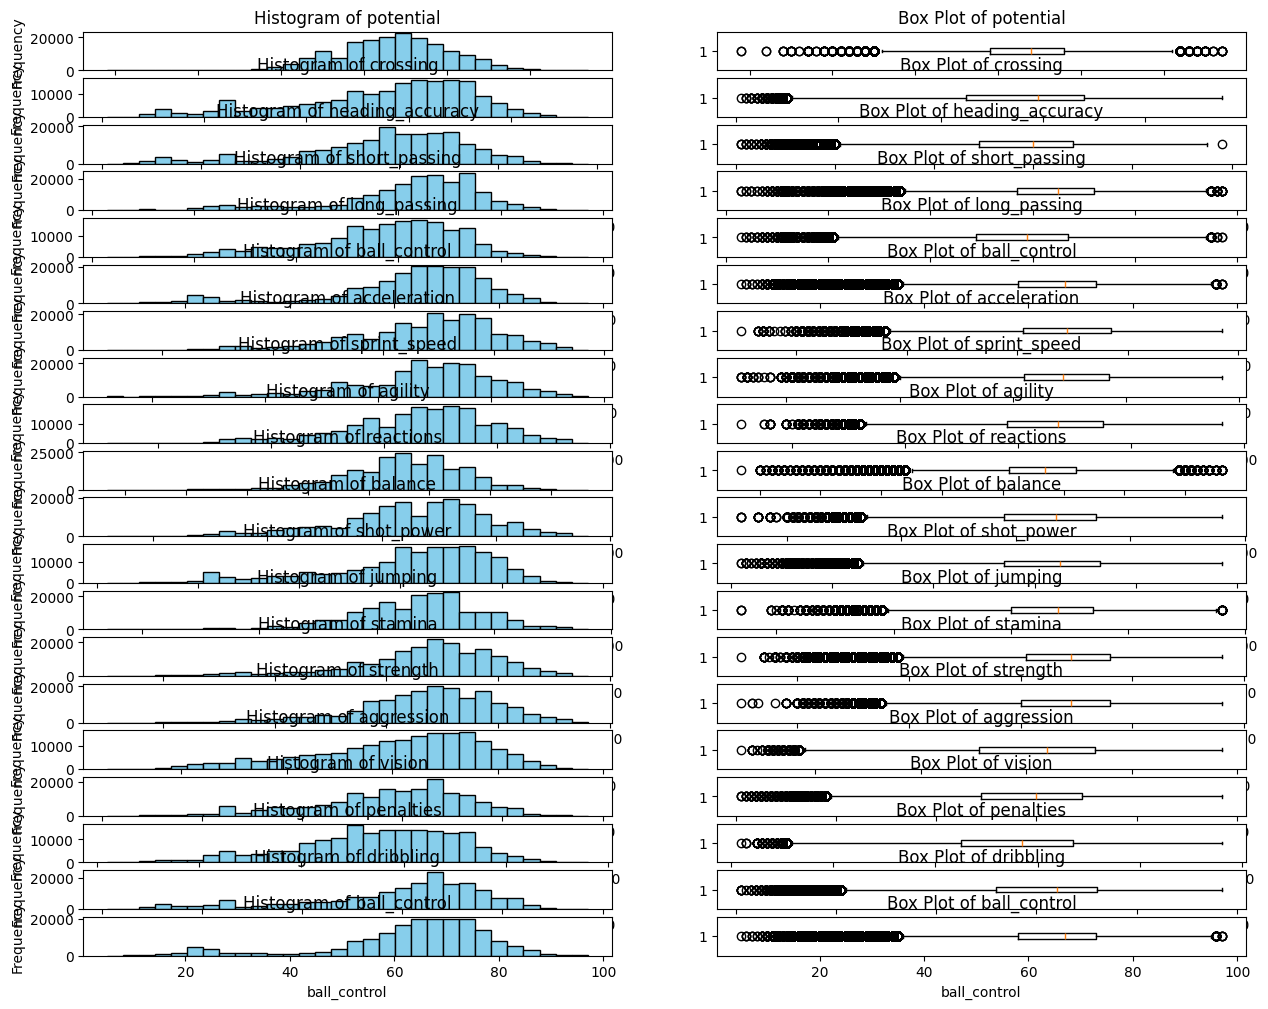

In [ ]:
# Create histograms and box plots for each selected numerical column to visualize outliers
plt.figure(figsize=(15, 12))

# Plot each key feature's histogram and box plot
for i, col in enumerate(key_numerical_cols, 1):
    # Histogram
    plt.subplot(len(key_numerical_cols), 2, 2 * i - 1)
    plt.hist(player_attributes_df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

    # Box plot
    plt.subplot(len(key_numerical_cols), 2, 2 * i)
    plt.boxplot(player_attributes_df[col], vert=False)
    plt.title(f"Box Plot of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Outliers on the right could be very good players.

## **3.6 Capping High-Performance Outliers:**

In [ ]:
# Updated list of high-performance columns to include goalkeeping attributes
high_performance_cols = [
    'sprint_speed', 'acceleration', 'strength', 'jumping', 'potential',
    'agility', 'reactions', 'shot_power', 'dribbling', 'ball_control',
    'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'
]

# Updated list of potential error columns to account for variability
potential_error_cols = [
    'balance', 'penalties', 'aggression', 'vision', 'heading_accuracy',
    'crossing', 'short_passing', 'long_passing', 'stamina'
]

In [ ]:
# Cap high-performance outliers at the 99th percentile
for col in high_performance_cols:
    upper_limit = player_attributes_df[col].quantile(0.99)
    player_attributes_df.loc[:, col] = player_attributes_df[col].clip(upper=upper_limit)

In [ ]:
# Cap potential error outliers at the 95th percentile
for col in potential_error_cols:
    upper_limit = player_attributes_df[col].quantile(0.95)
    player_attributes_df.loc[:,col] = player_attributes_df[col].clip(upper=upper_limit)

In [ ]:
# Display summary statistics to verify the effect of capping
print(player_attributes_df[high_performance_cols + potential_error_cols].describe(percentiles=[0.95, 0.99]))

        sprint_speed   acceleration       strength        jumping  \
count  183142.000000  183142.000000  183142.000000  183142.000000   
mean       68.034432      67.649228      67.412696      66.951884   
std        12.537206      12.963333      12.048055      10.911949   
min        12.000000      10.000000      10.000000      14.000000   
50%        69.000000      69.000000      69.000000      68.000000   
95%        86.000000      86.000000      85.000000      83.000000   
99%        91.000000      92.000000      91.000000      90.000000   
max        91.000000      92.000000      91.000000      90.000000   

           potential        agility      reactions     shot_power  \
count  183142.000000  183142.000000  183142.000000  183142.000000   
mean       73.444103      65.958783      66.082078      61.786188   
std         6.552495      12.863384       9.105604      16.097602   
min        39.000000      11.000000      17.000000       2.000000   
50%        74.000000      67.0000

#**4. Analyzing Data**

## **4.1 Role Based Feature Engineering:**

The players outliers seem to create distinct profiles. We will create player roles based on those outliers.
**Segment Player Roles**: Classify players into roles (e.g., Forward, Midfielder, Defender) based on attribute thresholds

In [ ]:
# Ensure necessary columns exist in the Player_Attributes dataset for scoring roles
required_columns = [
    'sprint_speed', 'dribbling', 'shot_power', 'agility',  # Forward
    'short_passing', 'long_passing', 'vision', 'ball_control',  # Midfielder
    'strength', 'jumping', 'aggression', 'heading_accuracy',  # Defender
    'gk_reflexes', 'gk_diving', 'gk_handling', 'gk_kicking'  # Goalkeeper
]

# Check if all required columns are present
missing_columns = [col for col in required_columns if col not in player_attributes_df.columns]
if missing_columns:
    raise ValueError(f"The following columns are missing from the dataset: {missing_columns}")

# Calculate role scores
player_attributes_df['forward_score'] = (
    0.3 * player_attributes_df['sprint_speed'] +
    0.3 * player_attributes_df['dribbling'] +
    0.2 * player_attributes_df['shot_power'] +
    0.2 * player_attributes_df['agility']
)

player_attributes_df['midfielder_score'] = (
    0.3 * player_attributes_df['short_passing'] +
    0.3 * player_attributes_df['long_passing'] +
    0.2 * player_attributes_df['vision'] +
    0.2 * player_attributes_df['ball_control']
)

player_attributes_df['defender_score'] = (
    0.3 * player_attributes_df['strength'] +
    0.3 * player_attributes_df['jumping'] +
    0.2 * player_attributes_df['aggression'] +
    0.2 * player_attributes_df['heading_accuracy']
)

player_attributes_df['goalkeeper_score'] = (
    0.3 * player_attributes_df['gk_reflexes'] +
    0.3 * player_attributes_df['gk_diving'] +
    0.2 * player_attributes_df['gk_handling'] +
    0.2 * player_attributes_df['gk_kicking']
)

In [ ]:
# Assign role based on the highest score
player_attributes_df['player_role'] = player_attributes_df[
    ['forward_score', 'midfielder_score', 'defender_score', 'goalkeeper_score']
].idxmax(axis=1).str.replace('_score', '')

In [ ]:

# Display the distribution of roles
role_distribution = player_attributes_df['player_role'].value_counts()
role_distribution

,count
player_role,
forward,73192
defender,67713
midfielder,27477
goalkeeper,14760


As we are trying to predict player_role, this segmentation was needed. Without this segmentation, the model might struggle to balance different attributes that are important for forwards versus defenders. With segmentation, the model can apply more relevant features to each role, likely resulting in better predictive accuracy and clearer insights.

## **4.2 Descriptive Statistics by Role:**
Calculating summary statistics for each role to see if attributes differs as expected between Forwards, Midfielders, Defenders, and Others.

In [ ]:
# Calculate descriptive statistics for each role
role_summary = player_attributes_df.groupby('player_role').agg({
    'sprint_speed': ['mean', 'median', 'min', 'max'],
    'acceleration': ['mean', 'median', 'min', 'max'],
    'shot_power': ['mean', 'median', 'min', 'max'],
    'dribbling': ['mean', 'median', 'min', 'max'],
    'short_passing': ['mean', 'median', 'min', 'max'],
    'long_passing': ['mean', 'median', 'min', 'max'],
    'vision': ['mean', 'median', 'min', 'max'],
    'strength': ['mean', 'median', 'min', 'max'],
    'jumping': ['mean', 'median', 'min', 'max'],
    'balance': ['mean', 'median', 'min', 'max']
})

# Display descriptive statistics by role
role_summary

sprint_speed                    acceleration                     \
                    mean median   min   max         mean median   min   max   
player_role                                                                   
defender       64.573302   66.0  20.0  91.0    63.075776   65.0  10.0  92.0   
forward        76.708575   77.0  30.0  91.0    76.834162   77.0  32.0  92.0   
goalkeeper     46.047629   47.0  12.0  79.0    45.717141   46.0  13.0  87.0   
midfielder     65.268879   67.0  16.0  90.0    66.234815   67.0  22.0  92.0   

            shot_power         ... strength          jumping               \
                  mean median  ...      min   max       mean median   min   
player_role                    ...                                          
defender     59.864162   62.0  ...     30.0  91.0  71.177362   72.0  21.0   
forward      67.835938   69.0  ...     12.0  91.0  65.215553   66.0  19.0   
goalkeeper   28.734350   25.0  ...     10.0  91.0  64.949734   66.0  14.0   
midfielder   68.162354   70.0  ...     22.0  91.0  62.239486   63.0  20.0   

                     balance                     
              max       mean median   min   max  
player_role                                      
defender     90.0  61.135311   62.0  20.0  84.0  
forward      90.0  70.714350   72.0  21.0  84.0  
goalkeeper   90.0  47.771825   48.0  12.0  84.0  
midfielder   90.0  68.534137   70.0  22.0  84.0  

[4 rows x 40 columns]

Analyzing Correlation of Role-Based Attributes with overall_rating

In [ ]:
# Perform correlation analysis for each role, ensuring only numeric columns are included
role_correlation = player_attributes_df.groupby('player_role').apply(
    lambda x: x.select_dtypes(include=[float, int]).corr()['overall_rating']
).drop('overall_rating', axis=1)

# Display the role-based correlation with overall_rating
role_correlation

<ipython-input-116-3c7d9391cd21>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  role_correlation = player_attributes_df.groupby('player_role').apply(


overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,forward_score,midfielder_score,defender_score,goalkeeper_score
player_role,,,,,,,,,,,,,,,,,,,,,
defender,0.770907,0.293163,0.278499,0.718881,0.612544,0.312839,0.376837,0.290916,0.278409,0.489258,...,0.270432,-0.000844,-0.084616,0.012938,-0.087728,-0.076091,0.446846,0.623413,0.801555,-0.030558
forward,0.757209,0.633870,0.555017,0.431908,0.754956,0.593003,0.821401,0.622435,0.525718,0.525496,...,0.060775,0.065524,-0.057489,0.020337,-0.055719,-0.046836,0.845500,0.782295,0.493438,0.001552
goalkeeper,0.805597,-0.021112,-0.018404,-0.029700,0.124822,0.006198,-0.023444,-0.021398,0.012774,0.128465,...,-0.015508,0.898301,0.881493,0.706159,0.887491,0.893878,0.238048,0.207692,0.450152,0.963318
midfielder,0.753780,0.632731,0.528749,0.409175,0.837305,0.529785,0.721915,0.552910,0.507307,0.768029,...,0.212728,0.014393,-0.071460,-0.042203,-0.080793,-0.072761,0.736826,0.903970,0.484255,-0.055694


In [ ]:
# Code for descriptive statistics and visual validation
role_summary = role_correlation.groupby('player_role').agg({
    'sprint_speed': ['mean', 'median', 'min', 'max'],
    # Other role-based attributes
})

**Box Plot Analysis**

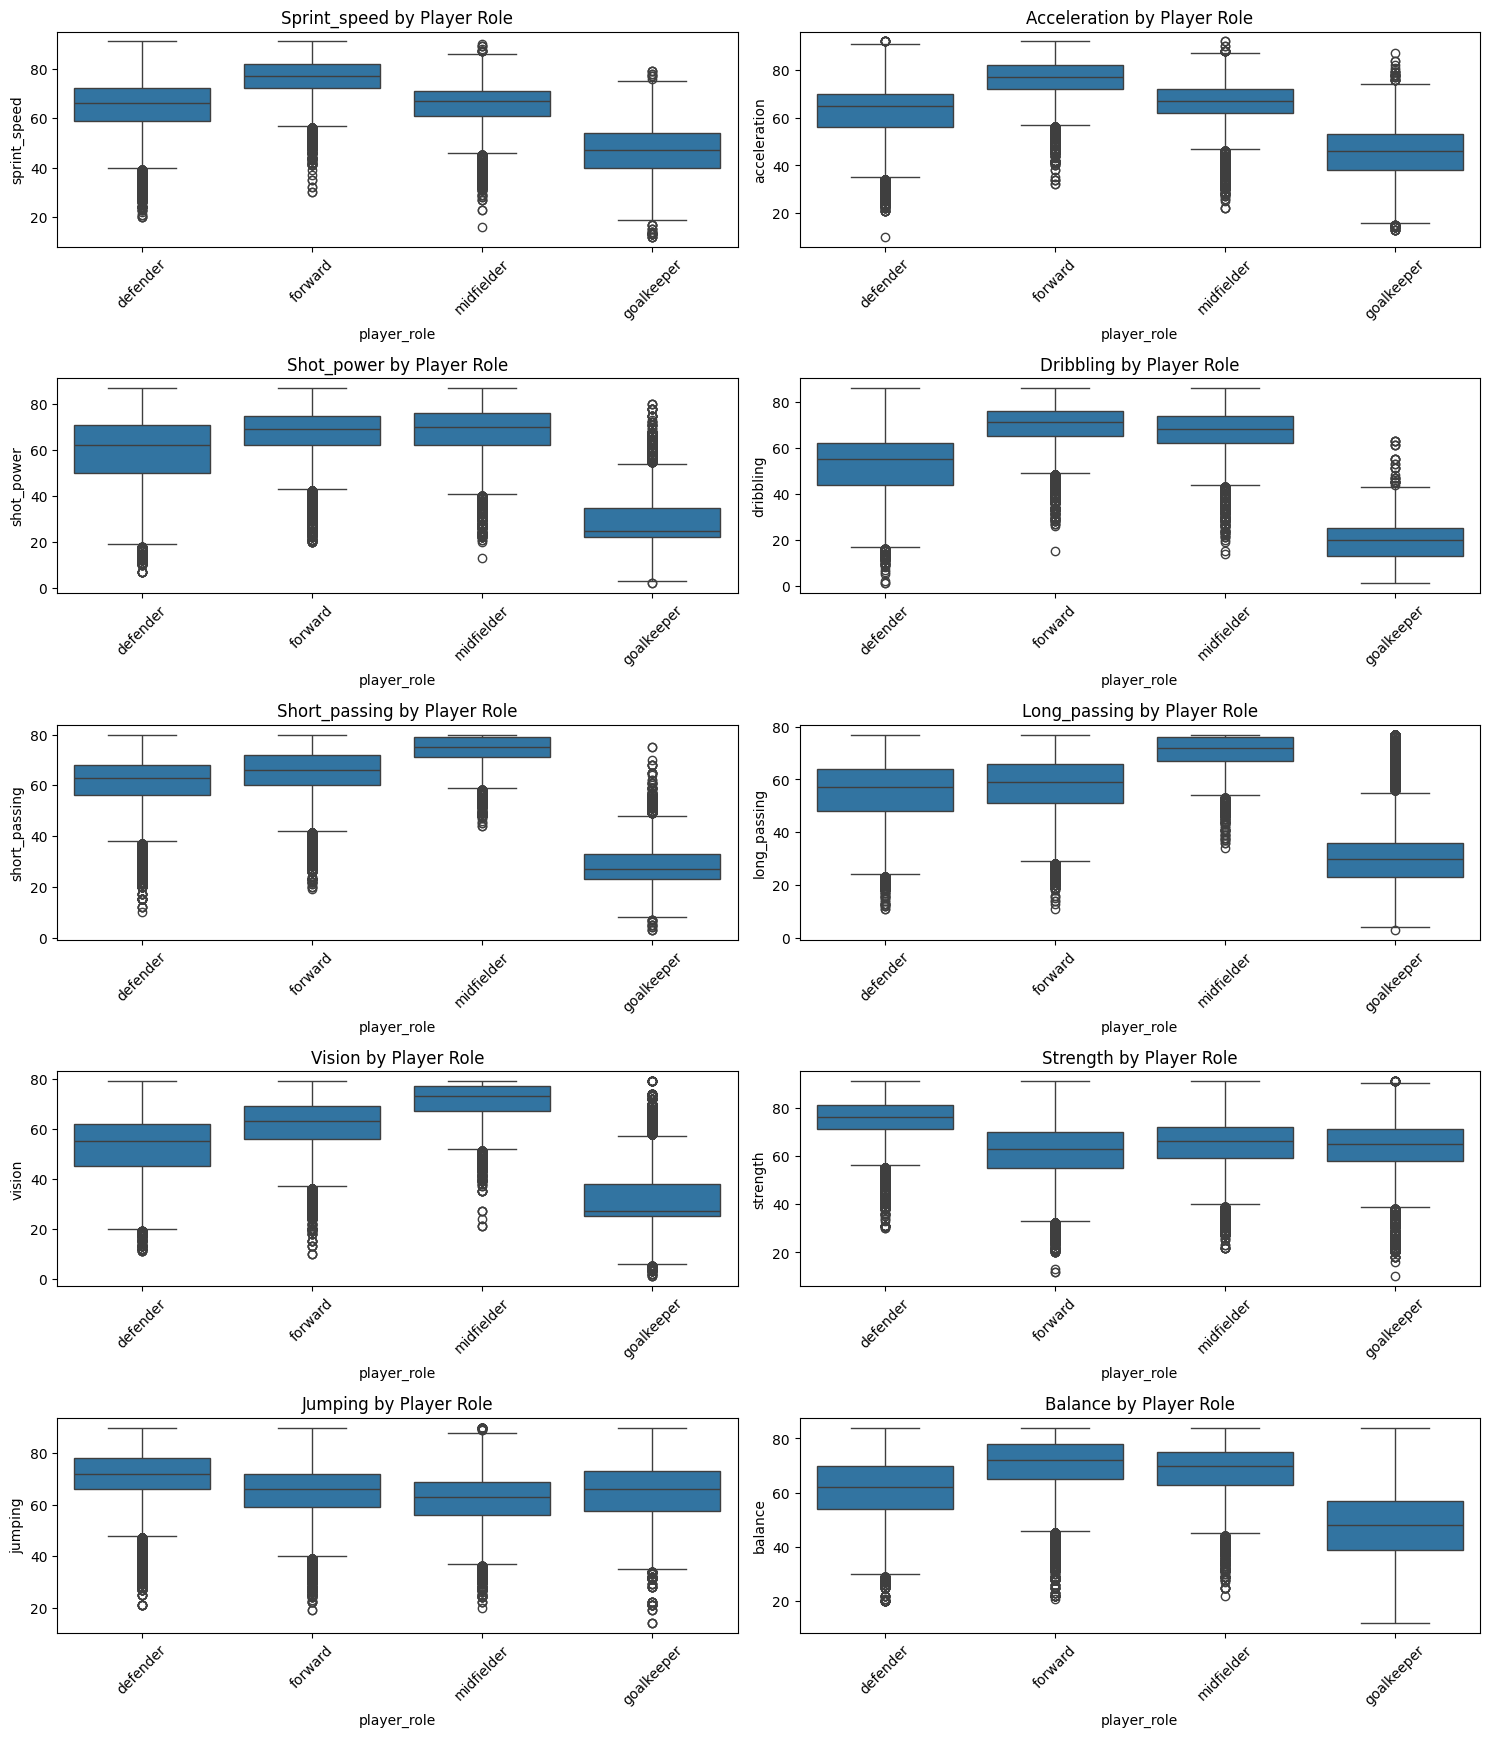

In [ ]:
import seaborn as sns

# Define attributes to visualize
attributes_to_plot = ['sprint_speed', 'acceleration', 'shot_power', 'dribbling',
                      'short_passing', 'long_passing', 'vision', 'strength',
                      'jumping', 'balance']

# Plot each attribute with box plots by role
plt.figure(figsize=(15, 20))
for i, attribute in enumerate(attributes_to_plot, 1):
    plt.subplot(len(attributes_to_plot) // 2 + 1, 2, i)
    sns.boxplot(x='player_role', y=attribute, data=player_attributes_df)
    plt.title(f'{attribute.capitalize()} by Player Role')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Based on the box plot results, it looks like the segmentation by player role is meaningful, as we can observe distinct patterns in the key attributes across different roles. For example, defenders tend to have higher strength and jumping, while forwards and midfielders show stronger attributes in sprint_speed, dribbling, and shot_power. This validates that the segmentation aligns well with expected player characteristics.

## **4.3 Descriptive & Inferential Statistics:**

In [ ]:
# Display the summary statistics for all columns
summary_stats_all = player_attributes_df.describe(include='all').transpose()
print(summary_stats_all)

                        count unique      top    freq       mean        std  \
overall_rating       183142.0    NaN      NaN     NaN  68.600015   7.041139   
potential            183142.0    NaN      NaN     NaN  73.444103   6.552495   
preferred_foot         183142      2    right  138409        NaN        NaN   
attacking_work_rate    183142      3   medium  131750        NaN        NaN   
defensive_work_rate    183142      3   medium  137669        NaN        NaN   
crossing             183142.0    NaN      NaN     NaN  54.923431  16.993967   
finishing            183142.0    NaN      NaN     NaN  49.921078  19.038705   
heading_accuracy     183142.0    NaN      NaN     NaN   57.04977  16.154613   
short_passing        183142.0    NaN      NaN     NaN  62.251237   13.93302   
volleys              183142.0    NaN      NaN     NaN  49.468436  18.162822   
dribbling            183142.0    NaN      NaN     NaN  59.150462  17.704158   
curve                183142.0    NaN      NaN     Na

### 4.3.1 **Univariate Categorical Data:**

Summary Table for preferred_foot:
   preferred_foot  Frequency  Percentage
0          right     138409   75.574691
1           left      44733   24.425309 



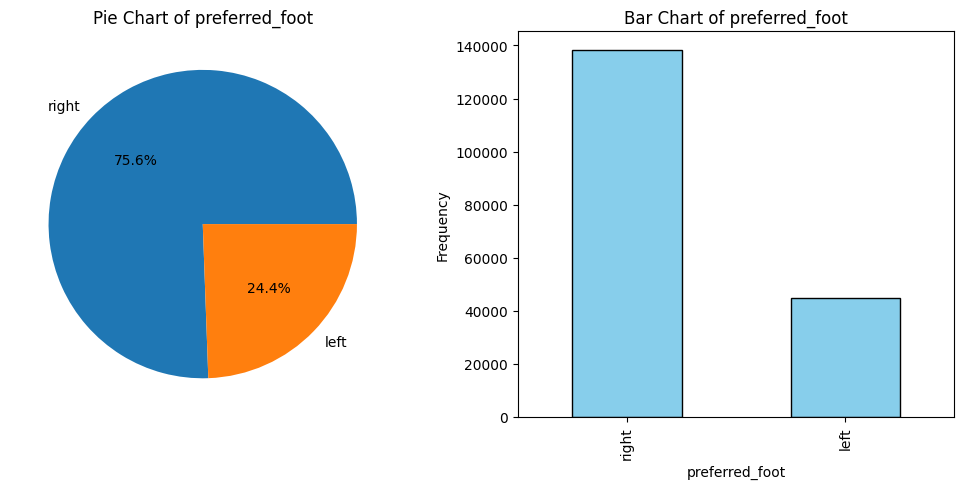

Summary Table for attacking_work_rate:
   attacking_work_rate  Frequency  Percentage
0              medium     131750   71.938714
1                high      42823   23.382403
2                 low       8569    4.678883 



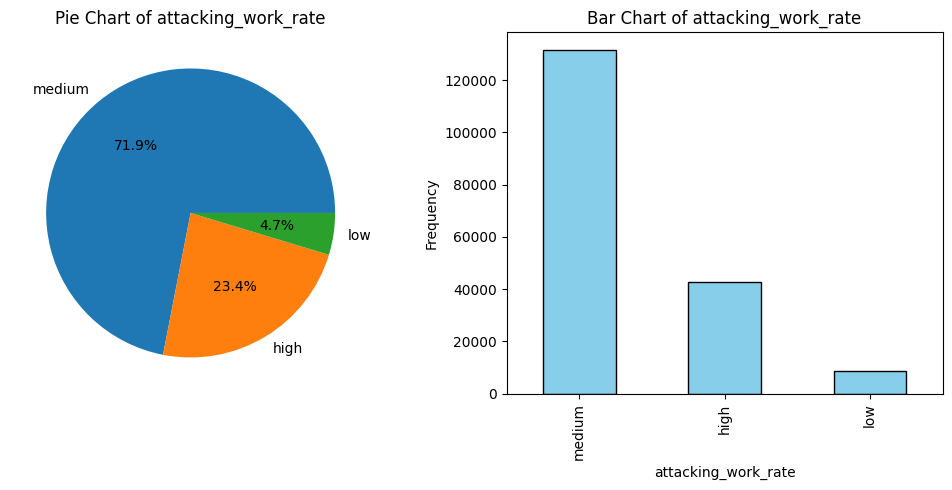

Summary Table for defensive_work_rate:
   defensive_work_rate  Frequency  Percentage
0              medium     137669   75.170633
1                high      27041   14.765046
2                 low      18432   10.064322 



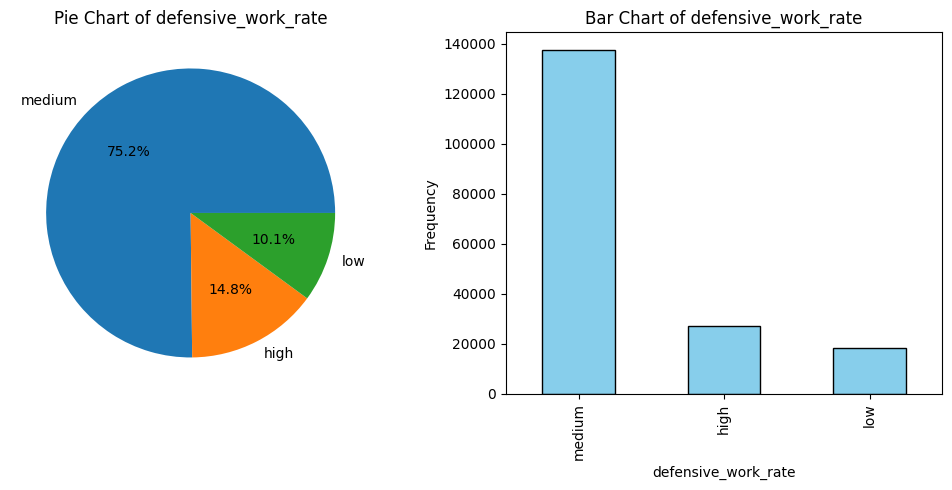

Summary Table for player_role:
   player_role  Frequency  Percentage
0     forward      73192   39.964618
1    defender      67713   36.972950
2  midfielder      27477   15.003112
3  goalkeeper      14760    8.059320 



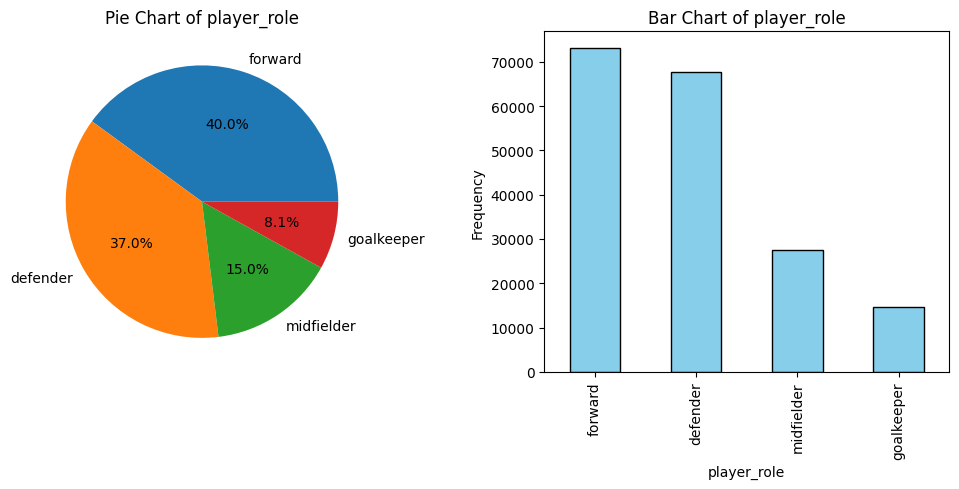

In [ ]:
def uni_cat_analysis(data):
    # Automatically detect categorical variables
    cat_vars = data.select_dtypes(include=['object', 'category']).columns
    summary_tables = {}

    for var in cat_vars:
        # Summary table
        summary_table = data[var].value_counts().reset_index()
        summary_table.columns = [var, 'Frequency']
        summary_table['Percentage'] = (summary_table['Frequency'] / len(data)) * 100
        summary_tables[var] = summary_table
        print(f"Summary Table for {var}:\n", summary_table, "\n")

        plt.figure(figsize=(10, 5))

        # Pie chart
        plt.subplot(1, 2, 1)
        plt.pie(data[var].value_counts(), labels=data[var].value_counts().index, autopct='%1.1f%%')
        plt.title(f'Pie Chart of {var}')

        # Bar chart
        plt.subplot(1, 2, 2)
        data[var].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Bar Chart of {var}')
        plt.xlabel(var)
        plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()

    return summary_tables

# ACTIVATE WHEN NEEDED, TAKES TIME
summary_tables = uni_cat_analysis(player_attributes_df)

### **4.3.2 Univariate Numerical Data:**


Frequency Table for overall_rating:
     overall_rating  Percentage  Frequency
0             68.0    0.057289    10492.0
1             69.0    0.056137    10281.0
2             67.0    0.055684    10198.0
3             66.0    0.055214    10112.0
4             70.0    0.054755    10028.0
..             ...         ...        ...
56            38.0    0.000044        8.0
57            35.0    0.000027        5.0
58            36.0    0.000016        3.0
59            37.0    0.000016        3.0
60            33.0    0.000011        2.0

[61 rows x 3 columns] 



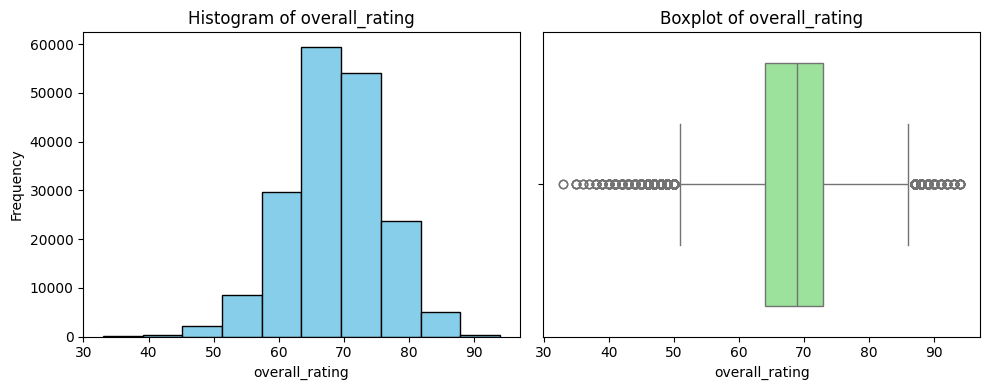

Frequency Table for potential:
     potential  Percentage  Frequency
0        75.0    0.061537    11270.0
1        74.0    0.060827    11140.0
2        76.0    0.058938    10794.0
3        72.0    0.056170    10287.0
4        73.0    0.055301    10128.0
5        70.0    0.051648     9459.0
6        78.0    0.051108     9360.0
7        77.0    0.048853     8947.0
8        71.0    0.047859     8765.0
9        69.0    0.046445     8506.0
10       68.0    0.046281     8476.0
11       67.0    0.040668     7448.0
12       80.0    0.037654     6896.0
13       79.0    0.036966     6770.0
14       66.0    0.035421     6487.0
15       65.0    0.030212     5533.0
16       81.0    0.028082     5143.0
17       82.0    0.027885     5107.0
18       64.0    0.024631     4511.0
19       83.0    0.024047     4404.0
20       84.0    0.021546     3946.0
21       63.0    0.017353     3178.0
22       85.0    0.016151     2958.0
23       88.0    0.013367     2448.0
24       62.0    0.012804     2345.0
25    

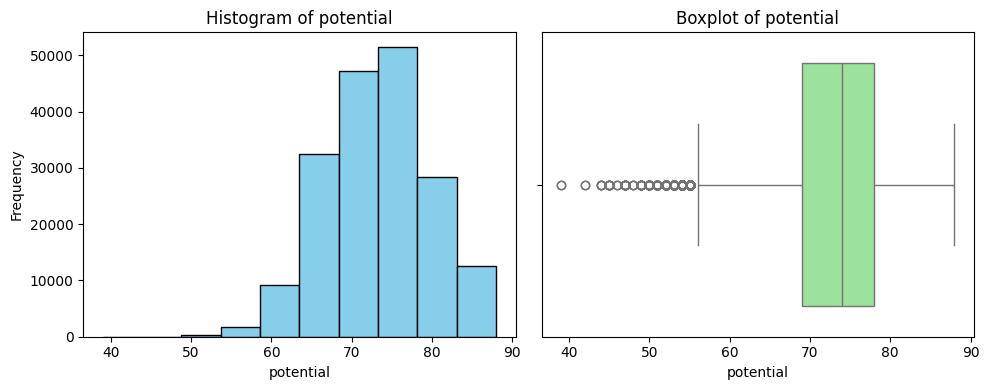

Frequency Table for crossing:
     crossing  Percentage  Frequency
0       78.0    0.052801     9670.0
1       68.0    0.031735     5812.0
2       62.0    0.030954     5669.0
3       67.0    0.030534     5592.0
4       60.0    0.030042     5502.0
..       ...         ...        ...
73       5.0    0.000186       34.0
74       3.0    0.000033        6.0
75       4.0    0.000033        6.0
76       2.0    0.000016        3.0
77       1.0    0.000005        1.0

[78 rows x 3 columns] 



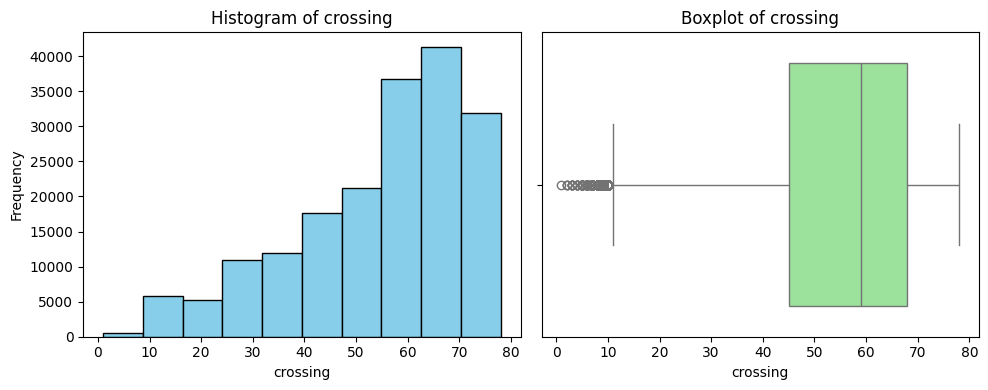

Frequency Table for finishing:
     finishing  Percentage  Frequency
0        25.0    0.042890     7855.0
1        64.0    0.025439     4659.0
2        66.0    0.024626     4510.0
3        65.0    0.024178     4428.0
4        62.0    0.023812     4361.0
..        ...         ...        ...
92        2.0    0.000087       16.0
93        4.0    0.000082       15.0
94       97.0    0.000038        7.0
95        1.0    0.000027        5.0
96       96.0    0.000005        1.0

[97 rows x 3 columns] 



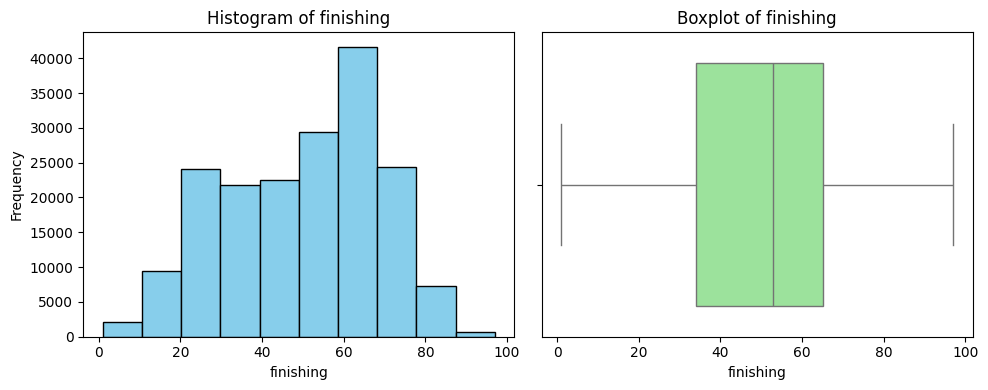

Frequency Table for heading_accuracy:
     heading_accuracy  Percentage  Frequency
0               79.0    0.056601    10366.0
1               68.0    0.033526     6140.0
2               60.0    0.031735     5812.0
3               64.0    0.031260     5725.0
4               58.0    0.030414     5570.0
..               ...         ...        ...
74               5.0    0.000060       11.0
75               3.0    0.000027        5.0
76               2.0    0.000022        4.0
77               4.0    0.000016        3.0
78               1.0    0.000016        3.0

[79 rows x 3 columns] 



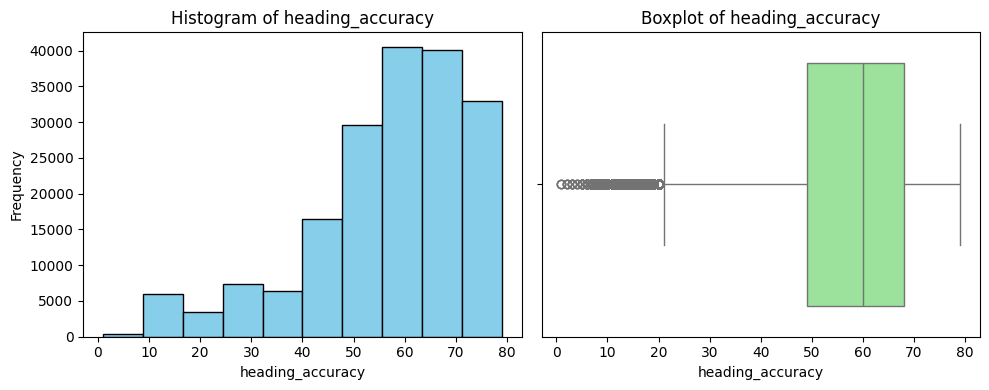

Frequency Table for short_passing:
     short_passing  Percentage  Frequency
0            80.0    0.057693    10566.0
1            65.0    0.042546     7792.0
2            64.0    0.042137     7717.0
3            68.0    0.041121     7531.0
4            66.0    0.040417     7402.0
..            ...         ...        ...
73            7.0    0.000022        4.0
74            5.0    0.000022        4.0
75            3.0    0.000016        3.0
76            6.0    0.000011        2.0
77            4.0    0.000011        2.0

[78 rows x 3 columns] 



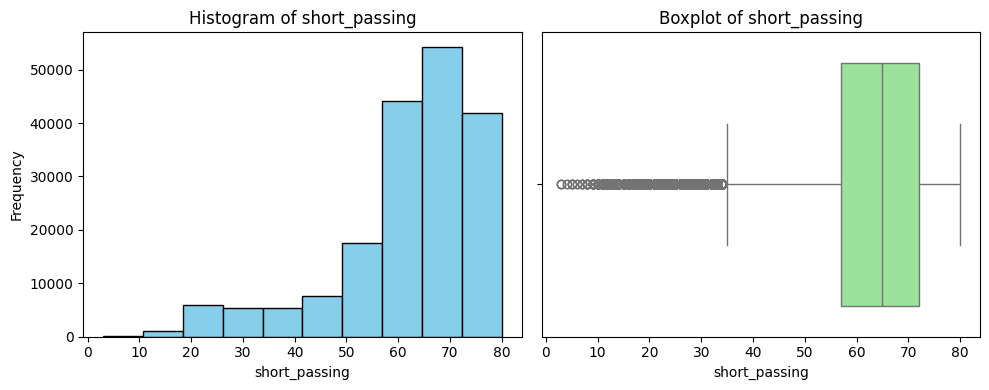

Frequency Table for volleys:
     volleys  Percentage  Frequency
0      25.0    0.039527     7239.0
1      59.0    0.025783     4722.0
2      58.0    0.023954     4387.0
3      60.0    0.023648     4331.0
4      64.0    0.023146     4239.0
..      ...         ...        ...
89      3.0    0.000186       34.0
90      2.0    0.000158       29.0
91     92.0    0.000109       20.0
92     93.0    0.000033        6.0
93      1.0    0.000022        4.0

[94 rows x 3 columns] 



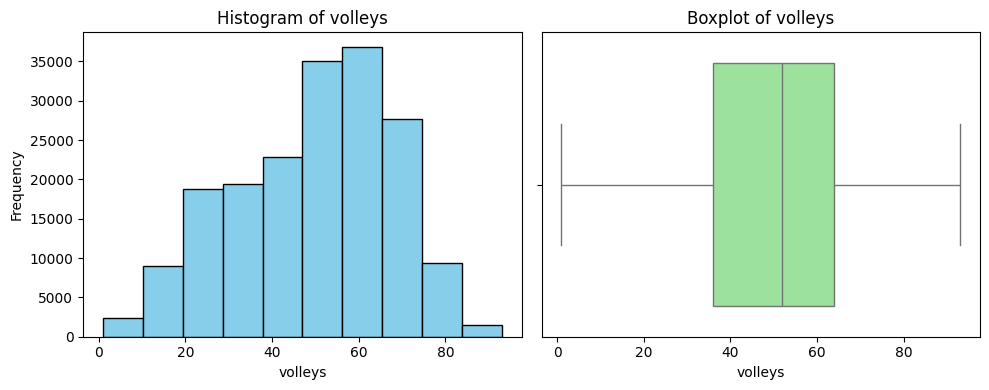

Frequency Table for dribbling:
     dribbling  Percentage  Frequency
0        68.0    0.035142     6436.0
1        66.0    0.033160     6073.0
2        64.0    0.031953     5852.0
3        72.0    0.030998     5677.0
4        67.0    0.030943     5667.0
..        ...         ...        ...
81        5.0    0.000142       26.0
82        4.0    0.000044        8.0
83        1.0    0.000033        6.0
84        3.0    0.000033        6.0
85        2.0    0.000005        1.0

[86 rows x 3 columns] 



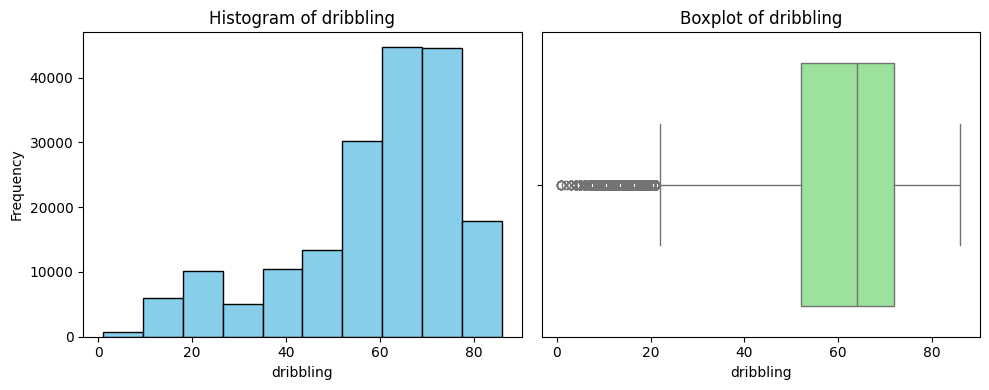

Frequency Table for curve:
     curve  Percentage  Frequency
0    25.0    0.030566     5598.0
1    68.0    0.024937     4567.0
2    60.0    0.024178     4428.0
3    63.0    0.024173     4427.0
4    66.0    0.023812     4361.0
..    ...         ...        ...
88   92.0    0.000147       27.0
89    4.0    0.000115       21.0
90   94.0    0.000093       17.0
91   93.0    0.000016        3.0
92    2.0    0.000011        2.0

[93 rows x 3 columns] 



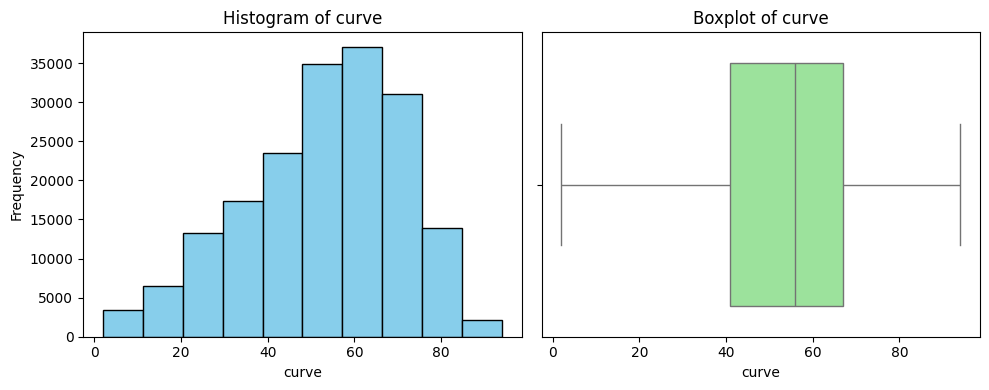

Frequency Table for free_kick_accuracy:
     free_kick_accuracy  Percentage  Frequency
0                 25.0    0.034236     6270.0
1                 60.0    0.022900     4194.0
2                 58.0    0.021213     3885.0
3                 54.0    0.020864     3821.0
4                 42.0    0.020361     3729.0
..                 ...         ...        ...
92                 3.0    0.000027        5.0
93                96.0    0.000016        3.0
94                 1.0    0.000016        3.0
95                 2.0    0.000011        2.0
96                97.0    0.000005        1.0

[97 rows x 3 columns] 



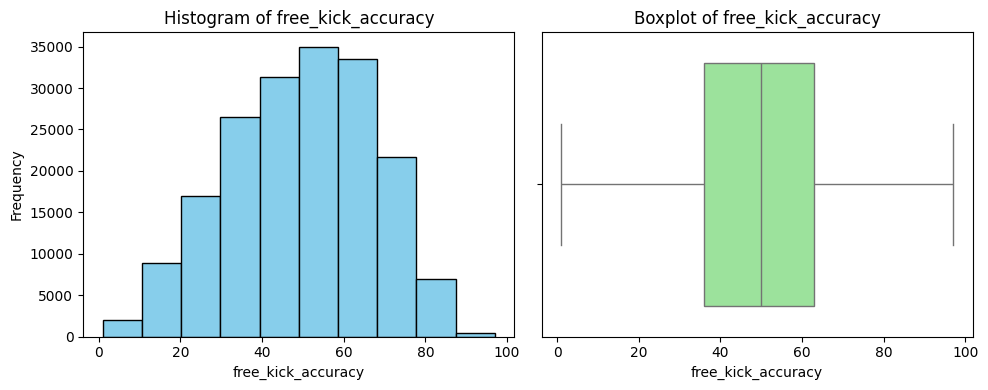

Frequency Table for long_passing:
     long_passing  Percentage  Frequency
0           77.0    0.052713     9654.0
1           64.0    0.036070     6606.0
2           65.0    0.032390     5932.0
3           62.0    0.032237     5904.0
4           58.0    0.031921     5846.0
..           ...         ...        ...
70           9.0    0.000044        8.0
71           5.0    0.000027        5.0
72           6.0    0.000022        4.0
73           4.0    0.000016        3.0
74           3.0    0.000005        1.0

[75 rows x 3 columns] 



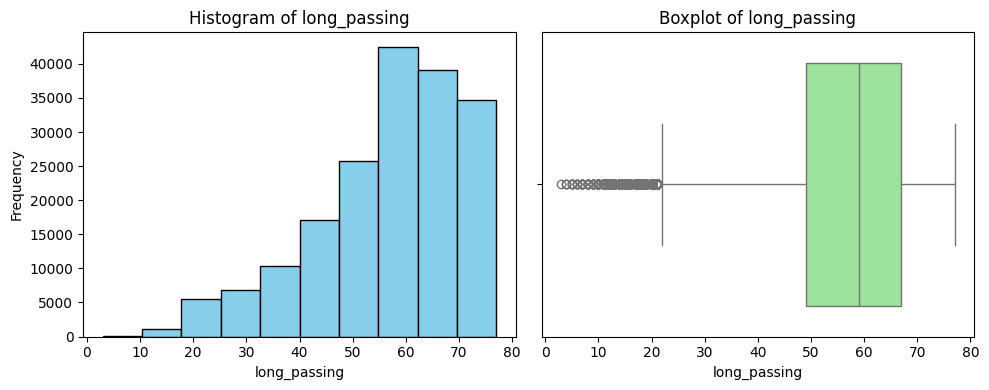

Frequency Table for ball_control:
     ball_control  Percentage  Frequency
0           68.0    0.040755     7464.0
1           74.0    0.038839     7113.0
2           73.0    0.038659     7080.0
3           66.0    0.038227     7001.0
4           72.0    0.037692     6903.0
..           ...         ...        ...
78           9.0    0.000044        8.0
79           6.0    0.000016        3.0
80           7.0    0.000016        3.0
81           8.0    0.000011        2.0
82           5.0    0.000005        1.0

[83 rows x 3 columns] 



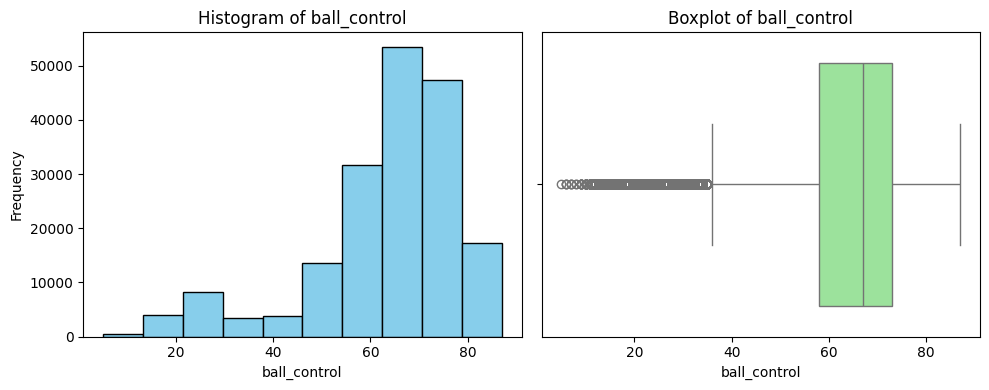

Frequency Table for acceleration:
     acceleration  Percentage  Frequency
0           68.0    0.045822     8392.0
1           69.0    0.041656     7629.0
2           74.0    0.039101     7161.0
3           67.0    0.037135     6801.0
4           76.0    0.036005     6594.0
..           ...         ...        ...
76          19.0    0.000033        6.0
77          18.0    0.000022        4.0
78          17.0    0.000005        1.0
79          10.0    0.000005        1.0
80          16.0    0.000005        1.0

[81 rows x 3 columns] 



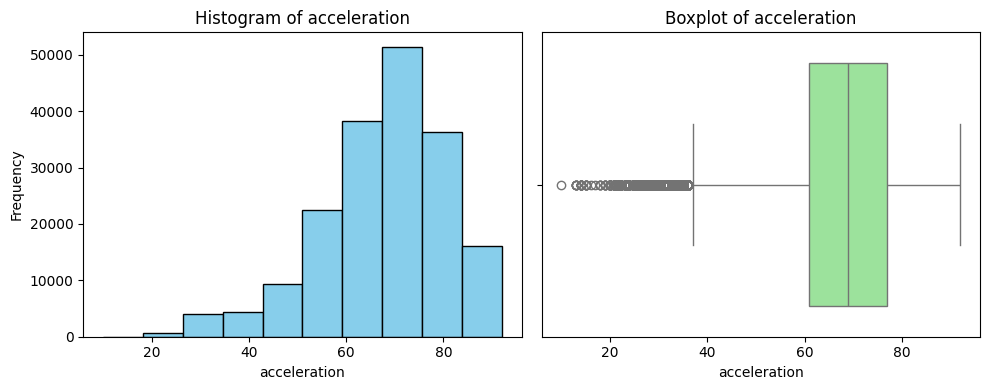

Frequency Table for sprint_speed:
     sprint_speed  Percentage  Frequency
0           68.0    0.051064     9352.0
1           69.0    0.043474     7962.0
2           76.0    0.038997     7142.0
3           74.0    0.038091     6976.0
4           75.0    0.037654     6896.0
..           ...         ...        ...
74          17.0    0.000022        4.0
75          12.0    0.000022        4.0
76          14.0    0.000022        4.0
77          15.0    0.000016        3.0
78          16.0    0.000005        1.0

[79 rows x 3 columns] 



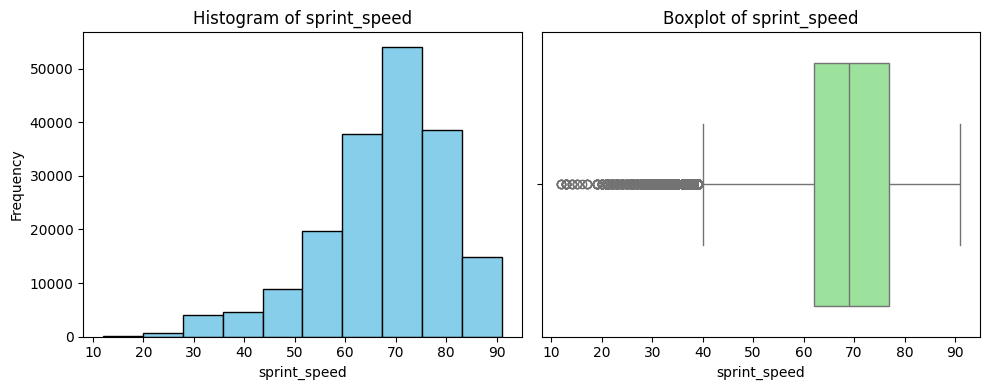

Frequency Table for agility:
     agility  Percentage  Frequency
0      72.0    0.037457     6860.0
1      74.0    0.035038     6417.0
2      73.0    0.034198     6263.0
3      68.0    0.033471     6130.0
4      70.0    0.033417     6120.0
..      ...         ...        ...
72     19.0    0.000055       10.0
73     16.0    0.000038        7.0
74     15.0    0.000011        2.0
75     20.0    0.000011        2.0
76     11.0    0.000005        1.0

[77 rows x 3 columns] 



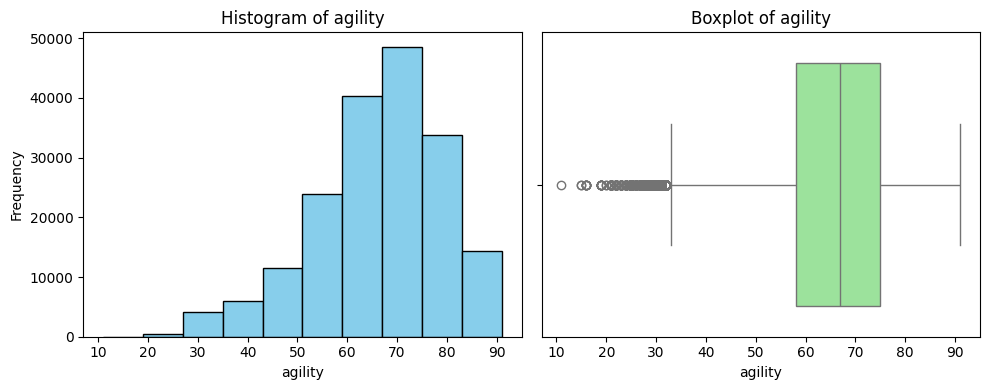

Frequency Table for reactions:
     reactions  Percentage  Frequency
0        68.0    0.049115     8995.0
1        66.0    0.046084     8440.0
2        70.0    0.046035     8431.0
3        67.0    0.045577     8347.0
4        64.0    0.045227     8283.0
..        ...         ...        ...
62       23.0    0.000071       13.0
63       20.0    0.000055       10.0
64       25.0    0.000038        7.0
65       21.0    0.000027        5.0
66       17.0    0.000005        1.0

[67 rows x 3 columns] 



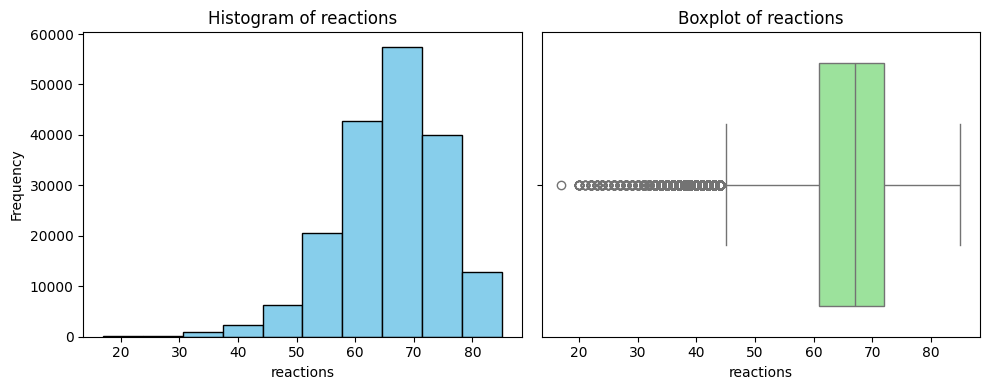

Frequency Table for balance:
     balance  Percentage  Frequency
0      84.0    0.056574    10361.0
1      70.0    0.038855     7116.0
2      72.0    0.038216     6999.0
3      71.0    0.034744     6363.0
4      74.0    0.033635     6160.0
..      ...         ...        ...
65     20.0    0.000278       51.0
66     17.0    0.000049        9.0
67     15.0    0.000044        8.0
68     12.0    0.000022        4.0
69     18.0    0.000016        3.0

[70 rows x 3 columns] 



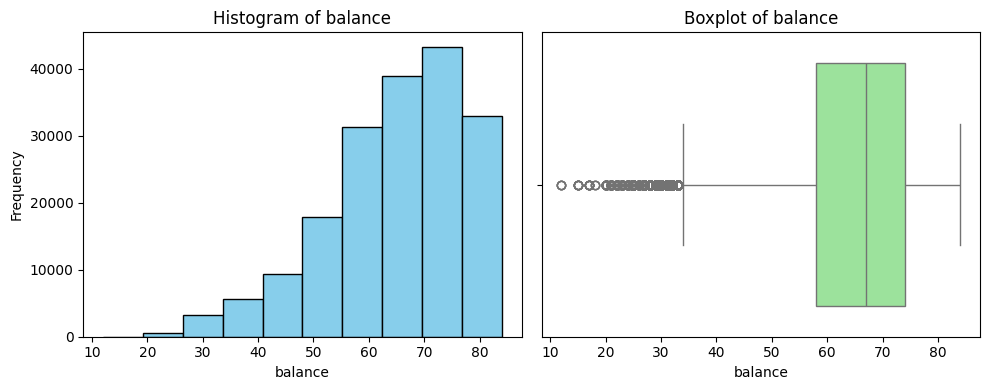

Frequency Table for shot_power:
     shot_power  Percentage  Frequency
0         68.0    0.036693     6720.0
1         72.0    0.035513     6504.0
2         74.0    0.032527     5957.0
3         70.0    0.032434     5940.0
4         71.0    0.032374     5929.0
..         ...         ...        ...
81         8.0    0.000055       10.0
82         3.0    0.000044        8.0
83         5.0    0.000027        5.0
84         4.0    0.000011        2.0
85         2.0    0.000011        2.0

[86 rows x 3 columns] 



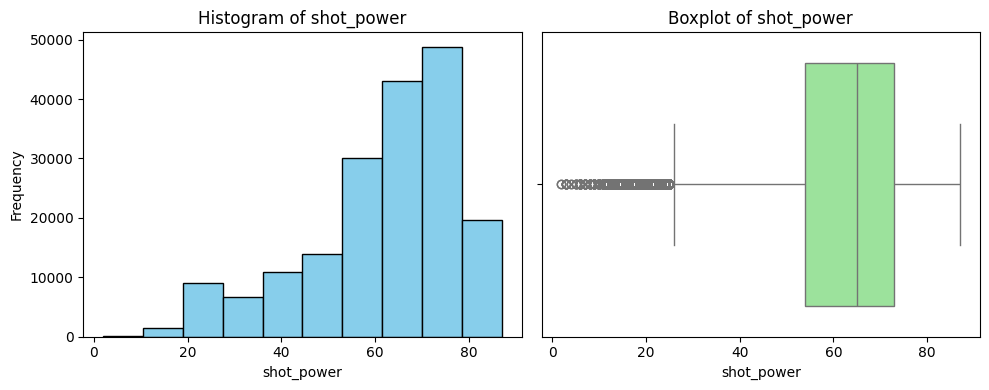

Frequency Table for jumping:
     jumping  Percentage  Frequency
0      72.0    0.047095     8625.0
1      70.0    0.045347     8305.0
2      71.0    0.041514     7603.0
3      73.0    0.037769     6917.0
4      74.0    0.037151     6804.0
..      ...         ...        ...
69     24.0    0.000060       11.0
70     19.0    0.000027        5.0
71     14.0    0.000016        3.0
72     20.0    0.000005        1.0
73     23.0    0.000005        1.0

[74 rows x 3 columns] 



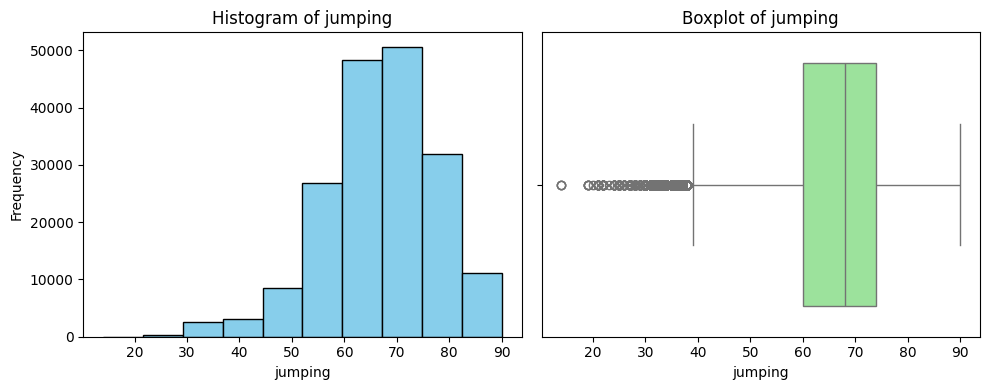

Frequency Table for stamina:
     stamina  Percentage  Frequency
0      85.0    0.057404    10513.0
1      68.0    0.042836     7845.0
2      72.0    0.040084     7341.0
3      70.0    0.039669     7265.0
4      74.0    0.038992     7141.0
..      ...         ...        ...
68     19.0    0.000098       18.0
69     14.0    0.000049        9.0
70     17.0    0.000016        3.0
71     15.0    0.000005        1.0
72     10.0    0.000005        1.0

[73 rows x 3 columns] 



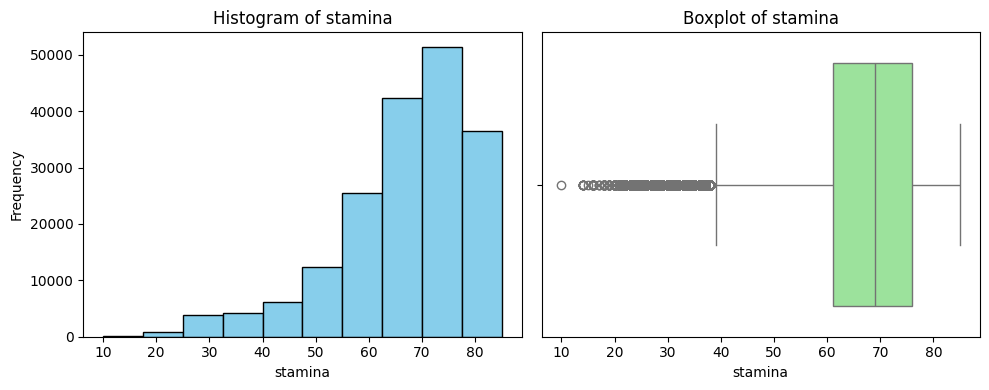

Frequency Table for strength:
     strength  Percentage  Frequency
0       68.0    0.040548     7426.0
1       74.0    0.039259     7190.0
2       72.0    0.037157     6805.0
3       70.0    0.036496     6684.0
4       75.0    0.036092     6610.0
..       ...         ...        ...
72      18.0    0.000038        7.0
73      12.0    0.000011        2.0
74      16.0    0.000005        1.0
75      13.0    0.000005        1.0
76      10.0    0.000005        1.0

[77 rows x 3 columns] 



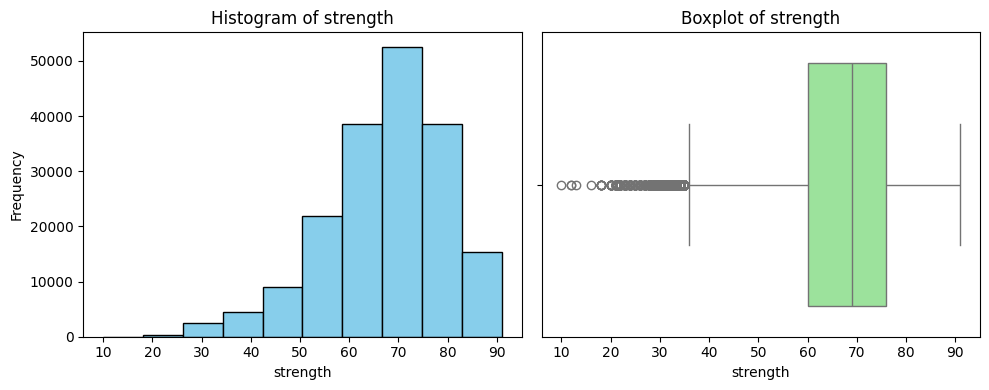

Frequency Table for long_shots:
     long_shots  Percentage  Frequency
0         25.0    0.036316     6651.0
1         64.0    0.029059     5322.0
2         68.0    0.027743     5081.0
3         60.0    0.027716     5076.0
4         66.0    0.027006     4946.0
..         ...         ...        ...
91        94.0    0.000049        9.0
92        95.0    0.000038        7.0
93         1.0    0.000033        6.0
94         2.0    0.000027        5.0
95        96.0    0.000005        1.0

[96 rows x 3 columns] 



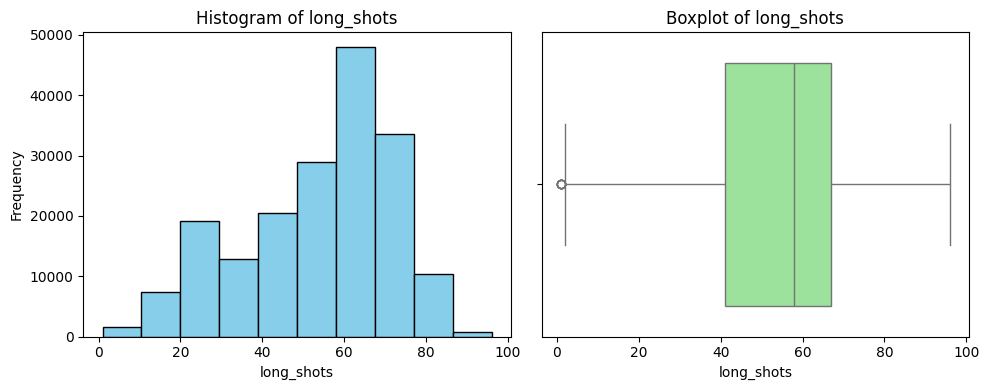

Frequency Table for aggression:
     aggression  Percentage  Frequency
0         83.0    0.055378    10142.0
1         68.0    0.031538     5776.0
2         74.0    0.030037     5501.0
3         72.0    0.028846     5283.0
4         75.0    0.028164     5158.0
..         ...         ...        ...
72        13.0    0.000289       53.0
73        10.0    0.000044        8.0
74         8.0    0.000038        7.0
75         6.0    0.000005        1.0
76         9.0    0.000005        1.0

[77 rows x 3 columns] 



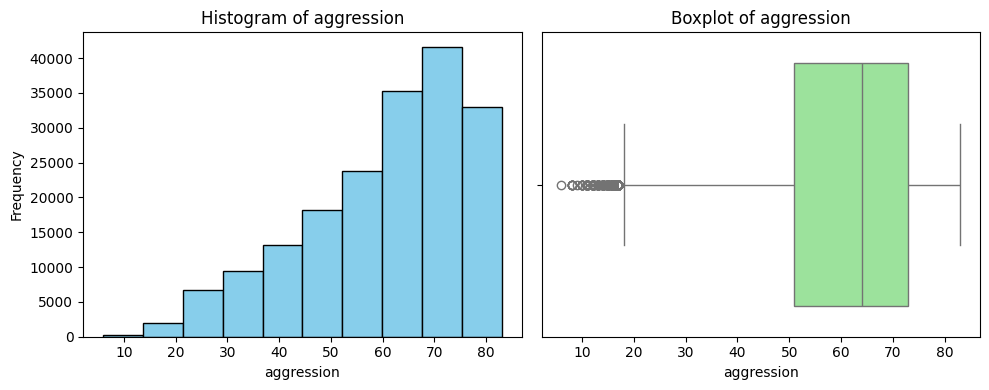

Frequency Table for interceptions:
     interceptions  Percentage  Frequency
0            25.0    0.042361     7758.0
1            64.0    0.027525     5041.0
2            68.0    0.027116     4966.0
3            65.0    0.025516     4673.0
4            72.0    0.024369     4463.0
..            ...         ...        ...
91            1.0    0.000022        4.0
92            4.0    0.000016        3.0
93           95.0    0.000011        2.0
94            2.0    0.000005        1.0
95            3.0    0.000005        1.0

[96 rows x 3 columns] 



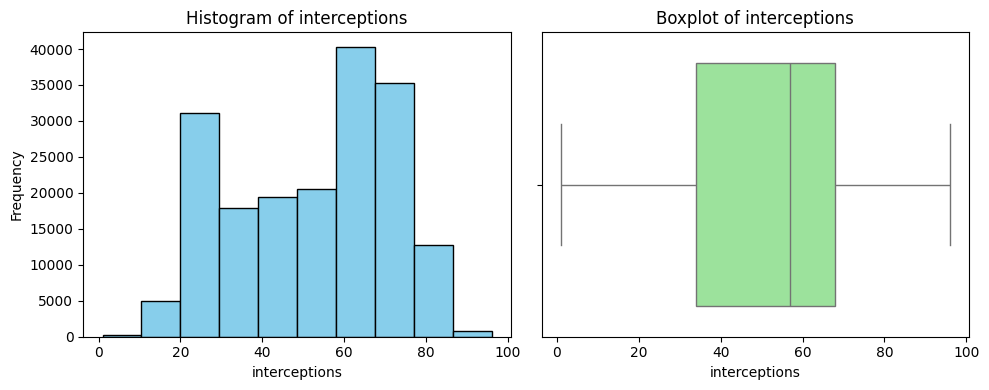

Frequency Table for positioning:
     positioning  Percentage  Frequency
0          25.0    0.034885     6389.0
1          68.0    0.032680     5985.0
2          64.0    0.029884     5473.0
3          66.0    0.029507     5404.0
4          67.0    0.029403     5385.0
..          ...         ...        ...
90          4.0    0.000087       16.0
91         95.0    0.000076       14.0
92          2.0    0.000049        9.0
93          3.0    0.000033        6.0
94         96.0    0.000011        2.0

[95 rows x 3 columns] 



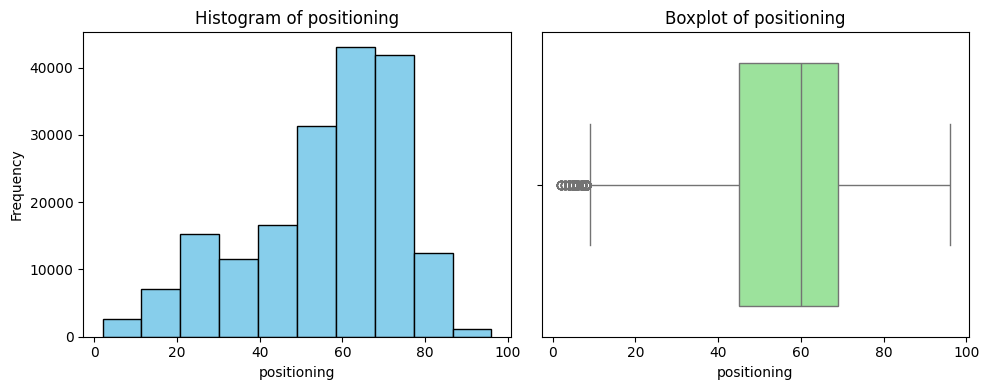

Frequency Table for vision:
     vision  Percentage  Frequency
0     79.0    0.052986     9704.0
1     68.0    0.032434     5940.0
2     64.0    0.030965     5671.0
3     65.0    0.030457     5578.0
4     58.0    0.029611     5423.0
..     ...         ...        ...
75     6.0    0.000142       26.0
76     4.0    0.000071       13.0
77     3.0    0.000055       10.0
78     2.0    0.000027        5.0
79     1.0    0.000016        3.0

[80 rows x 3 columns] 



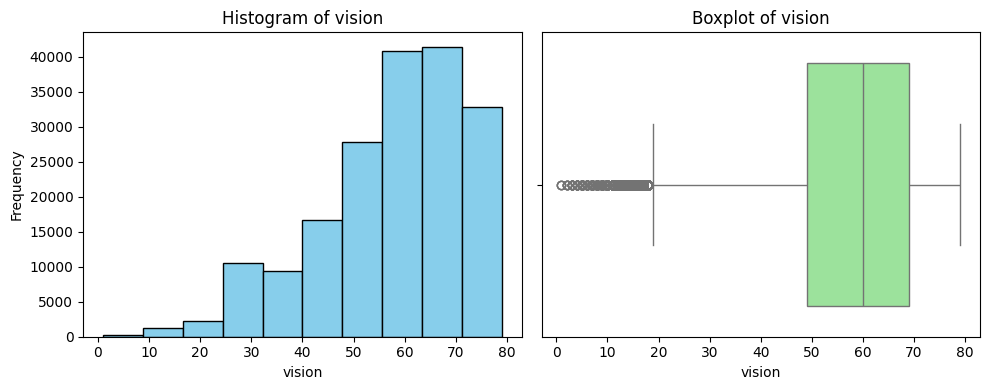

Frequency Table for penalties:
     penalties  Percentage  Frequency
0        77.0    0.057906    10605.0
1        58.0    0.028120     5150.0
2        64.0    0.027585     5052.0
3        60.0    0.027569     5049.0
4        62.0    0.026258     4809.0
..        ...         ...        ...
70        7.0    0.000087       16.0
71        5.0    0.000076       14.0
72        6.0    0.000071       13.0
73        3.0    0.000016        3.0
74        2.0    0.000005        1.0

[75 rows x 3 columns] 



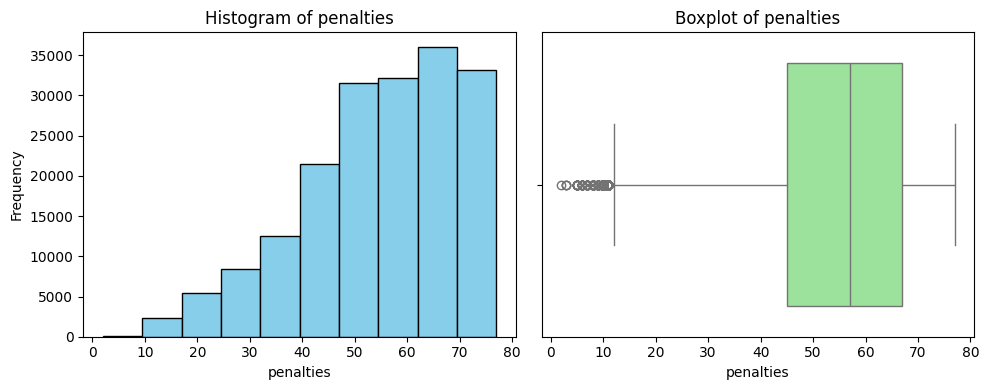

Frequency Table for marking:
     marking  Percentage  Frequency
0      25.0    0.082297    15072.0
1      68.0    0.025920     4747.0
2      64.0    0.024500     4487.0
3      22.0    0.024183     4429.0
4      65.0    0.024145     4422.0
..      ...         ...        ...
90     93.0    0.000044        8.0
91     92.0    0.000033        6.0
92      1.0    0.000022        4.0
93     94.0    0.000022        4.0
94     96.0    0.000005        1.0

[95 rows x 3 columns] 



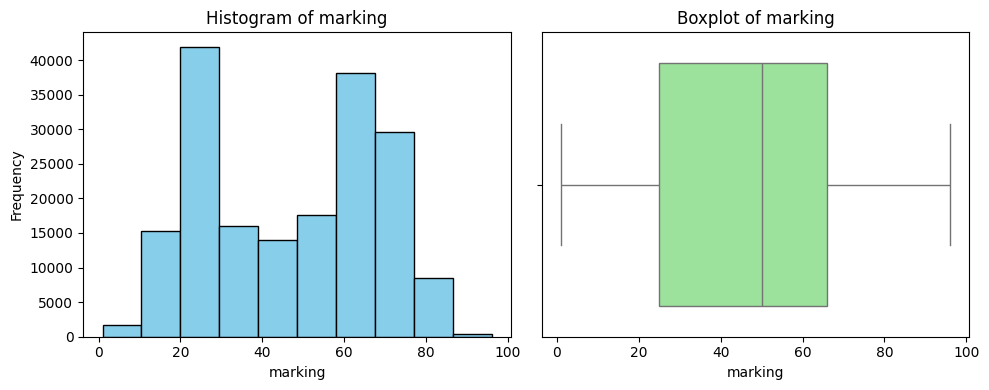

Frequency Table for standing_tackle:
     standing_tackle  Percentage  Frequency
0              25.0    0.060554    11090.0
1              68.0    0.026826     4913.0
2              66.0    0.026542     4861.0
3              65.0    0.025161     4608.0
4              67.0    0.025090     4595.0
..              ...         ...        ...
90             94.0    0.000066       12.0
91              3.0    0.000033        6.0
92             95.0    0.000022        4.0
93              2.0    0.000016        3.0
94              1.0    0.000005        1.0

[95 rows x 3 columns] 



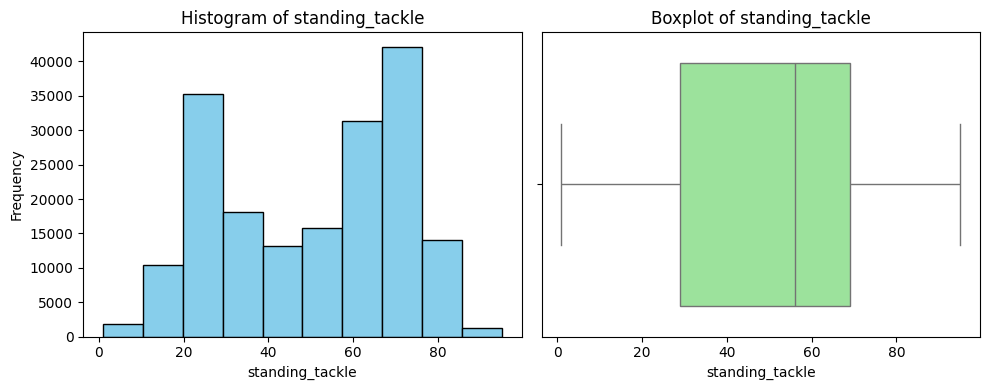

Frequency Table for sliding_tackle:
     sliding_tackle  Percentage  Frequency
0             25.0    0.072993    13368.0
1             68.0    0.025581     4685.0
2             65.0    0.024850     4551.0
3             64.0    0.024358     4461.0
4             66.0    0.024336     4457.0
..             ...         ...        ...
89             4.0    0.000126       23.0
90            90.0    0.000120       22.0
91            95.0    0.000060       11.0
92            93.0    0.000027        5.0
93             3.0    0.000016        3.0

[94 rows x 3 columns] 



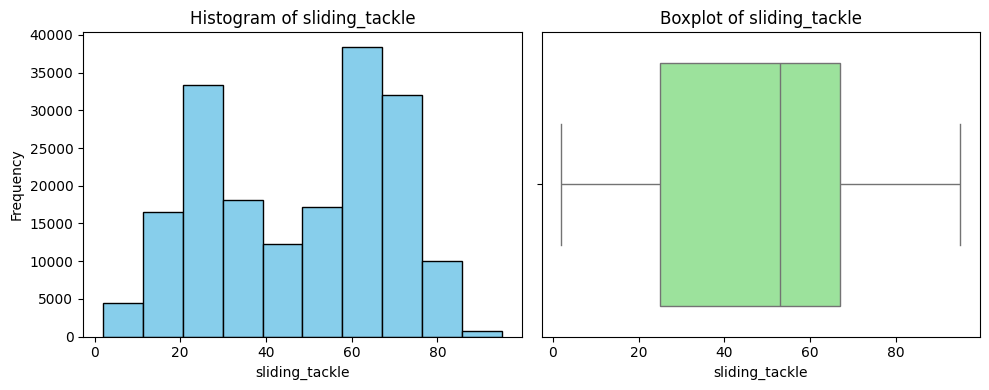

Frequency Table for gk_diving:
     gk_diving  Percentage  Frequency
0         8.0    0.092207    16887.0
1         9.0    0.086676    15874.0
2         7.0    0.084994    15566.0
3         6.0    0.084606    15495.0
4        11.0    0.083471    15287.0
..        ...         ...        ...
73       37.0    0.000016        3.0
74       40.0    0.000011        2.0
75       36.0    0.000011        2.0
76       29.0    0.000005        1.0
77       33.0    0.000005        1.0

[78 rows x 3 columns] 



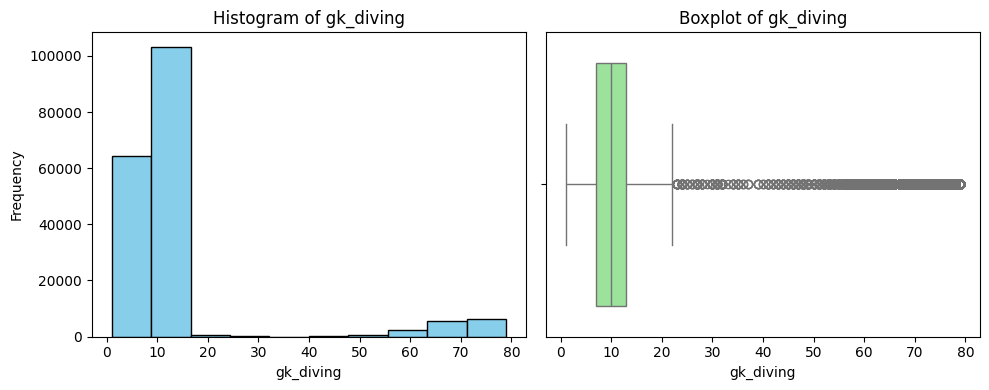

Frequency Table for gk_handling:
     gk_handling  Percentage  Frequency
0           7.0    0.078294    14339.0
1          11.0    0.077006    14103.0
2          14.0    0.074358    13618.0
3           8.0    0.074117    13574.0
4           9.0    0.073582    13476.0
..          ...         ...        ...
68         32.0    0.000022        4.0
69         35.0    0.000022        4.0
70         27.0    0.000016        3.0
71         40.0    0.000011        2.0
72         36.0    0.000005        1.0

[73 rows x 3 columns] 



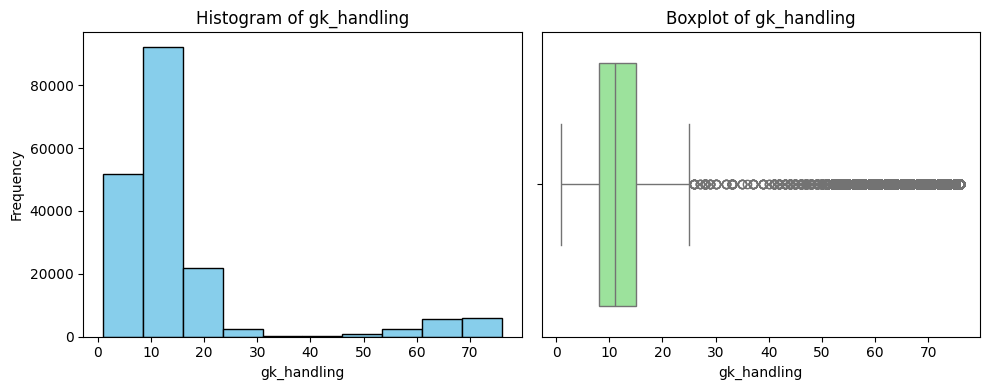

Frequency Table for gk_kicking:
     gk_kicking  Percentage  Frequency
0          7.0    0.075461    13820.0
1         12.0    0.073686    13495.0
2         10.0    0.073140    13395.0
3          9.0    0.072605    13297.0
4          8.0    0.072359    13252.0
..         ...         ...        ...
73        25.0    0.000273       50.0
74        20.0    0.000273       50.0
75        17.0    0.000109       20.0
76        18.0    0.000087       16.0
77        19.0    0.000049        9.0

[78 rows x 3 columns] 



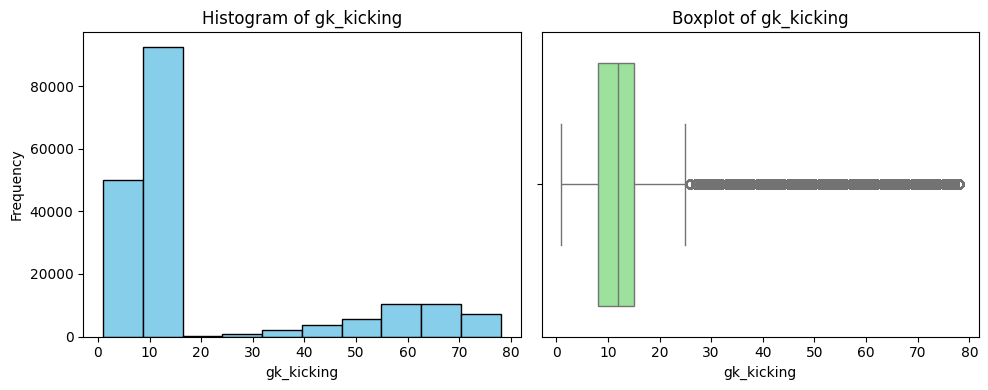

Frequency Table for gk_positioning:
     gk_positioning  Percentage  Frequency
0              9.0    0.078218    14325.0
1              7.0    0.077950    14276.0
2              8.0    0.077115    14123.0
3             14.0    0.074876    13713.0
4             10.0    0.073107    13389.0
..             ...         ...        ...
71            30.0    0.000027        5.0
72            37.0    0.000022        4.0
73            36.0    0.000011        2.0
74            35.0    0.000005        1.0
75            29.0    0.000005        1.0

[76 rows x 3 columns] 



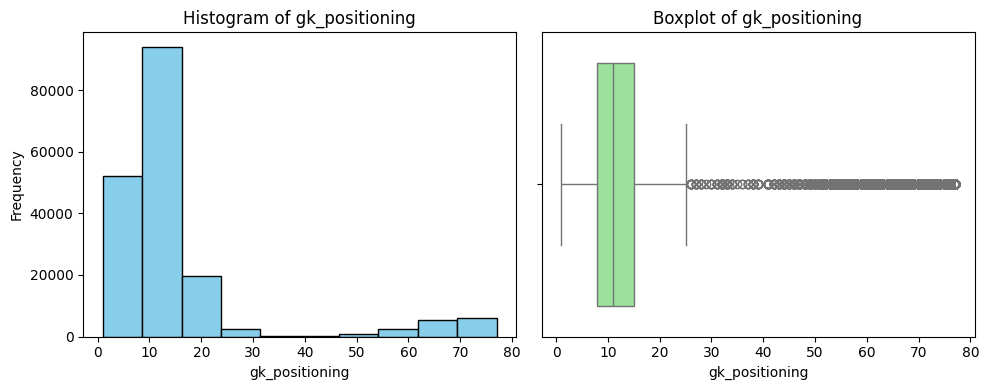

Frequency Table for gk_reflexes:
     gk_reflexes  Percentage  Frequency
0           8.0    0.077295    14156.0
1          10.0    0.076585    14026.0
2          14.0    0.075941    13908.0
3           7.0    0.075821    13886.0
4           9.0    0.074920    13721.0
..          ...         ...        ...
73         40.0    0.000022        4.0
74         30.0    0.000022        4.0
75         41.0    0.000016        3.0
76         38.0    0.000011        2.0
77         26.0    0.000011        2.0

[78 rows x 3 columns] 



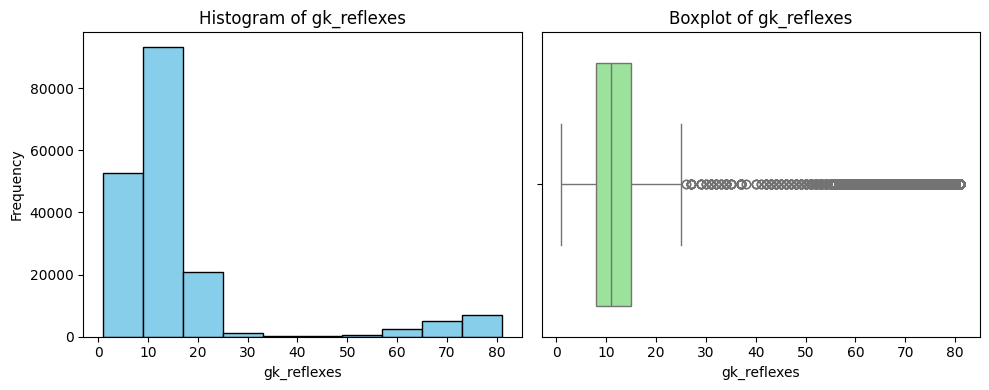

Frequency Table for forward_score:
       forward_score  Percentage  Frequency
0         69.000000    0.004592      841.0
1         70.000000    0.004406      807.0
2         71.000000    0.004062      744.0
3         70.500000    0.004035      739.0
4         71.600000    0.003937      721.0
...             ...         ...        ...
2095      37.000000    0.000005        1.0
2096      29.000000    0.000005        1.0
2097      42.294182    0.000005        1.0
2098      57.994182    0.000005        1.0
2099      62.494182    0.000005        1.0

[2100 rows x 3 columns] 



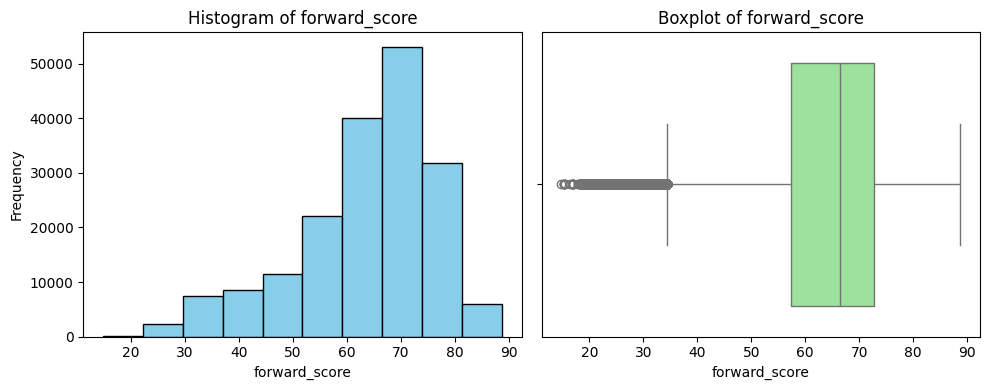

Frequency Table for midfielder_score:
       midfielder_score  Percentage  Frequency
0             80.30000    0.004920      901.0
1             66.00000    0.003910      716.0
2             66.50000    0.003795      695.0
3             65.50000    0.003751      687.0
4             65.00000    0.003718      681.0
...                ...         ...        ...
1989          36.47471    0.000005        1.0
1990          36.77471    0.000005        1.0
1991          68.07471    0.000005        1.0
1992          68.77471    0.000005        1.0
1993          68.77471    0.000005        1.0

[1994 rows x 3 columns] 



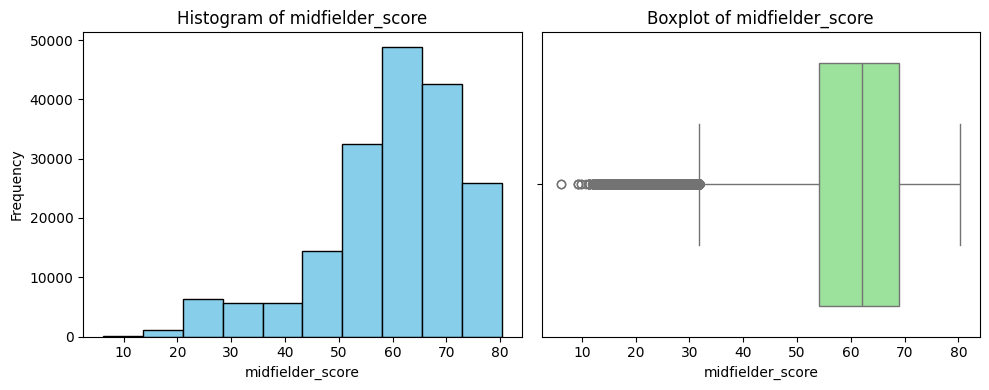

Frequency Table for defender_score:
       defender_score  Percentage  Frequency
0          69.000000    0.004401      806.0
1          68.000000    0.004390      804.0
2          71.000000    0.004177      765.0
3          66.500000    0.004095      750.0
4          70.000000    0.004084      748.0
...              ...         ...        ...
1844       75.490714    0.000005        1.0
1845       56.890714    0.000005        1.0
1846       62.990714    0.000005        1.0
1847       30.000000    0.000005        1.0
1848       27.400000    0.000005        1.0

[1849 rows x 3 columns] 



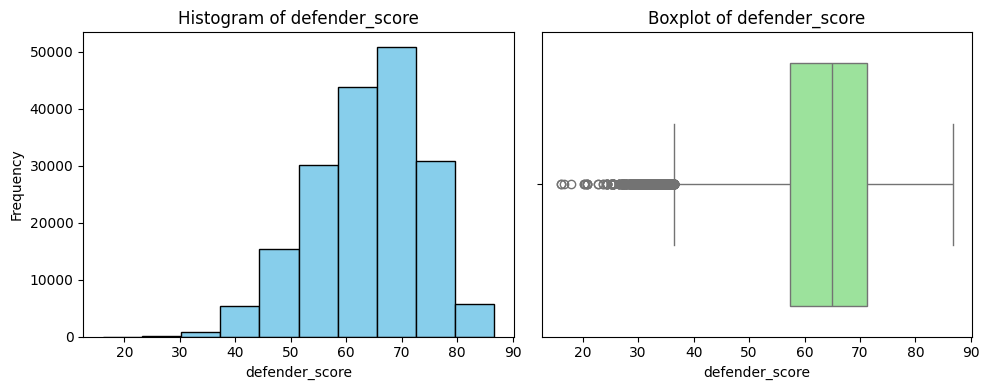

Frequency Table for goalkeeper_score:
       goalkeeper_score  Percentage  Frequency
0                 10.0    0.018767     3437.0
1                  9.8    0.017440     3194.0
2                 11.0    0.015780     2890.0
3                 10.5    0.014743     2700.0
4                  8.8    0.014661     2685.0
...                ...         ...        ...
1252              52.4    0.000005        1.0
1253              63.0    0.000005        1.0
1254              56.5    0.000005        1.0
1255              60.5    0.000005        1.0
1256              57.5    0.000005        1.0

[1257 rows x 3 columns] 



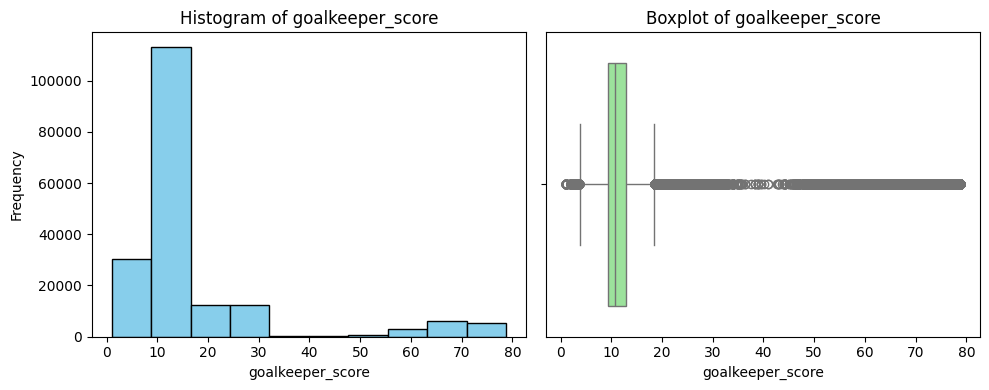

In [ ]:
def uni_num_analysis(data):
    # Automatically detect numerical variables
    num_vars = data.select_dtypes(include=['float64', 'int64']).columns
    frequency_tables = {}

    for var in num_vars:
        # Frequency table
        frequency_table = data[var].value_counts(normalize=True).reset_index()
        frequency_table.columns = [var, 'Percentage']
        frequency_table['Frequency'] = frequency_table['Percentage'] * len(data)
        frequency_tables[var] = frequency_table
        print(f"Frequency Table for {var}:\n", frequency_table, "\n")

        plt.figure(figsize=(10, 4))

        # Histogram
        plt.subplot(1, 2, 1)
        plt.hist(data[var], bins=10, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {var}')
        plt.xlabel(var)
        plt.ylabel('Frequency')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=data[var], color='lightgreen')
        plt.title(f'Boxplot of {var}')

        plt.tight_layout()
        plt.show()

    return frequency_tables

# ACTIVATE WHEN NEEDED, TAKES TIME
freq_tables = uni_num_analysis(player_attributes_df)

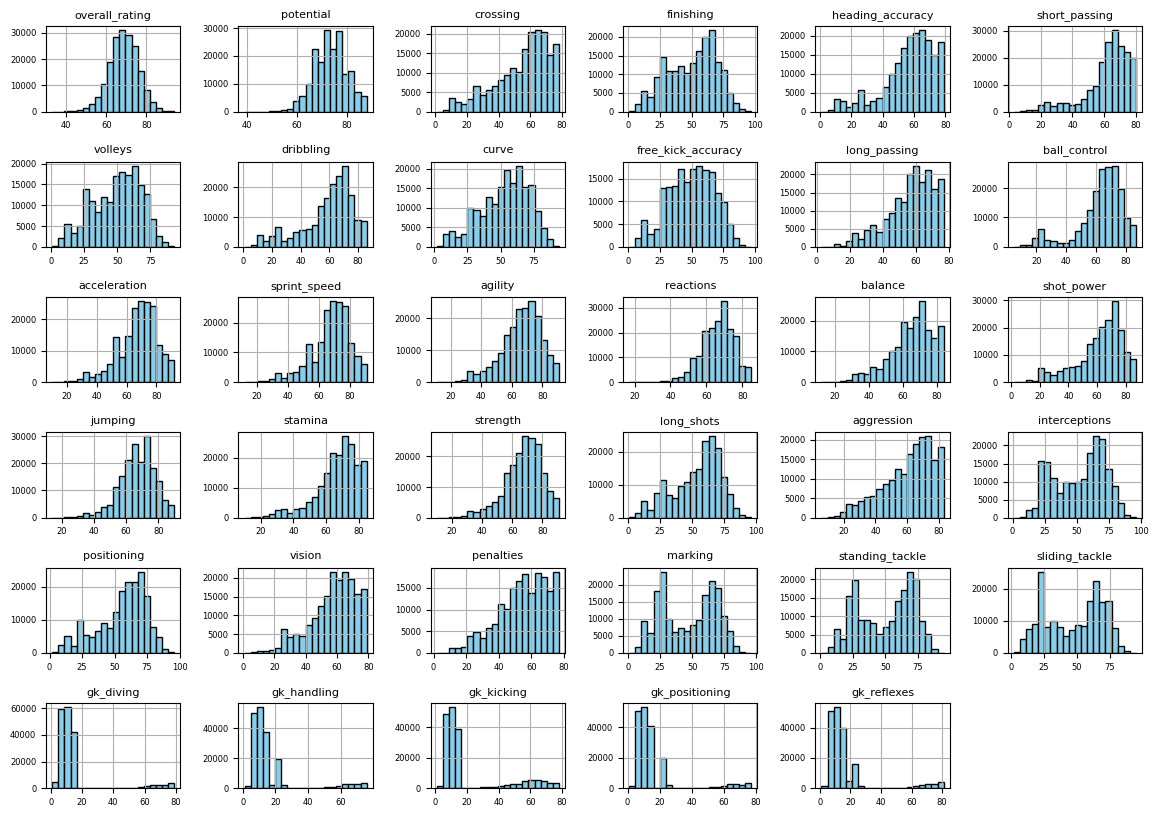

In [ ]:
# Assuming player_attributes_df is already loaded
# Define columns to exclude
excluded_columns = [
    'forward_score', 'midfielder_score', 'defender_score', 'goalkeeper_score',
    'preferred_foot', 'player_role', 'attacking_work_rate', 'defensive_work_rate'
]

# Drop the excluded columns
filtered_df = player_attributes_df.drop(columns=excluded_columns)

# Calculate the layout dimensions for the remaining variables
num_vars = filtered_df.shape[1]
n_cols = 6  # Fewer columns for more rows
n_rows = (num_vars + n_cols - 1) // n_cols  # Calculate the number of rows

# Create the matrix histogram with A4 dimensions
fig, axes = plt.subplots(n_rows, n_cols, figsize=(11.69, 8.27))  # A4 in inches (landscape orientation)
axes = axes.flatten()

# Plot each variable in the filtered DataFrame
for i, column in enumerate(filtered_df.columns):
    filtered_df[column].hist(ax=axes[i], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(column, fontsize=8)
    axes[i].tick_params(axis='both', labelsize=6)

# Turn off unused subplots
for i in range(num_vars, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### **4.3.3 Bivariate Data:**


In [ ]:
from scipy.stats import f_oneway, chi2_contingency

def bivariate_analysis(data):
    # Automatically detect numerical and categorical variables
    num_vars = data.select_dtypes(include=['float64', 'int64']).columns
    cat_vars = data.select_dtypes(include=['object', 'category']).columns

    # Mixed - One categorical and one quantitative variable
    for var1 in cat_vars:
        for var2 in num_vars:
            if (var1 != "education_cat") and (var2 != "education_num"):
                print(f"Analyzing {var1} and {var2} (Mixed Categorical & Quantitative)")

                # ANOVA
                groups = [data[var2][data[var1] == category] for category in data[var1].unique()]
                f_stat, p_val = f_oneway(*groups)
                print(f"ANOVA:\nF-statistic = {f_stat}, p-value = {p_val}\n")

                # Group means
                group_means = data.groupby(var1)[var2].mean()
                print(f"Group means:\n{group_means}\n")

                # Grouped boxplot
                plt.figure(figsize=(8, 6))
                sns.boxplot(x=data[var1], y=data[var2])
                plt.title(f'Grouped boxplot of {var2} by {var1}')
                plt.show()

    # Both variables are categorical
    for i in range(len(cat_vars)):
        for j in range(i + 1, len(cat_vars)):
            var1 = cat_vars[i]
            var2 = cat_vars[j]
            print(f"Analyzing {var1} and {var2} (Both Categorical)")

            # Contingency table
            contingency_table = pd.crosstab(data[var1], data[var2])
            print(f"Contingency table:\n{contingency_table}\n")

            # Chi-square test
            chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
            print(f"Chi-square Test:\nChi2 Stat = {chi2_stat}, p-value = {p_val}\n")

            # Cramer's V
            n = data.shape[0]
            cramer_v = np.sqrt(chi2_stat / (n * (min(contingency_table.shape) - 1)))
            print(f"Cramer's V = {cramer_v}\n")

            # Side-by-side bar chart
            contingency_table.plot(kind='bar', stacked=False, figsize=(8, 6), color=['skyblue', 'orange', 'beige', 'gray'])
            plt.title(f'Side-by-side bar chart of {var1} and {var2}')
            plt.show()

            # Stacked bar chart
            contingency_table.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'orange', 'beige', 'gray'])
            plt.title(f'Stacked bar chart of {var1} and {var2}')
            plt.show()

    # Both variables are quantitative - ONLY heatmap
    if len(num_vars) > 1:
        print("\nAnalyzing Quantitative Variables (Heatmap Only)...")

        # Correlation matrix
        corr_matrix = data[num_vars].corr()

        # Assuming 'player_attributes_df' is already loaded as a DataFrame
        # Filter numerical variables
        numerical_columns = player_attributes_df.select_dtypes(include=['number']).columns
        numerical_df = player_attributes_df[numerical_columns]

        # Compute correlation matrix for numerical variables
        correlation_matrix = numerical_df.corr()

        # Plot the heatmap
        plt.figure(figsize=(20, 15))
        sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap="coolwarm", square=True)
        plt.title("Correlation Matrix of Numerical Variables")
        plt.show()

# ACTIVATE WHEN NEEDED, TAKES TIME
bivariate_analysis(player_attributes_df)

Output hidden; open in https://colab.research.google.com to view.

## **4.4 Data Preparation for Modeling:**

**Encoding Categorical Features**


In [ ]:
# Create overall_rating model
X = player_attributes_df.drop(columns=["player_role", "overall_rating", "forward_score", "midfielder_score", "defender_score", "goalkeeper_score"], axis=1)
y_num = player_attributes_df["overall_rating"]
y_cat = player_attributes_df["player_role"]

In [ ]:
# Step 1: Manually map attacking_work_rate and defensive_work_rate as ordinal
rate_mapping = {'low': 0, 'medium': 1, 'high': 2}

# Apply the mapping to `attacking_work_rate` and `defensive_work_rate`
for col in ['attacking_work_rate', 'defensive_work_rate']:
    if col in X.columns:
        X[col] = X[col].map(rate_mapping)

# Step 2: One-hot encode the binary column (preferred_foot)
X = pd.get_dummies(X, columns=['preferred_foot'], prefix='preferred_foot', drop_first=True)

# Step 3: Ensure `preferred_foot_right` is binary (1/0)
X['preferred_foot_right'] = X['preferred_foot_right'].apply(lambda x: 1 if x else 0)

# Display the transformed DataFrame
print(X)

        potential  attacking_work_rate  defensive_work_rate  crossing  \
0            71.0                    1                    1      49.0   
1            71.0                    1                    1      49.0   
2            66.0                    1                    1      49.0   
3            65.0                    1                    1      48.0   
4            65.0                    1                    1      48.0   
...           ...                  ...                  ...       ...   
183973       85.0                    1                    0      78.0   
183974       80.0                    1                    0      74.0   
183975       80.0                    1                    0      74.0   
183976       81.0                    1                    0      74.0   
183977       81.0                    1                    0      74.0   

        finishing  heading_accuracy  short_passing  volleys  dribbling  curve  \
0            44.0              71.0       

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Standardize all columns
scaler = StandardScaler()
X_standardized = pd.DataFrame(
    scaler.fit_transform(X),
    columns=X.columns,
    index=X.index
)

# Replace the original X with standardized values
X = X_standardized

# Check the result
print(X.head())

   potential  attacking_work_rate  defensive_work_rate  crossing  finishing  \
0  -0.373005            -0.377383             -0.09476 -0.348562  -0.311003   
1  -0.373005            -0.377383             -0.09476 -0.348562  -0.311003   
2  -1.136075            -0.377383             -0.09476 -0.348562  -0.311003   
3  -1.288689            -0.377383             -0.09476 -0.407406  -0.363528   
4  -1.288689            -0.377383             -0.09476 -0.407406  -0.363528   

   heading_accuracy  short_passing   volleys  dribbling     curve  ...  \
0          0.863547      -0.089804 -0.301079  -0.460371 -0.438591  ...   
1          0.863547      -0.089804 -0.301079  -0.460371 -0.438591  ...   
2          0.863547      -0.089804 -0.301079  -0.460371 -0.438591  ...   
3          0.801645      -0.161576 -0.356137  -0.516855 -0.493652  ...   
4          0.801645      -0.161576 -0.356137  -0.516855 -0.493652  ...   

   penalties   marking  standing_tackle  sliding_tackle  gk_diving  \
0  -0.4467

# **5. Machine Learning**

## **5.1 Unsupervised Learning:**

### **5.1.1 Principal Component Analysis:**

train a PCA model on the numerical features of our dataset

In [ ]:
# Install the needed package
try:
  from fanalysis.pca import PCA;
except:
  !pip install fanalysis
  from fanalysis.pca import PCA;

In [ ]:
# instantiate acp object form PCA class
acp = PCA(std_unit = True, row_labels = X.index, col_labels = X.columns)

# run PCA on X observed data
acp.fit(X.values)

PCA(col_labels=Index(['potential', 'attacking_work_rate', 'defensive_work_rate', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
       'preferred_foot_right'],
      dtype='object'),
    row_labels=Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9,
       ...
       183968, 183969, 183970, 183971, 183972, 183973, 183974, 183975, 183976,
       183977],
      dtype='int64', length=183142))

Let's check if the data has the prerequisites for PCA

In [ ]:
# Applying Barlett's test of Sphericity
# import statistical package from scipy
import scipy.stats as stats

#number of obs
n = X.shape[0]

#number of variables
p = X.shape[1]

# Bartlett's statistic
C = -(n-1-(2*p+5)/6) * np.sum(np.log(acp.eig_[0]))
print(f"Barlett's statistics: {C:.3f}")

# degree of freedom
ddl = p*(p-1)/2

# p-value
print(f"p-value: {1-stats.chi2.cdf(C,df=ddl):.3f}")

Barlett's statistics: 8358759.179
p-value: 0.000


Since the p-value is essentially zero, this indicates significant differences in variances. Thus, the data does not meet the assumption of equal variances.

In [ ]:
try:
  from factor_analyzer.factor_analyzer import calculate_kmo;
except:
  !pip install factor_analyzer
  from factor_analyzer.factor_analyzer import calculate_kmo;

In [ ]:
# Conduct the KMO test
kmo_all, kmo_model = calculate_kmo(X);

print("KMO Model Score: ", kmo_model)

KMO Model Score:  0.9619372406159258


/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


KMO Score = 0.9, Data is highly suitable for factor analysis or PCA.

In [ ]:
# print eigenvalues (the lambdas) - output includes proportion of variance explained and cumulated values thereof
print(acp.eig_)

[[1.56934689e+01 5.75217345e+00 2.59260699e+00 1.94295765e+00
  1.57008174e+00 1.00514864e+00 8.94986003e-01 8.26891307e-01
  7.43325322e-01 6.75824150e-01 5.19551615e-01 4.33943572e-01
  4.04252859e-01 3.67703789e-01 3.20823716e-01 3.01995945e-01
  2.95271411e-01 2.86554639e-01 2.39445624e-01 2.33765734e-01
  2.15057257e-01 1.88020160e-01 1.79228904e-01 1.74298042e-01
  1.66381497e-01 1.53698677e-01 1.34219261e-01 1.28409256e-01
  1.05451381e-01 9.33858382e-02 8.45597889e-02 6.32010882e-02
  5.72518602e-02 4.94364134e-02 4.08033419e-02 3.37730856e-02
  3.20510865e-02]
 [4.24147808e+01 1.55464147e+01 7.00704593e+00 5.25123690e+00
  4.24346415e+00 2.71661794e+00 2.41888109e+00 2.23484137e+00
  2.00898736e+00 1.82655176e+00 1.40419355e+00 1.17282047e+00
  1.09257529e+00 9.93794023e-01 8.67091126e-01 8.16205257e-01
  7.98030840e-01 7.74471996e-01 6.47150335e-01 6.31799280e-01
  5.81235831e-01 5.08162595e-01 4.84402442e-01 4.71075790e-01
  4.49679723e-01 4.15401830e-01 3.62754759e-01 3.470

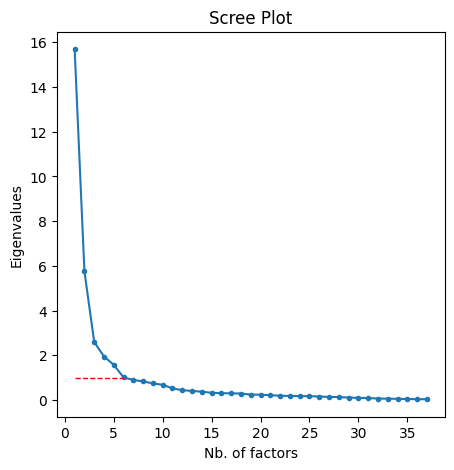

In [ ]:
# print scree plot

# first the main plot
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1,p+1),acp.eig_[0],".-")
ax.set_xlabel("Nb. of factors")
ax.set_ylabel("Eigenvalues")
plt.title("Scree Plot")

# add Kaiser's threshold line
ax.plot([1,6],[1,1],"r--",linewidth=1)

plt.show()

The elbow is visible at 3 factors, suggesting that a reduced number of 2 factors may be sufficient. However, applying the lambda = 1 rule indicates that 6 factors should be chosen.

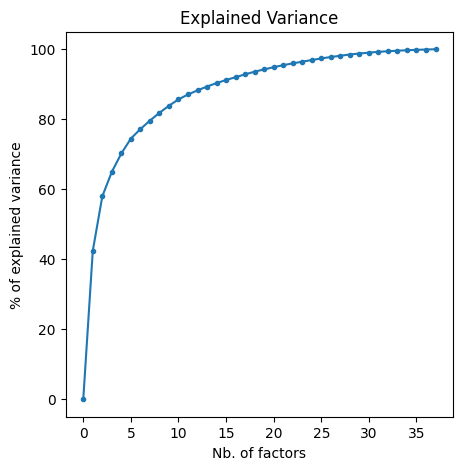

In [ ]:
# print explained variance plot

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(0,p+1),np.append(0,acp.eig_[2]),".-")
ax.set_xlabel("Nb. of factors")
ax.set_ylabel("% of explained variance")
plt.title("Explained Variance")

plt.show()

The cumulative explained variance shows that with 2 factors, only 60% of the variance is explained, while with 5 factors, we can explain 80%. Adding further factors results in a steep increase in explained variance.

In [ ]:
# Computing Karlis-Saporta-Spinaki threshold
# import math package
import math

# Karlis-Saporta-Spinaki cutpoint
kss = 1+2*math.sqrt((p-1)/(n-1))
print(f"Karlis-Saporta-Spinaki threshold: {kss:.3f}")

Karlis-Saporta-Spinaki threshold: 1.028


The Karlis-Saporta-Spinaki threshold of 1.027 further supports the choice of selecting 5 to 6 factors.

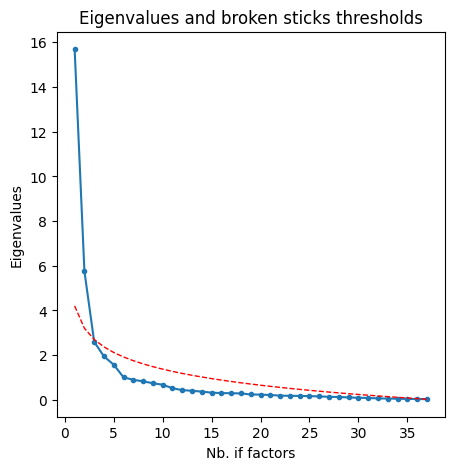

In [ ]:
# Broken sticks method
# threshold for the broken sticks
b = np.flip(np.cumsum(1/np.arange(p,0,-1)))

# plot eigenvalues
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1,p+1),acp.eig_[0],".-")
ax.set_xlabel("Nb. if factors")
ax.set_ylabel("Eigenvalues")
plt.title("Eigenvalues and broken sticks thresholds")

# add broken sticks thresholds
ax.plot(range(1,p+1),b,"r--",linewidth=1)

plt.show()

The broken sticks are leaning towards a 2-factor solution.

With our knowledge in football, we will proceed with choosing 4 factors, the number of roles that a footballer can have.

In [ ]:
# Correlation between variables and factors
print(pd.DataFrame(acp.col_coord_[:,:2],index=X.columns, columns=['F1','F2']))

                            F1        F2
potential             0.355311  0.087109
attacking_work_rate   0.288925  0.260072
defensive_work_rate  -0.002975 -0.455394
crossing              0.852824  0.043915
finishing             0.734800  0.490403
heading_accuracy      0.610404 -0.436378
short_passing         0.900210 -0.126361
volleys               0.771877  0.393483
dribbling             0.898716  0.267151
curve                 0.827326  0.242431
free_kick_accuracy    0.768332  0.176633
long_passing          0.707357 -0.243511
ball_control          0.947091  0.059771
acceleration          0.679842  0.291702
sprint_speed          0.671849  0.225531
agility               0.652399  0.407280
reactions             0.450254  0.004195
balance               0.574957  0.206378
shot_power            0.826472  0.095659
jumping               0.123063 -0.217735
stamina               0.699559 -0.279628
strength              0.059949 -0.516921
long_shots            0.838889  0.256202
aggression      

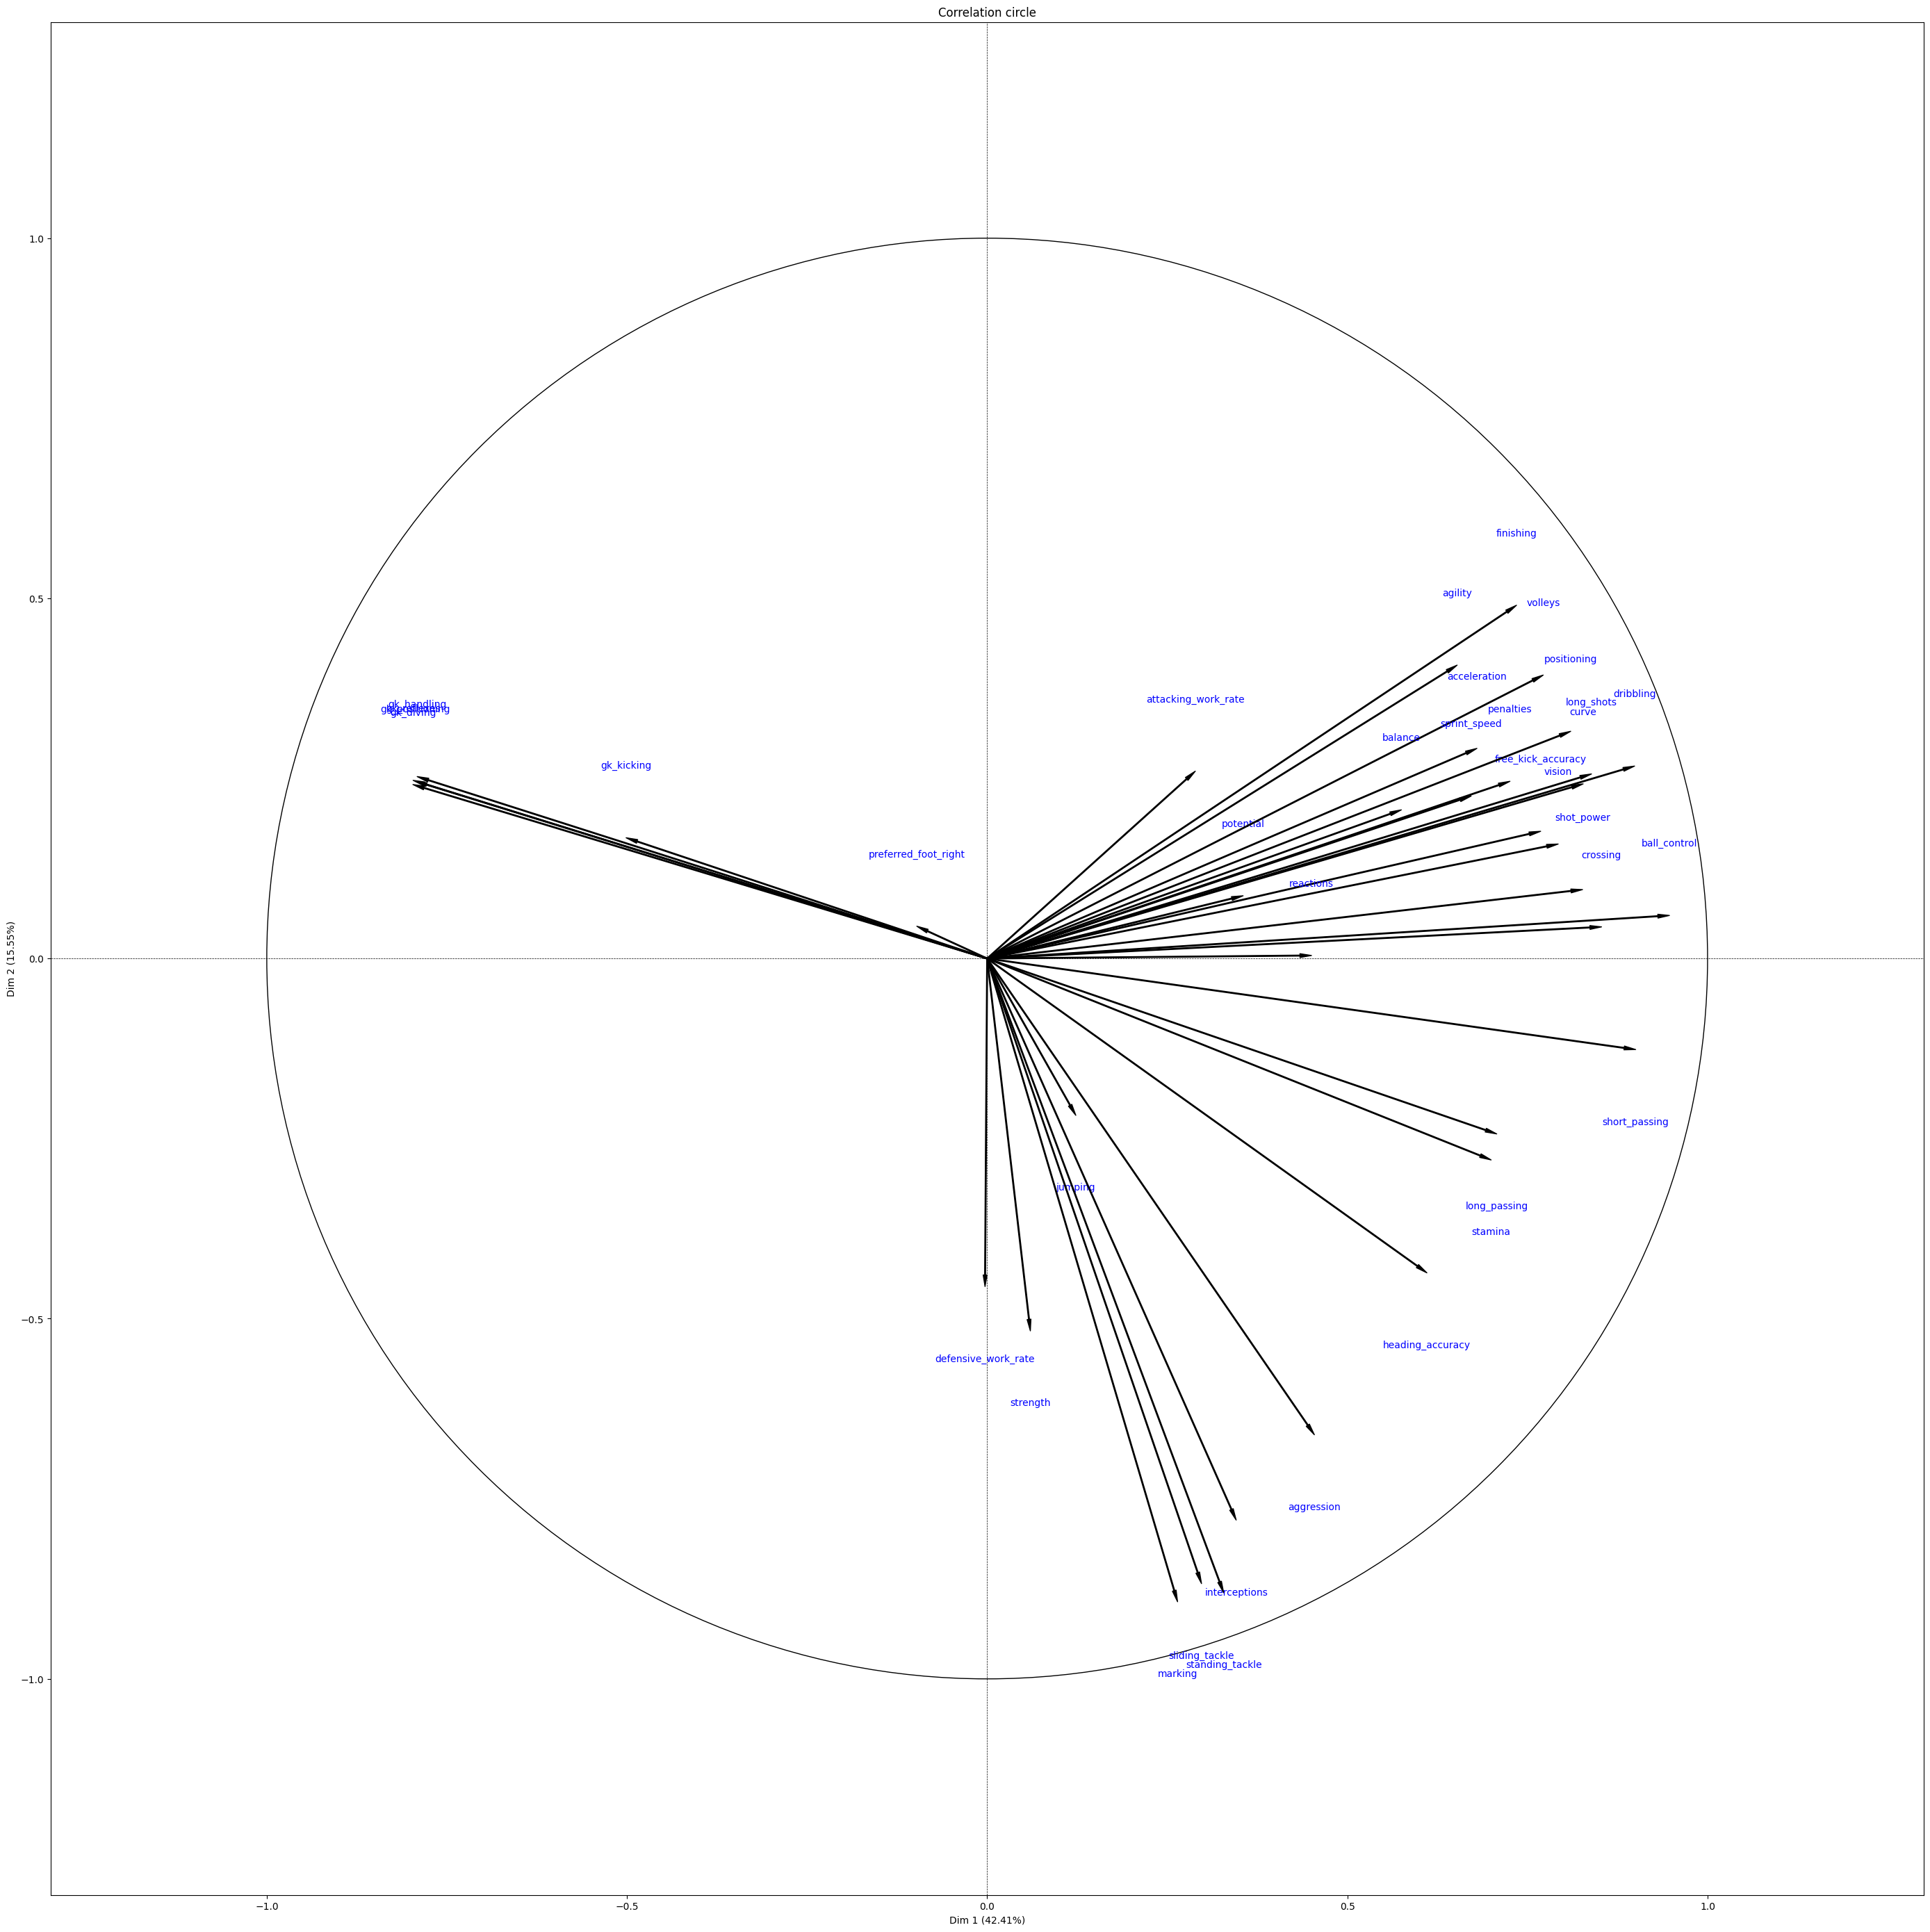

<Figure size 640x480 with 0 Axes>

In [ ]:
# Correlations circle
acp.correlation_circle(num_x_axis=1,num_y_axis=2, figsize=(35,35))
plt.savefig("corr_circle")

The correlation circle can be divided into four clusters: the top right quadrant, which includes forwards and attacking midfielders characterized by finishing, agility, dribbling, curve, and free kick accuracy; the bottom right quadrant, representing midfielders with strong passing, ball control, and vision; the bottom left quadrant, encompassing defenders with robust tackling, marking, and interception skills; and the top left quadrant, featuring goalkeepers with specialized skills like diving and handling.

In [ ]:
# Contributions of each variable on the two first factors (in %)
print(pd.DataFrame(acp.col_contrib_[:,:2],index=X.columns, columns=['F1','F2']))

                            F1         F2
potential             0.804449   0.131914
attacking_work_rate   0.531928   1.175860
defensive_work_rate   0.000056   3.605316
crossing              4.634472   0.033527
finishing             3.440482   4.180947
heading_accuracy      2.374194   3.310496
short_passing         5.163786   0.277585
volleys               3.796444   2.691660
dribbling             5.146663   1.240740
curve                 4.361480   1.021752
free_kick_accuracy    3.761657   0.542393
long_passing          3.188298   1.030874
ball_control          5.715632   0.062107
acceleration          2.945083   1.479263
sprint_speed          2.876237   0.884258
agility               2.712114   2.883729
reactions             1.291804   0.000306
balance               2.106452   0.740450
shot_power            4.352483   0.159082
jumping               0.096501   0.824187
stamina               3.118388   1.359347
strength              0.022901   4.645322
long_shots            4.484250   1

Finally, we will add the components as a feature, so that we can use it for future analysis.

In [ ]:
# Instantiate PCA with 4 components
acp = PCA(n_components = 4, std_unit = True, row_labels = X, col_labels = X)

# Fit the PCA model to the training data
acp.fit(X.values)

# Get component scores of PCA: scores_pca
scores_pca = acp.transform(X)

scores_pca

,0,1,2,3
0,-1.032992,-2.627828,1.733574,-0.302500
1,-1.032992,-2.627828,1.733574,-0.302500
2,-1.300976,-1.980507,2.322821,-0.415931
3,-1.499191,-1.869128,2.597549,-0.390381
4,-1.499191,-1.869128,2.597549,-0.390381
...,...,...,...,...
183973,4.279299,3.113836,-3.388448,-1.443610
183974,3.427298,2.968397,-2.247415,-1.184674
183975,3.421992,2.810337,-2.289339,-1.157588
183976,2.932982,2.714762,-1.903044,-0.959744


In [ ]:
# Create the contributions DataFrame
contributions = pd.DataFrame(acp.col_contrib_[:, :4], index=X.columns, columns=['F1', 'F2', 'F3', 'F4'])

# Sorting and printing factor by factor
print("Contributions sorted by F1:")
print(contributions['F1'].sort_values(ascending=False))

print("\nContributions sorted by F2:")
print(contributions['F2'].sort_values(ascending=False))


print("\nContributions sorted by F3:")
print(contributions['F3'].sort_values(ascending=False))


print("\nContributions sorted by F4:")
print(contributions['F4'].sort_values(ascending=False))

Contributions sorted by F1:
ball_control            5.715632
short_passing           5.163786
dribbling               5.146663
crossing                4.634472
long_shots              4.484250
curve                   4.361480
shot_power              4.352483
positioning             4.180998
gk_diving               4.049465
gk_reflexes             4.046722
gk_positioning          4.014179
vision                  4.003743
gk_handling             3.989571
volleys                 3.796444
free_kick_accuracy      3.761657
finishing               3.440482
penalties               3.355908
long_passing            3.188298
stamina                 3.118388
acceleration            2.945083
sprint_speed            2.876237
agility                 2.712114
heading_accuracy        2.374194
balance                 2.106452
gk_kicking              1.600905
aggression              1.314617
reactions               1.291804
potential               0.804449
interceptions           0.761335
standing_tackle

1.   F1: Forward.
2.   F2: Defenders.
3.   F3: GoalKeepers.
4.   F4: Midfielders.

In [ ]:
# Concatenate the Games DataFrame to the newly create
X_PCA = pd.concat([X.reset_index(drop = True), pd.DataFrame(scores_pca).reset_index(drop = True)], axis=1)

# Rename the two PCA component scores for clarity
X_PCA.rename(columns={0 : 'Component_Forward', 1 : 'Component_Defender', 2 : 'Component_GoalKeeper', 3 : 'Component_Midfielder'}, inplace = True)

X_PCA.drop(columns = [])

X_PCA.head(3)

,potential,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot_right,Component_Forward,Component_Defender,Component_GoalKeeper,Component_Midfielder
0,-0.373005,-0.377383,-0.09476,-0.348562,-0.311003,0.863547,-0.089804,-0.301079,-0.460371,-0.438591,...,-0.518448,-0.31967,-0.513474,-0.507364,-0.49265,0.568502,-1.032992,-2.627828,1.733574,-0.302500
1,-0.373005,-0.377383,-0.09476,-0.348562,-0.311003,0.863547,-0.089804,-0.301079,-0.460371,-0.438591,...,-0.518448,-0.31967,-0.513474,-0.507364,-0.49265,0.568502,-1.032992,-2.627828,1.733574,-0.302500
2,-1.136075,-0.377383,-0.09476,-0.348562,-0.311003,0.863547,-0.089804,-0.301079,-0.460371,-0.438591,...,-0.518448,-0.31967,-0.513474,-0.507364,-0.49265,0.568502,-1.300976,-1.980507,2.322821,-0.415931


### **5.2 Unsupervised Learning:**

### 5.2.1. KMeans Cluster Analysis:

**KMeans Clustering using PCA outputs:**

In [ ]:
from sklearn.cluster import KMeans

distorsions_PCA = []
for k in range(1,11):
    km_PCA = KMeans(n_clusters=k,
           init = 'k-means++',
           n_init = 10,
           max_iter = 300,
           random_state = 0,
           tol = 1e-04)
    km_PCA.fit_predict(X_PCA[['Component_Forward', 'Component_Defender', 'Component_GoalKeeper', 'Component_Midfielder']])
    distorsions_PCA.append(km_PCA.inertia_)

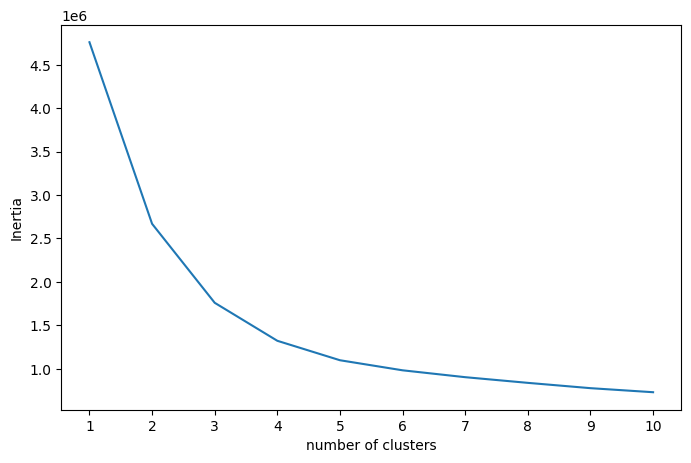

In [ ]:
x = list(range(1,11))
plt.figure(figsize=(8,5))
plt.plot(x, distorsions_PCA)
plt.xticks(x)
plt.xlabel("number of clusters")
plt.ylabel("Inertia");

In [ ]:
# Define the number of clusters
n_clusters = 4

# Fit KMeans with 4 clusters
km_PCA = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=0, tol=1e-04)

km_PCA.fit(X_PCA[['Component_Forward', 'Component_Defender', 'Component_GoalKeeper', 'Component_Midfielder']])

# Clusters centers
PCA_cluster_centers = km_PCA.cluster_centers_

In [ ]:
# Assuming your_data is a DataFrame with column names
PCA_cluster_centers_df = pd.DataFrame(PCA_cluster_centers, columns=["Component_Forward", "Component_Defender", "Component_GoalKeeper", "Component_Midfielder"])

# Add the cluster index for reference
PCA_cluster_centers_df.index = [f'Cluster {i+1}' for i in range(n_clusters)]

PCA_cluster_centers_df.T

,Cluster 1,Cluster 2,Cluster 3,Cluster 4
Component_Forward,2.638191,-10.937638,1.529184,-1.601484
Component_Defender,-1.247593,1.994050,2.309829,-2.438111
Component_GoalKeeper,-1.055580,-2.262929,0.593959,1.015490
Component_Midfielder,0.262071,0.119121,-0.285631,0.073241


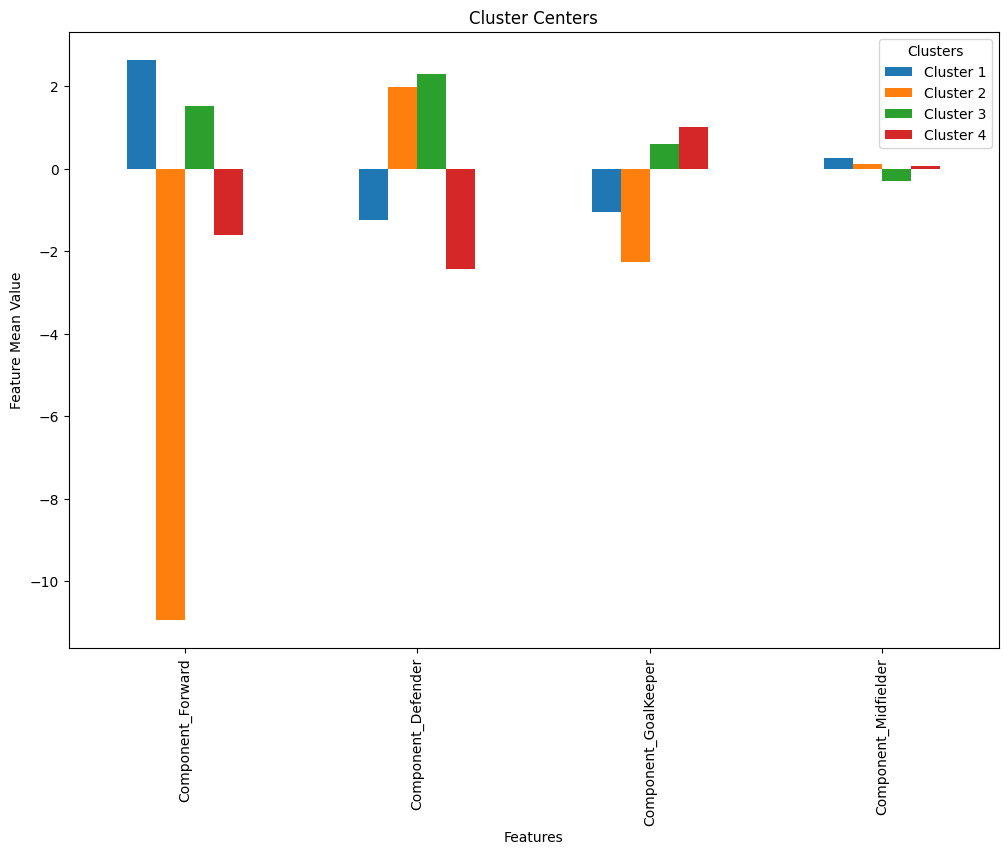

In [ ]:
PCA_cluster_centers_df.T.plot(kind='bar', figsize=(12, 8))
plt.title('Cluster Centers')
plt.ylabel('Feature Mean Value')
plt.xlabel('Features')
plt.legend(title='Clusters')
plt.show()

**Groups are not very distinct, clustering per PCA component does not give us any insights.**

**KMeans Clustering using the full dataset:**

In [ ]:
distorsions_ALL = []
for k in range(1,11):
    km_ALL = KMeans(n_clusters=k,
           init = 'k-means++',
           n_init = 10,
           max_iter = 300,
           random_state = 0,
           tol = 1e-04)
    km_ALL.fit_predict(X)
    distorsions_ALL.append(km_ALL.inertia_)

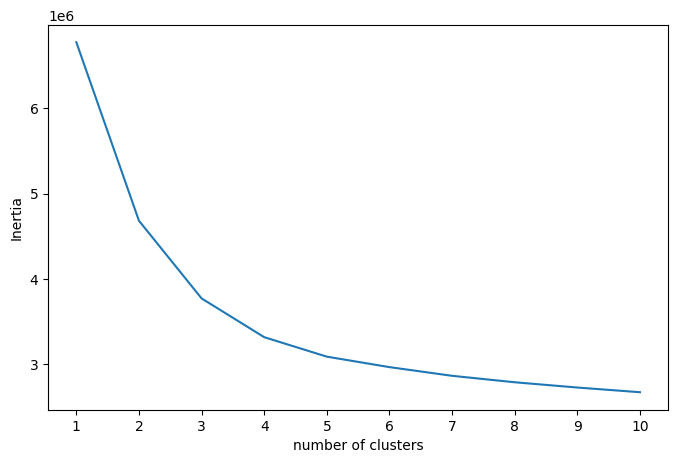

In [ ]:
x_all = list(range(1,11))
plt.figure(figsize=(8,5))
plt.plot(x_all, distorsions_ALL)
plt.xticks(x_all)
plt.xlabel("number of clusters")
plt.ylabel("Inertia");

In [ ]:
# Define the number of clusters
n_clusters = 4

# Fit KMeans with 4 clusters
km_ALL = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=0, tol=1e-04)

km_ALL.fit(X)

# Clusters centers
cluster_centers = km_ALL.cluster_centers_

In [ ]:
# Assuming your_data is a DataFrame with column names
cluster_centers_df = pd.DataFrame(cluster_centers, columns=X.columns)

# Add the cluster index for reference
cluster_centers_df.index = [f'Cluster {i+1}' for i in range(n_clusters)]

cluster_centers_df.T

,Cluster 1,Cluster 2,Cluster 3,Cluster 4
potential,0.399410,-0.514441,-0.144821,0.091014
attacking_work_rate,0.227641,-0.467527,-0.377383,0.249835
defensive_work_rate,0.379605,0.288238,-0.095165,-0.506224
crossing,0.676664,-0.444350,-2.124438,0.261853
finishing,0.215606,-0.842880,-1.665889,0.834898
heading_accuracy,0.332108,0.314041,-2.340064,0.024915
short_passing,0.712262,-0.272112,-2.454583,0.178633
volleys,0.353454,-0.779458,-1.751566,0.693662
dribbling,0.473779,-0.639090,-2.271589,0.608053
curve,0.550977,-0.643341,-1.924088,0.468682


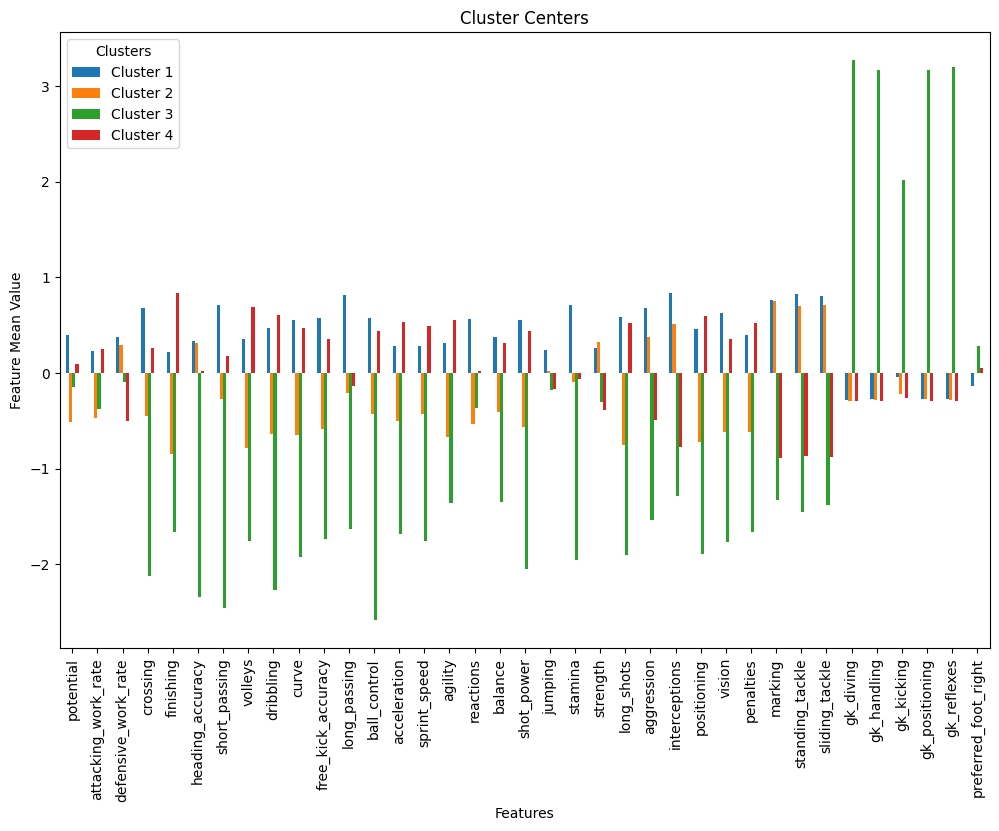

In [ ]:
cluster_centers_df.T.plot(kind='bar', figsize=(12, 8))
plt.title('Cluster Centers')
plt.ylabel('Feature Mean Value')
plt.xlabel('Features')
plt.legend(title='Clusters')
plt.show()

Cluster 1 (Midfielders): This cluster generally has mean values close to zero for most features, indicating balanced attributes.
Interpretation: Players in this cluster are likely midfielders, as they have a balanced set of skills that are important for both offensive and defensive play. Midfielders need to be versatile, contributing to both attacking and defending phases of the game.

Cluster 2 (Goalkeepers):This cluster shows significant positive mean values for goalkeeper-specific features (gk_diving, gk_handling, gk_kicking, gk_positioning, gk_reflexes).
Interpretation: Players in this cluster have specialized goalkeeping skills, indicating they are goalkeepers. The other features have mean values close to zero or slightly negative, suggesting that these players have average or lower skills in other areas, which is typical for goalkeepers who focus on specific goalkeeping attributes.

Cluster 3 (Defenders): This cluster has higher mean values for features related to defensive skills such as standing_tackle, sliding_tackle, marking, interceptions, and strength.
Interpretation: Players in this cluster are likely defenders, as they have stronger attributes in areas crucial for defensive play. These players are physically robust and skilled in tackling and intercepting the ball.

Cluster 4 (Attackers): This cluster shows higher mean values for features related to attacking skills such as finishing, shot_power, dribbling, acceleration, and sprint_speed.
Interpretation: Players in this cluster are likely attackers, as they have stronger attributes in areas crucial for scoring goals and creating offensive plays. These players are skilled in finishing, shooting, and dribbling.



## **5.2. Supervised Learning:**

### **5.2.1. Linear outcome:**

Our first target 'overall_rating' is continuous.

In [ ]:
X = X_PCA[["Component_Forward", "Component_Defender", "Component_GoalKeeper", "Component_Midfielder"]]

In [ ]:
#overall_rating first split
from sklearn.model_selection import train_test_split

X_num_train, X_num_finaltest, y_num_train, y_num_finaltrain = train_test_split(X, y_num, test_size = 0.1, random_state = 42)

In [ ]:
#overall_rating 2nd split
X_num_train, X_num_test, y_num_train, y_num_test = train_test_split(X_num_train, y_num_train, test_size = 0.2, random_state = 42)

**Multiple Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

# Initialize the model
model = LinearRegression()

# Use 10-Fold Cross-Validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = []
n, p = X_num_train.shape[0], X_num_train.shape[1]  # Number of samples and predictors

for train_index, val_index in kfold.split(X_num_train):
    # Use .iloc to index the DataFrame or Series by position
    X_train_cv, X_val_cv = X_num_train.iloc[train_index], X_num_train.iloc[val_index]
    y_train_cv, y_val_cv = y_num_train.iloc[train_index], y_num_train.iloc[val_index]

    # Train the model
    model.fit(X_train_cv, y_train_cv)

    # Validate the model
    y_val_pred = model.predict(X_val_cv)
    r2 = r2_score(y_val_cv, y_val_pred)
    adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
    rmse = np.sqrt(mean_squared_error(y_val_cv, y_val_pred))
    rmse_normalized = rmse / y_num_train.mean()
    cv_scores.append((adjusted_r2, rmse_normalized))

# Average Cross-Validation Results
avg_r2_adjusted = np.mean([score[0] for score in cv_scores])
avg_rmse_normalized = np.mean([score[1] for score in cv_scores])

# Step 3: Train on the Training Set and Evaluate on the Test Set
model.fit(X_num_train, y_num_train)

# Predict on Test Set
y_test_pred = model.predict(X_num_test)
r2_test = r2_score(y_num_test, y_test_pred)
adjusted_r2_test = 1 - (1 - r2_test) * ((len(y_num_test) - 1) / (len(y_num_test) - p - 1))
rmse_test = np.sqrt(mean_squared_error(y_num_test, y_test_pred))
rmse_normalized_test = rmse_test / y_num_test.mean()

# Step 4: Evaluate on the Final Test Set (X_num_finaltest)
y_finaltest_pred = model.predict(X_num_finaltest)
r2_finaltest = r2_score(y_num_finaltrain, y_finaltest_pred)
adjusted_r2_finaltest = 1 - (1 - r2_finaltest) * ((len(y_num_finaltrain) - 1) / (len(y_num_finaltrain) - p - 1))
rmse_finaltest = np.sqrt(mean_squared_error(y_num_finaltrain, y_finaltest_pred))
rmse_normalized_finaltest = rmse_finaltest / y_num_finaltrain.mean()

# Print Results
print(f"Cross-Validation (10-Fold) Average Adjusted R²: {avg_r2_adjusted:.4f}")
print(f"Cross-Validation (10-Fold) Average RMSE/y_mean: {avg_rmse_normalized:.4f}")
print(f"Test Set Adjusted R²: {adjusted_r2_test:.4f}")
print(f"Test Set RMSE/y_mean: {rmse_normalized_test:.4f}")
print(f"Final Test Set Adjusted R²: {adjusted_r2_finaltest:.4f}")
print(f"Final Test Set RMSE/y_mean: {rmse_normalized_finaltest:.4f}")

Cross-Validation (10-Fold) Average Adjusted R²: 0.6874
Cross-Validation (10-Fold) Average RMSE/y_mean: 0.0574
Test Set Adjusted R²: 0.6920
Test Set RMSE/y_mean: 0.0569
Final Test Set Adjusted R²: 0.6960
Final Test Set RMSE/y_mean: 0.0567


**Ridge Regression**

In [ ]:
# Define a function to calculate adjusted R²
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

In [ ]:
from sklearn.linear_model import Ridge

# Ridge Regression with hyperparameter tuning
ridge = Ridge()
ridge_param_grid = [{'alpha': alpha} for alpha in [0.01, 0.1, 1, 10, 100]]
best_params = None
best_cv_score = float('inf')  # To track the best RMSE during cross-validation

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

for params in ridge_param_grid:
    ridge.set_params(**params)
    cv_scores = []

    for train_index, val_index in kfold.split(X_num_train):
        # Use .iloc for indexing
        X_train_cv, X_val_cv = X_num_train.iloc[train_index], X_num_train.iloc[val_index]
        y_train_cv, y_val_cv = y_num_train.iloc[train_index], y_num_train.iloc[val_index]

        # Train and validate the Ridge model
        ridge.fit(X_train_cv, y_train_cv)
        y_val_pred = ridge.predict(X_val_cv)
        rmse = np.sqrt(mean_squared_error(y_val_cv, y_val_pred))
        cv_scores.append(rmse)

    # Average RMSE for this alpha
    mean_cv_rmse = np.mean(cv_scores)

    # Track the best alpha
    if mean_cv_rmse < best_cv_score:
        best_params = params
        best_cv_score = mean_cv_rmse

# Train the model with the best parameters on the entire training set
ridge.set_params(**best_params)
ridge.fit(X_num_train, y_num_train)

# Evaluate on test set
y_test_pred = ridge.predict(X_num_test)
r2_test = r2_score(y_num_test, y_test_pred)
adjusted_r2_test = adjusted_r2(r2_test, len(y_num_test), X_num_test.shape[1])
rmse_test = np.sqrt(mean_squared_error(y_num_test, y_test_pred))
rmse_normalized_test = rmse_test / y_num_test.mean()

# Evaluate on final test set
y_finaltest_pred = ridge.predict(X_num_finaltest)
r2_finaltest = r2_score(y_num_finaltrain, y_finaltest_pred)
adjusted_r2_finaltest = adjusted_r2(r2_finaltest, len(y_num_finaltrain), X_num_finaltest.shape[1])
rmse_finaltest = np.sqrt(mean_squared_error(y_num_finaltrain, y_finaltest_pred))
rmse_normalized_finaltest = rmse_finaltest / y_num_finaltrain.mean()

# Extract the best alpha from the best parameters
best_alpha = best_params['alpha']

# Output Results
print(f"Ridge Regression Best Parameters: {best_params}")
print(f"Cross-Validation Best RMSE: {best_cv_score:.4f}")
print(f"Test Set Adjusted R²: {adjusted_r2_test:.4f}")
print(f"Test Set RMSE/y_mean: {rmse_normalized_test:.4f}")
print(f"Final Test Set Adjusted R²: {adjusted_r2_finaltest:.4f}")
print(f"Final Test Set RMSE/y_mean: {rmse_normalized_finaltest:.4f}")

Ridge Regression Best Parameters: {'alpha': 1}
Cross-Validation Best RMSE: 3.9357
Test Set Adjusted R²: 0.6920
Test Set RMSE/y_mean: 0.0569
Final Test Set Adjusted R²: 0.6960
Final Test Set RMSE/y_mean: 0.0567


**Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso

# Step 1: Initialize the Lasso model and define hyperparameters
alphas = [0.01, 0.1, 1, 10, 100]  # Example hyperparameter grid for alpha
best_alpha = None
best_cv_score = float('inf')  # To track the best mean squared error

# Step 2: Hyperparameter Tuning with 10-Fold Cross-Validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha, max_iter=10000)
    cv_scores = []

    for train_index, val_index in kfold.split(X_num_train):
        # Use .iloc for indexing
        X_train_cv, X_val_cv = X_num_train.iloc[train_index], X_num_train.iloc[val_index]
        y_train_cv, y_val_cv = y_num_train.iloc[train_index], y_num_train.iloc[val_index]

        # Train the Lasso model
        lasso_model.fit(X_train_cv, y_train_cv)

        # Validate the model
        y_val_pred = lasso_model.predict(X_val_cv)
        rmse = np.sqrt(mean_squared_error(y_val_cv, y_val_pred))
        cv_scores.append(rmse)

    # Average RMSE for this alpha
    mean_cv_rmse = np.mean(cv_scores)

    # Track the best alpha
    if mean_cv_rmse < best_cv_score:
        best_alpha = alpha
        best_cv_score = mean_cv_rmse

# Step 3: Train the Optimized Model on the Full Training Set
optimized_lasso = Lasso(alpha=best_alpha, max_iter=10000)
optimized_lasso.fit(X_num_train, y_num_train)

# Step 4: Evaluate on the Test Set
y_test_pred = optimized_lasso.predict(X_num_test)
r2_test = r2_score(y_num_test, y_test_pred)
adjusted_r2_test = 1 - (1 - r2_test) * ((len(y_num_test) - 1) / (len(y_num_test) - X_num_test.shape[1] - 1))
rmse_test = np.sqrt(mean_squared_error(y_num_test, y_test_pred))
rmse_normalized_test = rmse_test / y_num_test.mean()

# Step 5: Evaluate on the Final Test Set
y_finaltest_pred = optimized_lasso.predict(X_num_finaltest)
r2_finaltest = r2_score(y_num_finaltrain, y_finaltest_pred)
adjusted_r2_finaltest = 1 - (1 - r2_finaltest) * ((len(y_num_finaltrain) - 1) / (len(y_num_finaltrain) - X_num_finaltest.shape[1] - 1))
rmse_finaltest = np.sqrt(mean_squared_error(y_num_finaltrain, y_finaltest_pred))
rmse_normalized_finaltest = rmse_finaltest / y_num_finaltrain.mean()

# Output Results
print(f"Lasso Regression Best Alpha: {best_alpha}")
print(f"Cross-Validation Best RMSE: {best_cv_score:.4f}")
print(f"Test Set Adjusted R²: {adjusted_r2_test:.4f}")
print(f"Test Set RMSE/y_mean: {rmse_normalized_test:.4f}")
print(f"Final Test Set Adjusted R²: {adjusted_r2_finaltest:.4f}")
print(f"Final Test Set RMSE/y_mean: {rmse_normalized_finaltest:.4f}")

Lasso Regression Best Alpha: 0.01
Cross-Validation Best RMSE: 3.9357
Test Set Adjusted R²: 0.6920
Test Set RMSE/y_mean: 0.0569
Final Test Set Adjusted R²: 0.6960
Final Test Set RMSE/y_mean: 0.0567


**KNN Regressor**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Step 1: Initialize hyperparameter grid for k (number of neighbors)
k_values = [3, 5, 10, 15, 20]  # Example values for k
best_k = None
best_cv_score = float('inf')  # To track the best RMSE during cross-validation

# Step 2: Hyperparameter Tuning with 10-Fold Cross-Validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    cv_scores = []

    for train_index, val_index in kfold.split(X_num_train):
        # Use .iloc for indexing
        X_train_cv, X_val_cv = X_num_train.iloc[train_index], X_num_train.iloc[val_index]
        y_train_cv, y_val_cv = y_num_train.iloc[train_index], y_num_train.iloc[val_index]

        # Train the k-NN model
        knn_model.fit(X_train_cv, y_train_cv)

        # Validate the model
        y_val_pred = knn_model.predict(X_val_cv)
        rmse = np.sqrt(mean_squared_error(y_val_cv, y_val_pred))
        cv_scores.append(rmse)

    # Average RMSE for this k
    mean_cv_rmse = np.mean(cv_scores)

    # Track the best k
    if mean_cv_rmse < best_cv_score:
        best_k = k
        best_cv_score = mean_cv_rmse

print(f"Best k for k-NN: {best_k}")

# Step 3: Train the Optimized k-NN Model on the Full Training Set
optimized_knn = KNeighborsRegressor(n_neighbors=best_k)
optimized_knn.fit(X_num_train, y_num_train)

# Step 4: Evaluate on the Test Set
y_test_pred = optimized_knn.predict(X_num_test)
r2_test = r2_score(y_num_test, y_test_pred)
adjusted_r2_test = 1 - (1 - r2_test) * ((len(y_num_test) - 1) / (len(y_num_test) - X_num_test.shape[1] - 1))
rmse_test = np.sqrt(mean_squared_error(y_num_test, y_test_pred))
rmse_normalized_test = rmse_test / y_num_test.mean()

# Step 5: Evaluate on the Final Test Set
y_finaltest_pred = optimized_knn.predict(X_num_finaltest)
r2_finaltest = r2_score(y_num_finaltrain, y_finaltest_pred)
adjusted_r2_finaltest = 1 - (1 - r2_finaltest) * ((len(y_num_finaltrain) - 1) / (len(y_num_finaltrain) - X_num_finaltest.shape[1] - 1))
rmse_finaltest = np.sqrt(mean_squared_error(y_num_finaltrain, y_finaltest_pred))
rmse_normalized_finaltest = rmse_finaltest / y_num_finaltrain.mean()

# Output Results
print(f"Cross-Validation Best RMSE: {best_cv_score:.4f}")
print(f"Test Set Adjusted R²: {adjusted_r2_test:.4f}")
print(f"Test Set RMSE/y_mean: {rmse_normalized_test:.4f}")
print(f"Final Test Set Adjusted R²: {adjusted_r2_finaltest:.4f}")
print(f"Final Test Set RMSE/y_mean: {rmse_normalized_finaltest:.4f}")

Best k for k-NN: 3
Cross-Validation Best RMSE: 1.8537
Test Set Adjusted R²: 0.9336
Test Set RMSE/y_mean: 0.0264
Final Test Set Adjusted R²: 0.9357
Final Test Set RMSE/y_mean: 0.0261


**KNN Regressor Feature Importance**


Permutation-Based Feature Importance for k-NN Regressor:
                Feature  Importance
0     Component_Forward    0.504213
2  Component_GoalKeeper    0.251259
1    Component_Defender    0.202609
3  Component_Midfielder    0.041919


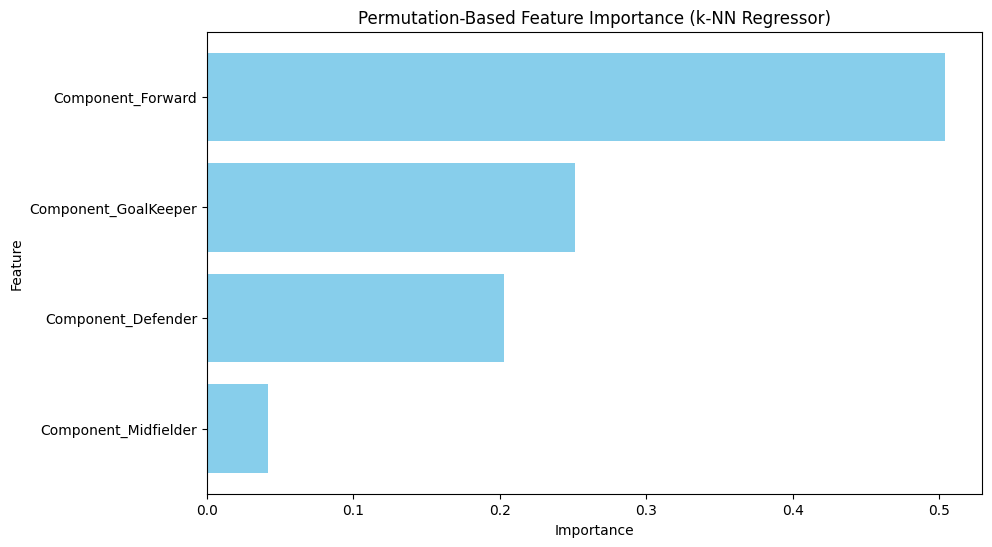

In [ ]:
# Baseline Performance on the Test Set
baseline_r2 = r2_score(y_num_test, y_test_pred)  # R² on the unshuffled test set
shuffle_importance = {}

# Loop through each feature
for feature in X_num_test.columns:
    # Create a copy of the test set
    X_test_shuffled = X_num_test.copy()

    # Shuffle the selected feature
    X_test_shuffled[feature] = np.random.permutation(X_test_shuffled[feature])

    # Predict with the shuffled feature
    y_test_shuffled_pred = optimized_knn.predict(X_test_shuffled)

    # Calculate the drop in R²
    shuffled_r2 = r2_score(y_num_test, y_test_shuffled_pred)
    r2_drop = baseline_r2 - shuffled_r2  # Drop in R² indicates importance

    # Store the importance for the current feature
    shuffle_importance[feature] = r2_drop

# Normalize the importance values to sum to 1
importance_df = pd.DataFrame({
    "Feature": list(shuffle_importance.keys()),
    "Importance": list(shuffle_importance.values())
}).sort_values(by="Importance", ascending=False)

# Normalize for interpretability
importance_df["Importance"] /= importance_df["Importance"].sum()

# Display Feature Importance
print("\nPermutation-Based Feature Importance for k-NN Regressor:")
print(importance_df)

# Visualize Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Permutation-Based Feature Importance (k-NN Regressor)")
plt.gca().invert_yaxis()
plt.show()

**Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Decision Tree Regression and Parameter Grid
tree = DecisionTreeRegressor(random_state=42)
tree_param_grid = {
    'max_depth': [5, 10, 15],            # Reduced depth options
    'min_samples_split': [5, 10],        # Reduced split options
    'min_samples_leaf': [2, 5]           # Reduced leaf options
}

# Grid Search with 5-Fold Cross-Validation
grid_search = GridSearchCV(
    estimator=tree,
    param_grid=tree_param_grid,
    cv=10,                       # Reduce folds for faster computation
    scoring='neg_mean_squared_error',
    n_jobs=-1                   # Parallel processing
)
grid_search.fit(X_num_train, y_num_train)

# Best Model and Parameters
best_tree = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate on Test Set
y_test_pred = best_tree.predict(X_num_test)
r2_test = r2_score(y_num_test, y_test_pred)
adjusted_r2_test = adjusted_r2(r2_test, len(y_num_test), X_num_test.shape[1])
rmse_test = np.sqrt(mean_squared_error(y_num_test, y_test_pred))
rmse_normalized_test = rmse_test / y_num_test.mean()

# Evaluate on Final Test Set
y_finaltest_pred = best_tree.predict(X_num_finaltest)
r2_finaltest = r2_score(y_num_finaltrain, y_finaltest_pred)
adjusted_r2_finaltest = adjusted_r2(r2_finaltest, len(y_num_finaltrain), X_num_finaltest.shape[1])
rmse_finaltest = np.sqrt(mean_squared_error(y_num_finaltrain, y_finaltest_pred))
rmse_normalized_finaltest = rmse_finaltest / y_num_finaltrain.mean()

# Output Results
print(f"Decision Tree Regression Best Parameters: {best_params}")
print(f"Cross-Validation Best RMSE: {np.sqrt(-grid_search.best_score_):.4f}")
print(f"Test Set Adjusted R²: {adjusted_r2_test:.4f}")
print(f"Test Set RMSE/y_mean: {rmse_normalized_test:.4f}")
print(f"Final Test Set Adjusted R²: {adjusted_r2_finaltest:.4f}")
print(f"Final Test Set RMSE/y_mean: {rmse_normalized_finaltest:.4f}")

Decision Tree Regression Best Parameters: {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 5}
Cross-Validation Best RMSE: 2.0691
Test Set Adjusted R²: 0.9145
Test Set RMSE/y_mean: 0.0300
Final Test Set Adjusted R²: 0.9163
Final Test Set RMSE/y_mean: 0.0297


**RandomForestRegressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

# Step 1: Simplified hyperparameter grid
n_estimators_values = [50, 100]  # Fewer trees
max_depth_values = [5, 10]       # Simplified depth options
best_params_rf = None
best_cv_score_rf = float('inf')

# Step 2: Hyperparameter Tuning with 5-Fold Cross-Validation (fewer splits)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        rf_model = RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=42,
            n_jobs=-1,
            oob_score=True  # Enable OOB score for validation
        )
        cv_scores = []

        for train_index, val_index in kfold.split(X_num_train):
            X_train_cv, X_val_cv = X_num_train.iloc[train_index], X_num_train.iloc[val_index]
            y_train_cv, y_val_cv = y_num_train.iloc[train_index], y_num_train.iloc[val_index]

            # Train the Random Forest model
            rf_model.fit(X_train_cv, y_train_cv)

            # Validate using OOB score
            oob_rmse = np.sqrt(mean_squared_error(y_val_cv, rf_model.predict(X_val_cv)))
            cv_scores.append(oob_rmse)

        mean_cv_rmse = np.mean(cv_scores)

        # Track the best parameters
        if mean_cv_rmse < best_cv_score_rf:
            best_params_rf = {"n_estimators": n_estimators, "max_depth": max_depth}
            best_cv_score_rf = mean_cv_rmse

print(f"Best Parameters for Random Forest: {best_params_rf}")

# Step 3: Train the Optimized Model
optimized_rf = RandomForestRegressor(**best_params_rf, random_state=42, n_jobs=-1, oob_score=True)
optimized_rf.fit(X_num_train, y_num_train)

# Evaluate on Test and Final Test Sets
y_test_pred_rf = optimized_rf.predict(X_num_test)
y_finaltest_pred_rf = optimized_rf.predict(X_num_finaltest)

# Test Set Metrics
r2_test_rf = r2_score(y_num_test, y_test_pred_rf)
adjusted_r2_test_rf = 1 - (1 - r2_test_rf) * ((len(y_num_test) - 1) / (len(y_num_test) - X_num_test.shape[1] - 1))
rmse_test_rf = np.sqrt(mean_squared_error(y_num_test, y_test_pred_rf))
rmse_normalized_test_rf = rmse_test_rf / y_num_test.mean()

# Final Test Set Metrics
r2_finaltest_rf = r2_score(y_num_finaltrain, y_finaltest_pred_rf)
adjusted_r2_finaltest_rf = 1 - (1 - r2_finaltest_rf) * ((len(y_num_finaltrain) - 1) / (len(y_num_finaltrain) - X_num_finaltest.shape[1] - 1))
rmse_finaltest_rf = np.sqrt(mean_squared_error(y_num_finaltrain, y_finaltest_pred_rf))
rmse_normalized_finaltest_rf = rmse_finaltest_rf / y_num_finaltrain.mean()

# Output Results
print(f"Cross-Validation Best RMSE (Random Forest): {best_cv_score_rf:.4f}")
print(f"Test Set Adjusted R²: {adjusted_r2_test_rf:.4f}")
print(f"Test Set RMSE/y_mean: {rmse_normalized_test_rf:.4f}")
print(f"Final Test Set Adjusted R²: {adjusted_r2_finaltest_rf:.4f}")
print(f"Final Test Set RMSE/y_mean: {rmse_normalized_finaltest_rf:.4f}")

Best Parameters for Random Forest: {'n_estimators': 100, 'max_depth': 10}
Cross-Validation Best RMSE (Random Forest): 2.1463
Test Set Adjusted R²: 0.9071
Test Set RMSE/y_mean: 0.0313
Final Test Set Adjusted R²: 0.9083
Final Test Set RMSE/y_mean: 0.0311


**XGBRegressor**

In [ ]:
from xgboost import XGBRegressor

# Step 1: Initialize hyperparameter grid
learning_rate_values = [0.01, 0.1, 0.2]  # Learning rate
n_estimators_values = [50, 100, 200]     # Number of boosting rounds
best_params_xgb = None
best_cv_score_xgb = float('inf')         # To track the best RMSE during cross-validation

# Step 2: Hyperparameter Tuning with 10-Fold Cross-Validation
for learning_rate in learning_rate_values:
    for n_estimators in n_estimators_values:
        xgb_model = XGBRegressor(learning_rate=learning_rate, n_estimators=n_estimators, random_state=42, n_jobs=-1)
        cv_scores = []

        for train_index, val_index in kfold.split(X_num_train):
            # Use .iloc for indexing
            X_train_cv, X_val_cv = X_num_train.iloc[train_index], X_num_train.iloc[val_index]
            y_train_cv, y_val_cv = y_num_train.iloc[train_index], y_num_train.iloc[val_index]

            # Train the XGBoost model
            xgb_model.fit(X_train_cv, y_train_cv)

            # Validate the model
            y_val_pred = xgb_model.predict(X_val_cv)
            rmse = np.sqrt(mean_squared_error(y_val_cv, y_val_pred))
            cv_scores.append(rmse)

        # Average RMSE for this configuration
        mean_cv_rmse = np.mean(cv_scores)

        # Track the best parameters
        if mean_cv_rmse < best_cv_score_xgb:
            best_params_xgb = {"learning_rate": learning_rate, "n_estimators": n_estimators}
            best_cv_score_xgb = mean_cv_rmse

print(f"Best Parameters for XGBoost: {best_params_xgb}")

# Step 3: Train the Optimized XGBoost Model
optimized_xgb = XGBRegressor(**best_params_xgb, random_state=42, n_jobs=-1)
optimized_xgb.fit(X_num_train, y_num_train)

# Evaluate on the Test and Final Test Sets
y_test_pred_xgb = optimized_xgb.predict(X_num_test)
y_finaltest_pred_xgb = optimized_xgb.predict(X_num_finaltest)

# Test Set Metrics
r2_test_xgb = r2_score(y_num_test, y_test_pred_xgb)
adjusted_r2_test_xgb = 1 - (1 - r2_test_xgb) * ((len(y_num_test) - 1) / (len(y_num_test) - X_num_test.shape[1] - 1))
rmse_test_xgb = np.sqrt(mean_squared_error(y_num_test, y_test_pred_xgb))
rmse_normalized_test_xgb = rmse_test_xgb / y_num_test.mean()

# Final Test Set Metrics
r2_finaltest_xgb = r2_score(y_num_finaltrain, y_finaltest_pred_xgb)
adjusted_r2_finaltest_xgb = 1 - (1 - r2_finaltest_xgb) * ((len(y_num_finaltrain) - 1) / (len(y_num_finaltrain) - X_num_finaltest.shape[1] - 1))
rmse_finaltest_xgb = np.sqrt(mean_squared_error(y_num_finaltrain, y_finaltest_pred_xgb))
rmse_normalized_finaltest_xgb = rmse_finaltest_xgb / y_num_finaltrain.mean()

print(f"Cross-Validation Best RMSE (XGBoost): {best_cv_score_xgb:.4f}")
print(f"Test Set Adjusted R²: {adjusted_r2_test_xgb:.4f}")
print(f"Test Set RMSE/y_mean: {rmse_normalized_test_xgb:.4f}")
print(f"Final Test Set Adjusted R²: {adjusted_r2_finaltest_xgb:.4f}")
print(f"Final Test Set RMSE/y_mean: {rmse_normalized_finaltest_xgb:.4f}")

Best Parameters for XGBoost: {'learning_rate': 0.2, 'n_estimators': 200}
Cross-Validation Best RMSE (XGBoost): 1.9778
Test Set Adjusted R²: 0.9223
Test Set RMSE/y_mean: 0.0286
Final Test Set Adjusted R²: 0.9222
Final Test Set RMSE/y_mean: 0.0287


### **5.2.2. Categorical outcome:**

In [ ]:
#player_role first split
from sklearn.model_selection import train_test_split

X_cat_train, X_cat_finaltest, y_cat_train, y_cat_finaltrain = train_test_split(X, y_cat, test_size = 0.1, random_state = 42, stratify = y_cat)

In [ ]:
#player_role 2nd split
X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(X_cat_train, y_cat_train, test_size = 0.2, random_state = 42, stratify = y_cat_train)

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score

# ROC Curve Function
def plot_roc_curve_multiclass(y_true, y_pred_prob, classes, title="ROC Curve"):
    plt.figure(figsize=(8, 6))
    for i, class_label in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_true == class_label, y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {roc_auc:.4f})")
    plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Confusion Matrix Function
def plot_confusion_matrix(y_true, y_pred, classes, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

**Logistic Regression**

Test Results for Logistic Regression:
Test Accuracy: 0.7406

Classification Report on Test Set:
               precision    recall  f1-score   support

    defender       0.86      0.76      0.80     12188
     forward       0.85      0.74      0.79     13175
  goalkeeper       0.99      1.00      0.99      2657
  midfielder       0.35      0.58      0.43      4946

    accuracy                           0.74     32966
   macro avg       0.76      0.77      0.76     32966
weighted avg       0.79      0.74      0.76     32966


Final Test Results for Logistic Regression:
Final Test Accuracy: 0.7398

Classification Report on Final Test Set:
               precision    recall  f1-score   support

    defender       0.86      0.76      0.81      6772
     forward       0.86      0.73      0.79      7319
  goalkeeper       0.99      1.00      1.00      1476
  midfielder       0.35      0.59      0.44      2748

    accuracy                           0.74     18315
   macro avg       0.76   

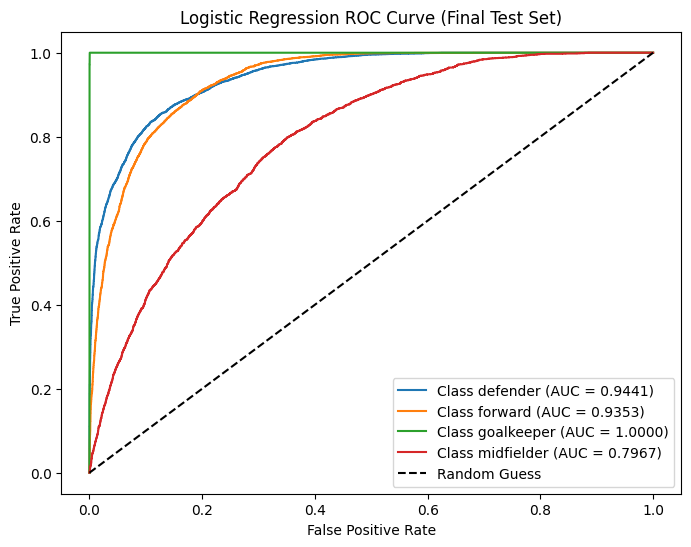

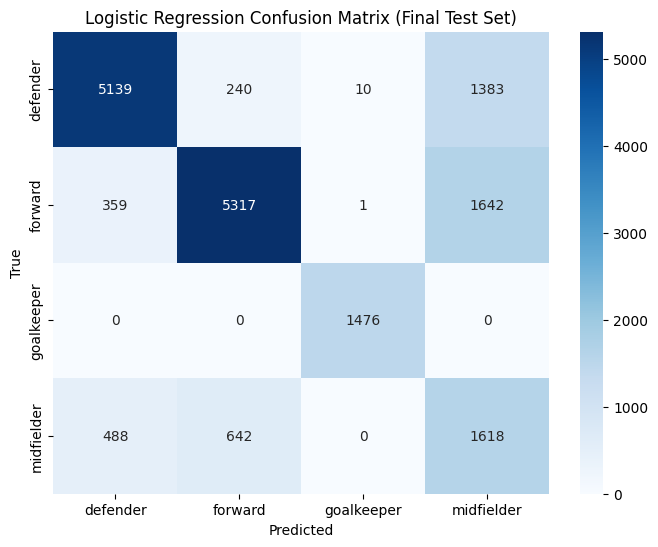

In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression and Grid Search
log_reg = LogisticRegression(max_iter=500, random_state=42, solver="lbfgs", class_weight="balanced")
param_grid = {"C": [0.01, 0.1, 1, 10, 100]}  # Regularization strength

# Grid search with 10-fold cross-validation on the training set
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=10, scoring="f1_weighted", n_jobs=-1)
grid_search.fit(X_cat_train, y_cat_train)

# Best Model and Best Parameters
best_log_reg = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate on Test Set
y_test_pred = best_log_reg.predict(X_cat_test)
y_test_pred_prob = best_log_reg.predict_proba(X_cat_test)
test_accuracy = accuracy_score(y_cat_test, y_test_pred)

print("Test Results for Logistic Regression:")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report on Test Set:\n", classification_report(y_cat_test, y_test_pred))

# Evaluate on Final Test Set
y_final_test_pred = best_log_reg.predict(X_cat_finaltest)
y_final_test_pred_prob = best_log_reg.predict_proba(X_cat_finaltest)
final_test_accuracy = accuracy_score(y_cat_finaltrain, y_final_test_pred)

print("\nFinal Test Results for Logistic Regression:")
print(f"Final Test Accuracy: {final_test_accuracy:.4f}")
print("\nClassification Report on Final Test Set:\n", classification_report(y_cat_finaltrain, y_final_test_pred))

# Output Best Hyperparameters
print(f"\nBest Hyperparameters for Logistic Regression: {best_params}")

# ROC Curve and Confusion Matrix for Final Test Set
plot_roc_curve_multiclass(y_cat_finaltrain, y_final_test_pred_prob, classes=best_log_reg.classes_, title="Logistic Regression ROC Curve (Final Test Set)")
plot_confusion_matrix(y_cat_finaltrain, y_final_test_pred, classes=best_log_reg.classes_, title="Logistic Regression Confusion Matrix (Final Test Set)")

**Decision Tree Classifier**


Test Results for Decision Tree Classifier:
Test Accuracy: 0.8683

Classification Report on Test Set:
               precision    recall  f1-score   support

    defender       0.89      0.90      0.89     12188
     forward       0.89      0.88      0.89     13175
  goalkeeper       1.00      1.00      1.00      2657
  midfielder       0.69      0.68      0.69      4946

    accuracy                           0.87     32966
   macro avg       0.87      0.87      0.87     32966
weighted avg       0.87      0.87      0.87     32966


Final Test Results for Decision Tree Classifier:
Final Test Accuracy: 0.8696

Classification Report on Final Test Set:
               precision    recall  f1-score   support

    defender       0.90      0.89      0.90      6772
     forward       0.89      0.88      0.89      7319
  goalkeeper       1.00      1.00      1.00      1476
  midfielder       0.69      0.70      0.70      2748

    accuracy                           0.87     18315
   macro avg   

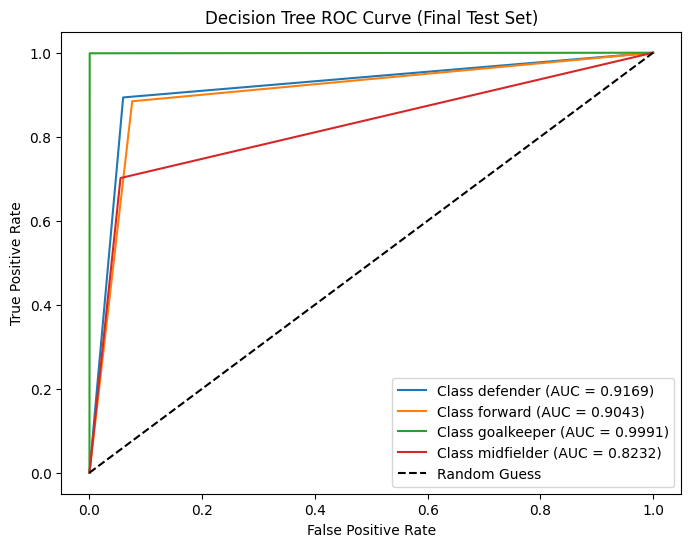

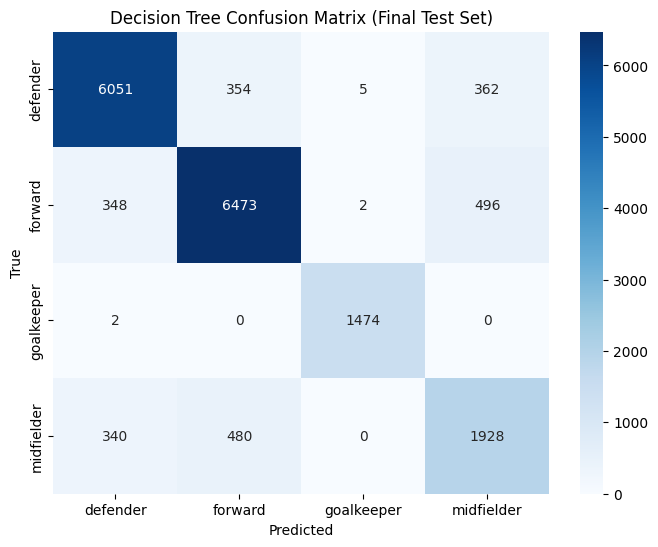

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Grid Search for Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42)
param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

# Perform Grid Search with 10-Fold Cross-Validation on Training Set
grid_search = GridSearchCV(estimator=tree_clf, param_grid=param_grid, cv=10, scoring="f1_weighted", n_jobs=-1)
grid_search.fit(X_cat_train, y_cat_train)

# Best Model and Best Parameters
best_tree = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate on Test Set
y_test_pred = best_tree.predict(X_cat_test)
y_test_pred_prob = best_tree.predict_proba(X_cat_test)
test_accuracy = accuracy_score(y_cat_test, y_test_pred)

print("\nTest Results for Decision Tree Classifier:")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report on Test Set:\n", classification_report(y_cat_test, y_test_pred))

# Evaluate on Final Test Set
y_final_test_pred = best_tree.predict(X_cat_finaltest)
y_final_test_pred_prob = best_tree.predict_proba(X_cat_finaltest)
final_test_accuracy = accuracy_score(y_cat_finaltrain, y_final_test_pred)

print("\nFinal Test Results for Decision Tree Classifier:")
print(f"Final Test Accuracy: {final_test_accuracy:.4f}")
print("\nClassification Report on Final Test Set:\n", classification_report(y_cat_finaltrain, y_final_test_pred))

# Output Best Hyperparameters
print(f"\nBest Hyperparameters for Decision Tree Classifier: {best_params}")

# ROC Curve and Confusion Matrix for Final Test Set
plot_roc_curve_multiclass(y_cat_finaltrain, y_final_test_pred_prob, classes=best_tree.classes_, title="Decision Tree ROC Curve (Final Test Set)")
plot_confusion_matrix(y_cat_finaltrain, y_final_test_pred, classes=best_tree.classes_, title="Decision Tree Confusion Matrix (Final Test Set)")

**kNN Classifier**


Test Results for k-Nearest Neighbors Classifier:
Test Accuracy: 0.9046

Classification Report on Test Set:
               precision    recall  f1-score   support

    defender       0.92      0.93      0.92     12188
     forward       0.91      0.93      0.92     13175
  goalkeeper       1.00      1.00      1.00      2657
  midfielder       0.81      0.72      0.77      4946

    accuracy                           0.90     32966
   macro avg       0.91      0.90      0.90     32966
weighted avg       0.90      0.90      0.90     32966


Final Test Results for k-Nearest Neighbors Classifier:
Final Test Accuracy: 0.9035

Classification Report on Final Test Set:
               precision    recall  f1-score   support

    defender       0.92      0.93      0.93      6772
     forward       0.90      0.92      0.91      7319
  goalkeeper       1.00      1.00      1.00      1476
  midfielder       0.80      0.73      0.76      2748

    accuracy                           0.90     18315
   

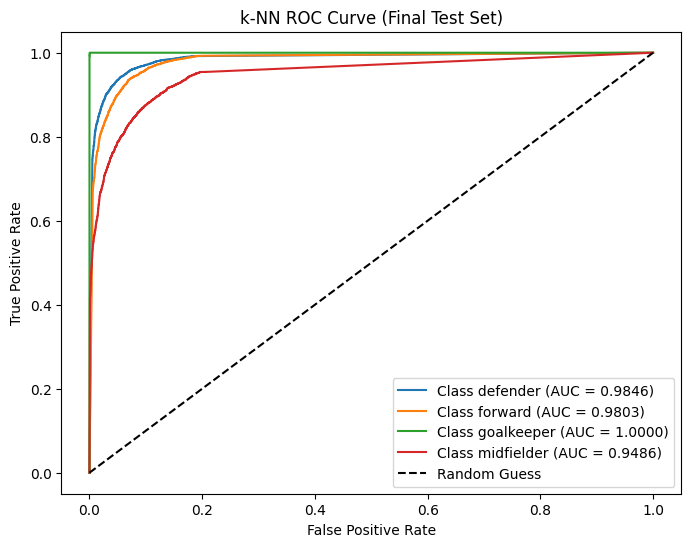

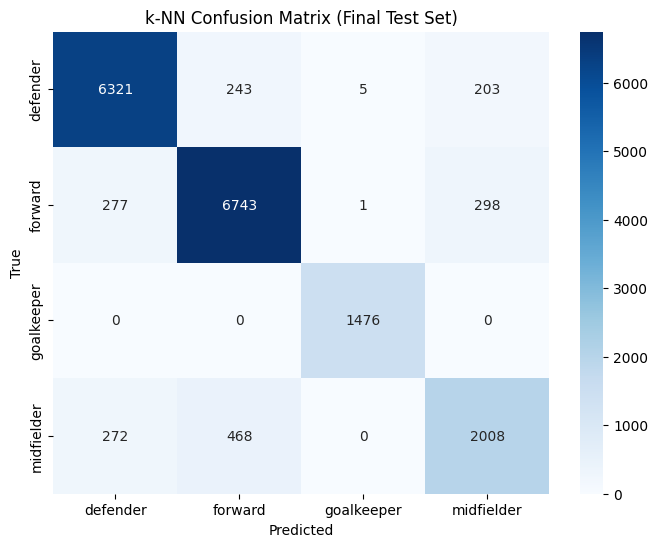

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Classifier
knn_clf = KNeighborsClassifier()

# Parameter Grid for Grid Search
param_grid = {
    "n_neighbors": [3, 5, 10, 20],
    "weights": ["uniform", "distance"],
    "p": [1, 2]  # 1: Manhattan Distance, 2: Euclidean Distance
}

# Perform Grid Search with 10-Fold Cross-Validation on Training Set
grid_search = GridSearchCV(estimator=knn_clf, param_grid=param_grid, cv=10, scoring="f1_weighted", n_jobs=-1)
grid_search.fit(X_cat_train, y_cat_train)

# Best Model and Best Parameters
best_knn = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate on Test Set
y_test_pred = best_knn.predict(X_cat_test)
y_test_pred_prob = best_knn.predict_proba(X_cat_test)
test_accuracy = accuracy_score(y_cat_test, y_test_pred)

print("\nTest Results for k-Nearest Neighbors Classifier:")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report on Test Set:\n", classification_report(y_cat_test, y_test_pred))

# Evaluate on Final Test Set
y_final_test_pred = best_knn.predict(X_cat_finaltest)
y_final_test_pred_prob = best_knn.predict_proba(X_cat_finaltest)
final_test_accuracy = accuracy_score(y_cat_finaltrain, y_final_test_pred)

print("\nFinal Test Results for k-Nearest Neighbors Classifier:")
print(f"Final Test Accuracy: {final_test_accuracy:.4f}")
print("\nClassification Report on Final Test Set:\n", classification_report(y_cat_finaltrain, y_final_test_pred))

# Output Best Hyperparameters
print(f"\nBest Hyperparameters for k-Nearest Neighbors Classifier: {best_params}")

# ROC Curve and Confusion Matrix for Final Test Set
plot_roc_curve_multiclass(y_cat_finaltrain, y_final_test_pred_prob, classes=best_knn.classes_, title="k-NN ROC Curve (Final Test Set)")
plot_confusion_matrix(y_cat_finaltrain, y_final_test_pred, classes=best_knn.classes_, title="k-NN Confusion Matrix (Final Test Set)")

**Permutation-Based Feature Importance for k-Nearest Neighbors Classifier**


Permutation-Based Feature Importance for k-Nearest Neighbors Classifier:
                Feature  Importance
1    Component_Defender    0.352886
0     Component_Forward    0.307923
3  Component_Midfielder    0.194889
2  Component_GoalKeeper    0.144302


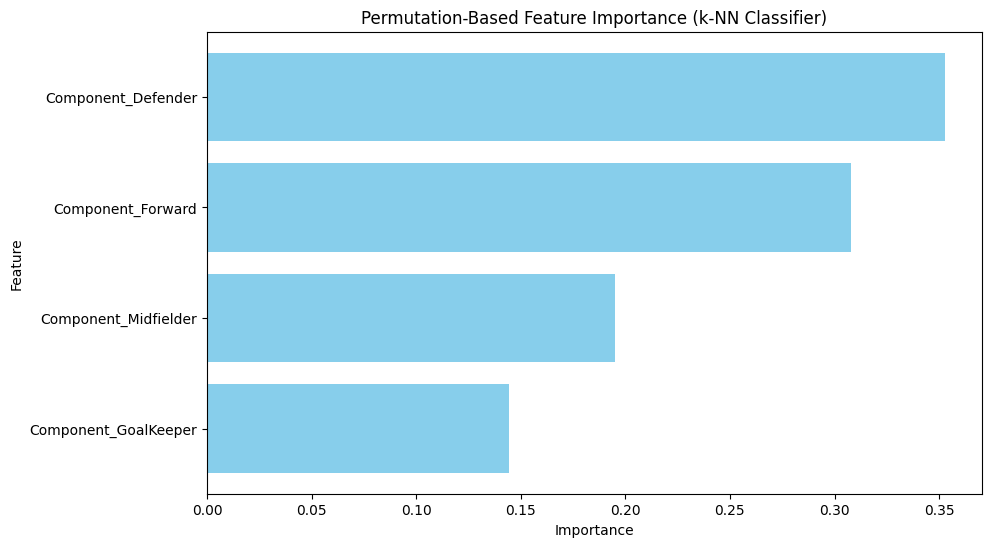

In [ ]:
# Baseline Accuracy on the Test Set
baseline_accuracy = accuracy_score(y_cat_test, y_test_pred)  # Accuracy on the unshuffled test set
shuffle_importance = {}

# Loop through each feature
for feature in X_cat_test.columns:
    # Create a copy of the test set
    X_test_shuffled = X_cat_test.copy()

    # Shuffle the selected feature
    X_test_shuffled[feature] = np.random.permutation(X_test_shuffled[feature])

    # Predict with the shuffled feature using the best k-NN model
    y_test_shuffled_pred = best_knn.predict(X_test_shuffled)

    # Calculate the drop in accuracy
    shuffled_accuracy = accuracy_score(y_cat_test, y_test_shuffled_pred)
    accuracy_drop = baseline_accuracy - shuffled_accuracy  # Drop in accuracy indicates importance

    # Store the importance for the current feature
    shuffle_importance[feature] = accuracy_drop

# Normalize the importance values to sum to 1
importance_df = pd.DataFrame({
    "Feature": list(shuffle_importance.keys()),
    "Importance": list(shuffle_importance.values())
}).sort_values(by="Importance", ascending=False)

# Normalize for interpretability
importance_df["Importance"] /= importance_df["Importance"].sum()

# Display Feature Importance
print("\nPermutation-Based Feature Importance for k-Nearest Neighbors Classifier:")
print(importance_df)

# Visualize Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Permutation-Based Feature Importance (k-NN Classifier)")
plt.gca().invert_yaxis()
plt.show()

## **5.3 Feature Imputation Importance:**

In [ ]:
# Step 1: Remove Component_Midfielder
X_selected = X_PCA[["Component_Forward", "Component_Defender", "Component_GoalKeeper"]]  # Select important components

# Step 2: Split the data (First split)
from sklearn.model_selection import train_test_split

X_num_train, X_num_finaltest, y_num_train, y_num_finaltrain = train_test_split(
    X_selected, y_num, test_size=0.1, random_state=42
)

# Second split
X_num_train, X_num_test, y_num_train, y_num_test = train_test_split(
    X_num_train, y_num_train, test_size=0.2, random_state=42
)

# Step 3: Train k-NN Regressor with Hyperparameter Tuning
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

# Initialize hyperparameter grid for k (number of neighbors)
k_values = [3, 5, 10, 15, 20]  # Example values for k
best_k = None
best_cv_score = float('inf')  # To track the best RMSE during cross-validation

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    cv_scores = []

    for train_index, val_index in kfold.split(X_num_train):
        # Use .iloc for indexing
        X_train_cv, X_val_cv = X_num_train.iloc[train_index], X_num_train.iloc[val_index]
        y_train_cv, y_val_cv = y_num_train.iloc[train_index], y_num_train.iloc[val_index]

        # Train the k-NN model
        knn_model.fit(X_train_cv, y_train_cv)

        # Validate the model
        y_val_pred = knn_model.predict(X_val_cv)
        rmse = np.sqrt(mean_squared_error(y_val_cv, y_val_pred))
        cv_scores.append(rmse)

    # Average RMSE for this k
    mean_cv_rmse = np.mean(cv_scores)

    # Track the best k
    if mean_cv_rmse < best_cv_score:
        best_k = k
        best_cv_score = mean_cv_rmse

print(f"Best k for k-NN: {best_k}")

# Step 4: Train the Optimized k-NN Model on the Full Training Set
optimized_knn = KNeighborsRegressor(n_neighbors=best_k)
optimized_knn.fit(X_num_train, y_num_train)

# Evaluate on the Test Set
y_test_pred = optimized_knn.predict(X_num_test)
r2_test = r2_score(y_num_test, y_test_pred)
adjusted_r2_test = 1 - (1 - r2_test) * ((len(y_num_test) - 1) / (len(y_num_test) - X_num_test.shape[1] - 1))
rmse_test = np.sqrt(mean_squared_error(y_num_test, y_test_pred))
rmse_normalized_test = rmse_test / y_num_test.mean()

# Evaluate on the Final Test Set
y_finaltest_pred = optimized_knn.predict(X_num_finaltest)
r2_finaltest = r2_score(y_num_finaltrain, y_finaltest_pred)
adjusted_r2_finaltest = 1 - (1 - r2_finaltest) * ((len(y_num_finaltrain) - 1) / (len(y_num_finaltrain) - X_num_finaltest.shape[1] - 1))
rmse_finaltest = np.sqrt(mean_squared_error(y_num_finaltrain, y_finaltest_pred))
rmse_normalized_finaltest = rmse_finaltest / y_num_finaltrain.mean()

# Output Results
print(f"Cross-Validation Best RMSE: {best_cv_score:.4f}")
print(f"Test Set Adjusted R²: {adjusted_r2_test:.4f}")
print(f"Test Set RMSE/y_mean: {rmse_normalized_test:.4f}")
print(f"Final Test Set Adjusted R²: {adjusted_r2_finaltest:.4f}")
print(f"Final Test Set RMSE/y_mean: {rmse_normalized_finaltest:.4f}")

Best k for k-NN: 5
Cross-Validation Best RMSE: 2.2289
Test Set Adjusted R²: 0.9032
Test Set RMSE/y_mean: 0.0319
Final Test Set Adjusted R²: 0.9043
Final Test Set RMSE/y_mean: 0.0318


**Permutation-Based Feature Importance for k-NN Regressor**


Permutation-Based Feature Importance for k-NN Regressor:
                Feature  Importance
0     Component_Forward    0.526504
2  Component_GoalKeeper    0.255553
1    Component_Defender    0.217942


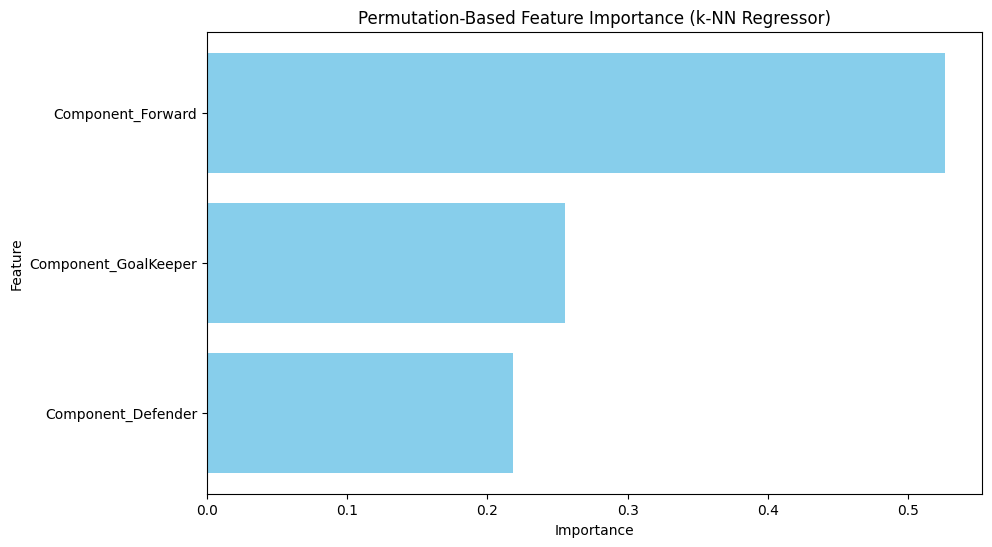

In [ ]:
# Baseline Performance on the Test Set
baseline_r2 = r2_score(y_num_test, y_test_pred)  # R² on the unshuffled test set
shuffle_importance = {}

# Loop through each feature
for feature in X_selected.columns:
    # Create a copy of the test set
    X_test_shuffled = X_num_test.copy()

    # Shuffle the selected feature
    X_test_shuffled[feature] = np.random.permutation(X_test_shuffled[feature])

    # Predict with the shuffled feature
    y_test_shuffled_pred = optimized_knn.predict(X_test_shuffled)

    # Calculate the drop in R²
    shuffled_r2 = r2_score(y_num_test, y_test_shuffled_pred)
    r2_drop = baseline_r2 - shuffled_r2  # Drop in R² indicates importance

    # Store the importance for the current feature
    shuffle_importance[feature] = r2_drop

# Normalize the importance values to sum to 1
importance_df = pd.DataFrame({
    "Feature": list(shuffle_importance.keys()),
    "Importance": list(shuffle_importance.values())
}).sort_values(by="Importance", ascending=False)

# Normalize for interpretability
importance_df["Importance"] /= importance_df["Importance"].sum()

# Display Feature Importance
print("\nPermutation-Based Feature Importance for k-NN Regressor:")
print(importance_df)

# Visualize Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Permutation-Based Feature Importance (k-NN Regressor)")
plt.gca().invert_yaxis()
plt.show()